# Mid bootcamp project | Case Study: Regression

*Project made by Misho Gavasheli and Glòria Ibars*

## Project details

**Background:** You are working as an analyst for a real estate company. Your company wants to build a machine learning model to predict the selling prices of houses based on a variety of features on which the value of the house is evaluated.

**Objective:** The task is to <font color='red'>build a model that will predict the price of a house based on features provided in the dataset.</font> The senior management also wants to <font color='blue'>explore the characteristics of the houses using some business intelligence tool.</font> One of those parameters include <font color='green'>understanding which factors are responsible for higher property value - $650K and above.</font> The questions have been provided later in the document for which you can use tableau.

**Data:** The data set consists of information on some 22,000 properties.  The dataset consisted of historic data of houses sold between May 2014 to May 2015. These are the definitions of data points provided: (Note: For some of the variables that are self explanatory, no definition has been provided)


| Column name | Description |
| --- | --- | 
| property_id | identification number of the property |
| date | the date the house was sold |
| bedrooms | no of bedrooms |
| bathrooms | no of bathrooms |
| sqft_living | living room area before renovations |
| sqft_lot | lotSize area before renovations |
| floors | no of floors |
| waterfront | houses near a waterfront |
| view | quality of the views |
| condition | quality of the condition (worn-out property - excellent) |
| grade |  general quality of the house |
| sqft_above | square footage of house apart from the basement |
| sqft_basement | area of the basement |
| yr_built | the year when the house was built |
| yr_renovated | the year when the house was renovated |
| zipcode | the zipcode of the location |
| lat | the latitude of the location |
| long | the longitude of the location |
| sqft_living15 | living room area in 2015, after renovations, this might or might not have affected the lotSize area |
| sqft_lot15 | lotSize area in 2015, after renovations |
| price | the price of the house |

**First thoughts**

How can we predict the selling price of a property based on a number of features? The most used ways to do it are based on regression techniques. 

*Regression techniques* involve:
- **input:** one or more predictor variables
- **output:** a single target variable


----

# 1. Explore the data: EDA and Cleaning - Round 1

To explore the data, you can use the techniques that have been discussed in class. Some of them include using the **describe method, checking null values, using Matplotlib and Seaborn for developing visualizations.**

The data has many **categorical and numerical variables**. Explore the nature of data for these variables before you start with the **data cleaning process** and then **data pre-processing (scaling numerical variables and encoding categorical variables)**.

## 1.1 import libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import math # floor
import scipy.stats as st
import statistics as stats

# sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Lasso, Ridge, ElasticNet, SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error as mae

# don't show annying warnings 
import warnings
warnings.filterwarnings("ignore")


## 1.2 import data

In [2]:
#read the files
df=pd.read_excel("regression_data.xls")

In [3]:
#show the dataframe head
df.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7129300520,2014-10-13,3,1.00,1180,5650,1.0,0,0,3,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,6414100192,2014-12-09,3,2.25,2570,7242,2.0,0,0,3,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,5631500400,2015-02-25,2,1.00,770,10000,1.0,0,0,3,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,2487200875,2014-12-09,4,3.00,1960,5000,1.0,0,0,5,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,1954400510,2015-02-18,3,2.00,1680,8080,1.0,0,0,3,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000


In [4]:
# show the dataframe info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   bedrooms       21597 non-null  int64         
 3   bathrooms      21597 non-null  float64       
 4   sqft_living    21597 non-null  int64         
 5   sqft_lot       21597 non-null  int64         
 6   floors         21597 non-null  float64       
 7   waterfront     21597 non-null  int64         
 8   view           21597 non-null  int64         
 9   condition      21597 non-null  int64         
 10  grade          21597 non-null  int64         
 11  sqft_above     21597 non-null  int64         
 12  sqft_basement  21597 non-null  int64         
 13  yr_built       21597 non-null  int64         
 14  yr_renovated   21597 non-null  int64         
 15  zipcode        2159

In [5]:
# Show the dataframe shape
df.shape

(21597, 21)

- the dataset contains 21597 rows and 21 columns / variables

## 1.3 Standardize header names

In [6]:
df.columns.to_list()

['id',
 'date',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15',
 'price']

It seems that all the header names are correct already in lowercase and with _ but we standardize it just in case we are visualy missing some errors

In [7]:
def standardize_col(col):
    return col.lower().replace(" ","_")

In [8]:
new_cols=[]
for col in df.columns:
    new_cols.append(standardize_col(col))

In [9]:
new_cols

['id',
 'date',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15',
 'price']

In [10]:
df.columns=new_cols
df.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7129300520,2014-10-13,3,1.00,1180,5650,1.0,0,0,3,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,6414100192,2014-12-09,3,2.25,2570,7242,2.0,0,0,3,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,5631500400,2015-02-25,2,1.00,770,10000,1.0,0,0,3,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,2487200875,2014-12-09,4,3.00,1960,5000,1.0,0,0,5,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,1954400510,2015-02-18,3,2.00,1680,8080,1.0,0,0,3,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000


Standardize column values: apparently there are not strange symbols detected. 

## 1.4 NaN values and duplicates

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   bedrooms       21597 non-null  int64         
 3   bathrooms      21597 non-null  float64       
 4   sqft_living    21597 non-null  int64         
 5   sqft_lot       21597 non-null  int64         
 6   floors         21597 non-null  float64       
 7   waterfront     21597 non-null  int64         
 8   view           21597 non-null  int64         
 9   condition      21597 non-null  int64         
 10  grade          21597 non-null  int64         
 11  sqft_above     21597 non-null  int64         
 12  sqft_basement  21597 non-null  int64         
 13  yr_built       21597 non-null  int64         
 14  yr_renovated   21597 non-null  int64         
 15  zipcode        2159

### 1.4.1 Check missing values

In [12]:
# let's visualise the percentage of missing values
for var in df.columns:
    if df[var].isnull().sum()>0:
        print(var, df[var].isnull().mean())

### 1.4.2 Check NaNs

In [13]:
# quick check if a column contains NaN's  
df.isna().any()

id               False
date             False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
view             False
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated     False
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
price            False
dtype: bool

In [14]:
# if a column has NaNs, check how many NaN's x column
df.isnull().sum()

id               0
date             0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
price            0
dtype: int64

In [15]:
# proportion nulls snapshot table 
nullsdf=pd.DataFrame(round(df.isna().sum()/len(df),4)*100)

In [16]:
nullsdf=nullsdf.rename(columns={'index':'header',0:'proportionnulls'})
nullsdf

,proportionnulls
id,0.0
date,0.0
bedrooms,0.0
bathrooms,0.0
sqft_living,0.0
sqft_lot,0.0
floors,0.0
waterfront,0.0
view,0.0
condition,0.0


- it's strange having 0 NaN's
- maybe we should check some 0 or similar characters


- **in VIEW, YR_RENOVATED and WATERFRONT we have lot of 0's as a value**

- view: does it mean bad view or unknown? (we will check later when exploring the variables)
- yr_renovated: 0 means there is no renovation
- waterfront: it seems a boolean (0/1)

In [17]:
df['yr_renovated'].value_counts()

0       20683
2014       91
2013       37
2003       36
2005       35
        ...  
1951        1
1959        1
1948        1
1954        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

In [18]:
df['waterfront'].value_counts()

0    21434
1      163
Name: waterfront, dtype: int64

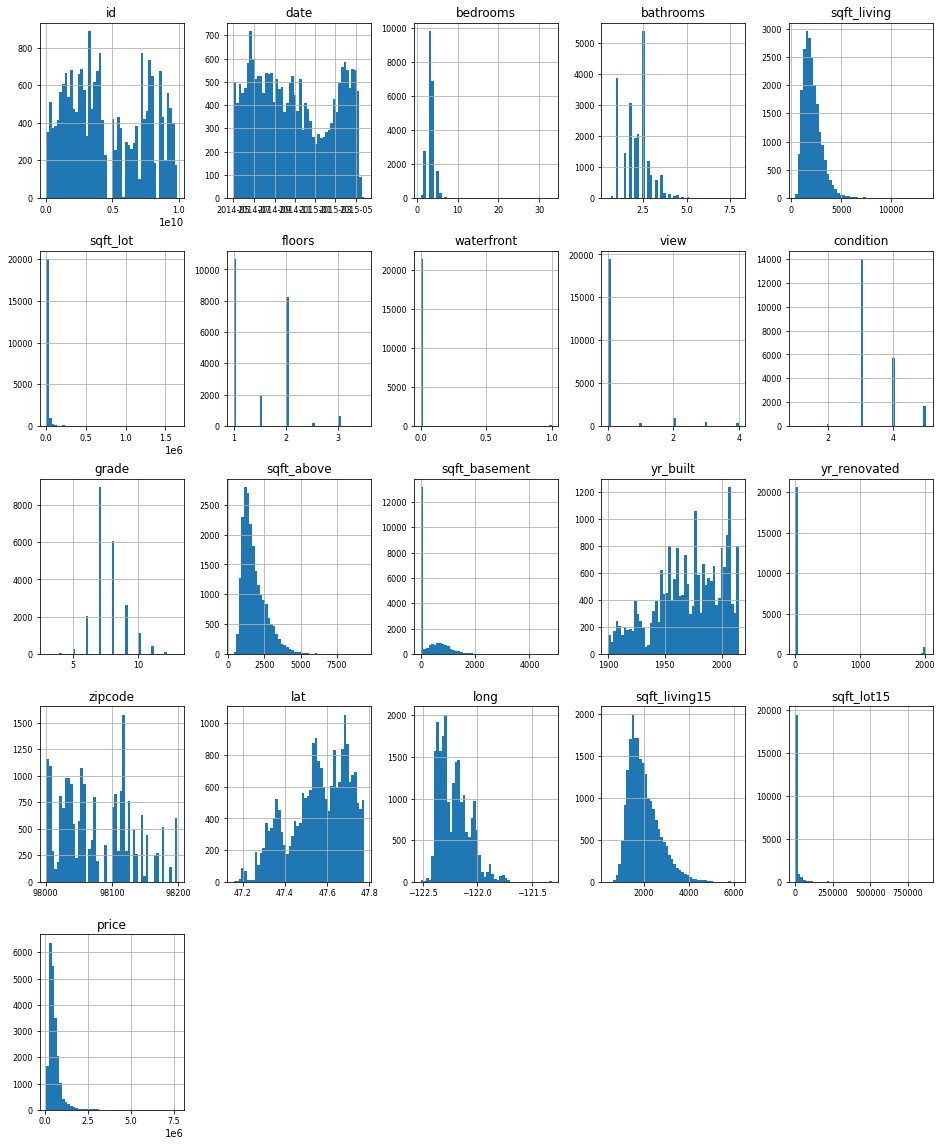

In [19]:
df.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

- In the histogram we can see there are some outliers. 
- We will deal with them later. 

### 1.4.3 Check duplicates

In [20]:
# check if there are duplicates (the whole row)
df.duplicated().sum()
# o duplicates = no duplicates found

0

In [21]:
# check how many uniques are in the dataset
df.nunique()

id               21420
date               372
bedrooms            12
bathrooms           29
sqft_living       1034
sqft_lot          9776
floors               6
waterfront           2
view                 5
condition            5
grade               11
sqft_above         942
sqft_basement      306
yr_built           116
yr_renovated        70
zipcode             70
lat               5033
long               751
sqft_living15      777
sqft_lot15        8682
price             3622
dtype: int64

- The whole dataset has 21597 id but there are only 21420 unique ids

In [22]:
# check for duplicated ids
df['id'].duplicated().any()

True

In [23]:
# check for duplicated ids
df['id'].value_counts()

795000620     3
8910500150    2
7409700215    2
1995200200    2
9211500620    2
             ..
3649100387    1
2767603649    1
1446403617    1
5602000275    1
1523300157    1
Name: id, Length: 21420, dtype: int64

In [24]:
# Filter the most duplicated house (id 795000620, repeated 3 times)
df[df['id'] == 795000620]

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
17588,795000620,2014-09-24,3,1.0,1080,6250,1.0,0,0,2,...,1080,0,1950,0,98168,47.5045,-122.33,1070,6250,115000
17589,795000620,2014-12-15,3,1.0,1080,6250,1.0,0,0,2,...,1080,0,1950,0,98168,47.5045,-122.33,1070,6250,124000
17590,795000620,2015-03-11,3,1.0,1080,6250,1.0,0,0,2,...,1080,0,1950,0,98168,47.5045,-122.33,1070,6250,157000


In [25]:
# How many repeated houses we have? (how many duplicated 'id')
(df['id'].value_counts() >1).sum()

176

In [26]:
# find the duplicated id and check the info. 
# Are they the same house but different year transaction? Why are they duplicated?
pd.concat(g for _, g in df.groupby("id") if len(g) > 1)

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
2494,1000102,2014-09-16,6,3.00,2400,9373,2.0,0,0,3,...,2400,0,1991,0,98002,47.3262,-122.214,2060,7316,280000
2495,1000102,2015-04-22,6,3.00,2400,9373,2.0,0,0,3,...,2400,0,1991,0,98002,47.3262,-122.214,2060,7316,300000
16800,7200179,2014-10-16,2,1.00,840,12750,1.0,0,0,3,...,840,0,1925,0,98055,47.4840,-122.211,1480,6969,150000
16801,7200179,2015-04-24,2,1.00,840,12750,1.0,0,0,3,...,840,0,1925,0,98055,47.4840,-122.211,1480,6969,175000
11421,109200390,2014-08-20,3,1.75,1480,3900,1.0,0,0,4,...,1480,0,1980,0,98023,47.2977,-122.367,1830,6956,245000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6340,9828200460,2015-01-06,2,1.00,700,4800,1.0,0,0,3,...,700,0,1922,0,98122,47.6147,-122.300,1440,4800,430000
15185,9834200305,2014-07-16,3,1.00,1790,3876,1.5,0,0,5,...,1090,700,1904,0,98144,47.5750,-122.288,1360,4080,350000
15186,9834200305,2015-02-10,3,1.00,1790,3876,1.5,0,0,5,...,1090,700,1904,0,98144,47.5750,-122.288,1360,4080,615000
1084,9834200885,2014-07-17,4,2.50,2080,4080,1.0,0,0,5,...,1040,1040,1962,0,98144,47.5720,-122.290,1340,4080,360000


- duplicated ***id*** have the same information except mainly for the ***price, date*** and ***age_of_house*** so we can conclude that **the id is related with the house** and if one house was sold twice it appears in different rows with different prices and dates.
- having duplicated id's can be problematic in a future (when visualizing data) but maybe is useful to know if the house has been sold twice.
- we can change the id name to property_id

In [27]:
#rename id as property_id to make it more clear
df.rename(columns={'id': 'property_id'}, inplace=True, errors='raise')

### 1.4.4 Check if there are equal columns / Drop columns


In [28]:
df['sqft_living'].equals(df['sqft_above'])

False

In [29]:
df['sqft_lot'].equals(df['sqft_lot15'])

False

- sqft_living equals to the sum of sqft_above and sqft_basement

- 4 columns are very similar: sqft_living, sqft_lot, sqft_living15, sqft_lot15
- The 15s are newer data so we can drop older data

In [30]:
# drop unnecessary columns - old sqft before 15
df.drop(['sqft_living', 'sqft_lot'], axis=1, inplace=True)
df.reset_index(drop=True, inplace=True)

## 1.5 Data types

In [31]:
df.columns.to_series().groupby(df.dtypes).groups

{int64: ['property_id', 'bedrooms', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'sqft_living15', 'sqft_lot15', 'price'], datetime64[ns]: ['date'], float64: ['bathrooms', 'floors', 'lat', 'long']}

- waterfront works as a boolean but in numeric format (0/1) 

In [32]:
# correct data types
# id to string
# zip code to string
df = df.astype({"property_id": str, "zipcode": str})

In [33]:
df['date'] = pd.to_datetime(df['date'])

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   property_id    21597 non-null  object        
 1   date           21597 non-null  datetime64[ns]
 2   bedrooms       21597 non-null  int64         
 3   bathrooms      21597 non-null  float64       
 4   floors         21597 non-null  float64       
 5   waterfront     21597 non-null  int64         
 6   view           21597 non-null  int64         
 7   condition      21597 non-null  int64         
 8   grade          21597 non-null  int64         
 9   sqft_above     21597 non-null  int64         
 10  sqft_basement  21597 non-null  int64         
 11  yr_built       21597 non-null  int64         
 12  yr_renovated   21597 non-null  int64         
 13  zipcode        21597 non-null  object        
 14  lat            21597 non-null  float64       
 15  long           2159

## 1.6 Explore data columns (check for uniques, etc)

<AxesSubplot:>

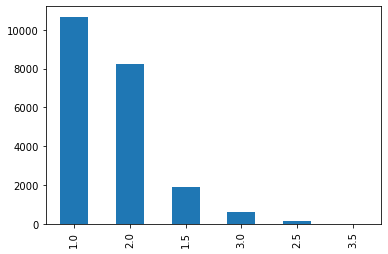

In [35]:
df.floors.value_counts().plot(kind='bar')

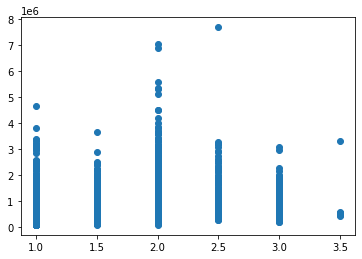

In [36]:
plt.scatter(df.floors,df.price)

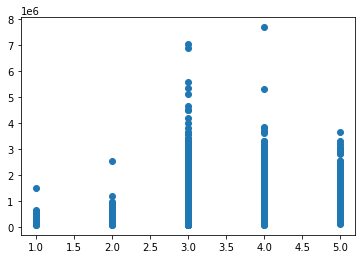

In [37]:
plt.scatter(df.condition,df.price)

### 1.6.1 Bedrooms

In [38]:
# nunique return number of unique elements 
df["bedrooms"].nunique()

12

In [39]:
# unique return the unique values
df["bedrooms"].unique()

array([ 3,  2,  4,  5,  1,  6,  7,  8,  9, 11, 10, 33], dtype=int64)

In [40]:
# value_counts returns object containing counts of unique values
df['bedrooms'].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

33 bedrooms doesn't makes sense taking into account that they only have 1.75 bathrooms and one floor
It looks like a typing mistake and it should be 3 instead of 33.

In [41]:
# find the id of the one with 33 bedrooms
df[df['bedrooms']>30]

,property_id,date,bedrooms,bathrooms,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
15856,2402100895,2014-06-25,33,1.75,1.0,0,0,5,7,1040,580,1947,0,98103,47.6878,-122.331,1330,4700,640000


In [42]:
# replace 33 for 3 
df.loc[df['bedrooms'] == 33, 'bedrooms'] = 3

In [43]:
# check that the replacement was done correctly
df[df['bedrooms']>30]

,property_id,date,bedrooms,bathrooms,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price


In [44]:
# check that the replacement was done correctly
df[df['property_id']=='2402100895']

,property_id,date,bedrooms,bathrooms,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
15856,2402100895,2014-06-25,3,1.75,1.0,0,0,5,7,1040,580,1947,0,98103,47.6878,-122.331,1330,4700,640000


In [45]:
#Check that the replacement was done correctly
df['bedrooms'].value_counts()

3     9825
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
Name: bedrooms, dtype: int64

In [46]:
# The data of the property with 11 bedrooms all makes sense (proportions etc). 
df[df['bedrooms'] == 11]

,property_id,date,bedrooms,bathrooms,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
8748,1773100755,2014-08-21,11,3.0,2.0,0,0,3,7,2400,600,1918,1999,98106,47.556,-122.363,1420,4960,520000


### 1.6.2 Bathrooms

In [47]:
# nunique return number of unique elements 
df["bathrooms"].nunique()

29

In [48]:
# unique return the unique values
df["bathrooms"].unique()

array([1.  , 2.25, 3.  , 2.  , 4.5 , 1.5 , 2.5 , 1.75, 2.75, 3.25, 4.  ,
       3.5 , 0.75, 4.75, 5.  , 4.25, 3.75, 1.25, 5.25, 6.  , 0.5 , 5.5 ,
       6.75, 5.75, 8.  , 7.5 , 7.75, 6.25, 6.5 ])

In [49]:
# value_counts returns object containing counts of unique values
df['bathrooms'].value_counts()

2.50    5377
1.00    3851
1.75    3048
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      71
4.75      23
5.00      21
5.25      13
5.50      10
1.25       9
6.00       6
0.50       4
5.75       4
6.75       2
8.00       2
6.25       2
6.50       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64

Meaning of 0.5 bathroom. It's type of bathroom. We dont need round this numbers.
- 0.25, Quarter,	Only a toilet, or only a shower
- 0.50,	Half,	A toilet and a sink
- 0.75,	Three-Quarter,	A toilet, a sink and a shower/tub (not bidet)
- 1, Full, Complete bathroom 


- Source: [What is a .75 Bathroom? 2020 Guide to .75 Bathrooms by Badeloft](https://www.badeloftusa.com/buying-guides/75-bathroom/#:~:text=June%2028%2C%202020-,A%20.,and%20a%20bath%2C%20so%20a%20)


In [50]:
# Let's check if 8 bathrooms make sense
df[df['bathrooms'] == 8.0]

,property_id,date,bedrooms,bathrooms,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
7245,6762700020,2014-10-13,6,8.0,2.5,0,3,4,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800,7700000
12764,1225069038,2014-05-05,7,8.0,3.0,0,4,3,12,9410,4130,1999,0,98053,47.6675,-121.986,4850,217800,2280000


The properties of the properties with 8 bathrooms look normal and proportionally correct. 

### 1.6.3 Floors

In [51]:
# nunique return number of unique elements 
df["floors"].nunique()

6

In [52]:
# unique return the unique values
df["floors"].unique()

array([1. , 2. , 1.5, 3. , 2.5, 3.5])

In [53]:
# value_counts returns object containing counts of unique values
df['floors'].value_counts()

1.0    10673
2.0     8235
1.5     1910
3.0      611
2.5      161
3.5        7
Name: floors, dtype: int64

### 1.6.4 Condition

In [54]:
# nunique return number of unique elements 
df["condition"].nunique()

5

In [55]:
df['condition'].unique()

array([3, 5, 4, 1, 2], dtype=int64)

In [56]:
# value_counts returns object containing counts of unique values
df['condition'].value_counts()

3    14020
4     5677
5     1701
2      170
1       29
Name: condition, dtype: int64

The condition is an ordinal column that goes from the minimum building standards or structure to the higher quality and luxurious features

### 1.6.5 Year renovated

In [57]:
# how many renovated houses are?
print(f" There are {(df['yr_renovated'] !=0).sum()} renovated houses")

 There are 914 renovated houses


In [58]:
# what percentage they represent?
print(f" The percentage of renovated houses is {round((df['yr_renovated'] !=0).sum() / sum(df['yr_renovated'].value_counts())*100, 2)}%")

 The percentage of renovated houses is 4.23%


### 1.6.6 Zipcode

In [59]:
# nunique return number of unique elements 
df["zipcode"].nunique()

70

In [60]:
df['zipcode'].unique()

array(['98178', '98125', '98028', '98136', '98074', '98053', '98003',
       '98198', '98146', '98038', '98007', '98115', '98107', '98126',
       '98019', '98103', '98002', '98133', '98040', '98092', '98030',
       '98119', '98112', '98052', '98027', '98117', '98058', '98001',
       '98056', '98166', '98023', '98070', '98148', '98105', '98042',
       '98008', '98059', '98122', '98144', '98004', '98005', '98034',
       '98075', '98116', '98010', '98118', '98199', '98032', '98045',
       '98102', '98077', '98108', '98168', '98177', '98065', '98029',
       '98006', '98109', '98022', '98033', '98155', '98024', '98011',
       '98031', '98106', '98072', '98188', '98014', '98055', '98039'],
      dtype=object)

In [61]:
# value_counts returns object containing counts of unique values
df['zipcode'].value_counts()

98103    602
98038    589
98115    583
98052    574
98117    553
        ... 
98102    104
98010    100
98024     80
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

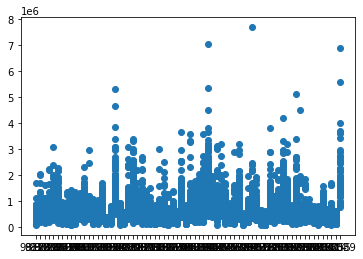

In [62]:
plt.scatter(df.zipcode,df.price)

<Figure size 720x720 with 0 Axes>

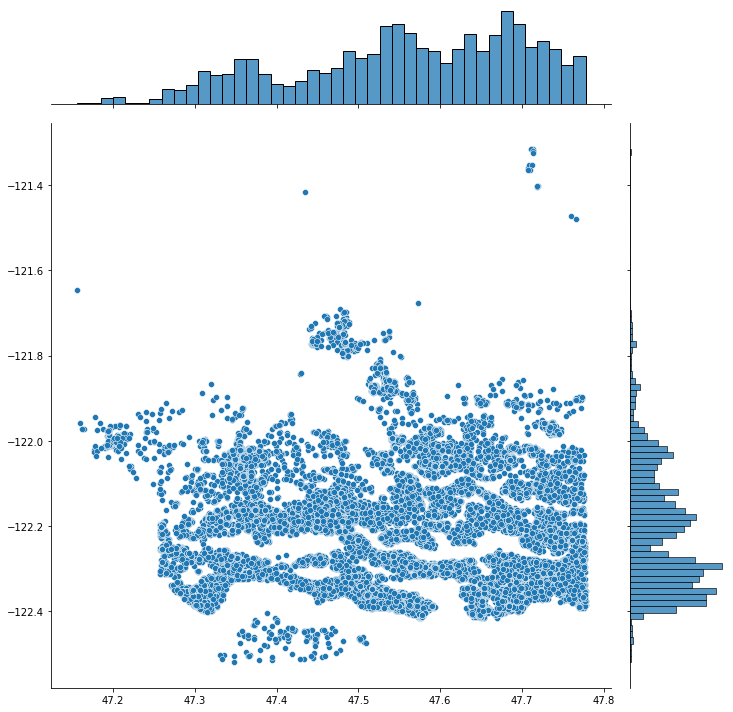

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

In [63]:
plt.figure(figsize=(10,10))
sns.jointplot(x=df.lat.values, y=df.long.values, size=10)
plt.ylabel('Longitude', fontsize=12)
plt.xlabel('Latitude', fontsize=12)
plt.show()
sns.despine

## 1.7 Metrics (mean, min, max, diff, stdev)

### 1.7.1 Mean, min, max

In [64]:
# short way - using groupby function with aggregation to get mean, min and max values
df_byzip = df.groupby('zipcode').agg({'bedrooms':['mean', 'min', 'max'],
                                      'bathrooms':['mean', 'min', 'max'],
                                      'floors':['mean', 'min', 'max'],
                                      'sqft_lot15':['mean', 'min', 'max'],
                                      'price':['mean', 'min', 'max']})
round(df_byzip)

bedrooms         bathrooms           floors           sqft_lot15  \
            mean min max      mean  min  max   mean  min  max       mean   
zipcode                                                                    
98001        3.0   1   6       2.0  1.0  4.0    1.0  1.0  2.0    11219.0   
98002        3.0   1   6       2.0  1.0  5.0    1.0  1.0  2.0     7585.0   
98003        3.0   1   6       2.0  1.0  5.0    1.0  1.0  2.0     9746.0   
98004        4.0   2  10       3.0  1.0  6.0    1.0  1.0  3.0    12805.0   
98005        4.0   2   6       2.0  1.0  5.0    1.0  1.0  2.0    18368.0   
...          ...  ..  ..       ...  ...  ...    ...  ...  ...        ...   
98177        3.0   1   6       2.0  1.0  6.0    1.0  1.0  3.0    11690.0   
98178        3.0   1   6       2.0  1.0  4.0    1.0  1.0  3.0     8150.0   
98188        3.0   2   6       2.0  1.0  4.0    1.0  1.0  3.0     9753.0   
98198        3.0   1   6       2.0  1.0  4.0    1.0  1.0  2.0     9479.0   
98199        3.0   1   7       2.0  1.0  5.0    1.0  1.0  3.0     5284.0   

                           price                   
          min     max       mean     min      max  
zipcode                                            
98001    2855   57934   281195.0  100000   850000  
98002    2800   69993   234284.0   95000   389000  
98003    1302   60513   294111.0  128000   950000  
98004     794   44584  1356524.0  425000  7060000  
98005    2601  167378   810290.0  400000  1960000  
...       ...     ...        ...     ...      ...  
98177    1427  128066   676419.0  245560  3800000  
98178    3000   78408   310613.0   90000  1700000  
98188    2308   18333   289078.0  110000   707000  
98198    2700   70973   302897.0   95000  1350000  
98199     953   21074   792188.0  323000  3200000  

[70 rows x 15 columns]

### 1.7.2 Difference

In [65]:
# for each bedrooms type, compute the difference between the maximum and the minimum price.
bedxprice = df.groupby('bedrooms')['price'].agg(['max','min'])
bedxprice['diff'] = bedxprice['max']-bedxprice['min']
bedxprice['diff']
# this gives us the amplitude of the range of the price per each kind of house depending on the bedrooms they have

bedrooms
1     1170000
2     3202000
3     3718000
4     4390000
5     6927000
6     7525000
7     2920000
8     2960000
9      950000
10     500000
11          0
Name: diff, dtype: int64

In [66]:
# for each bathrooms type, compute the difference between the maximum and the minimum price.
bathxprice = df.groupby('bathrooms')['price'].agg(['max','min'])
bathxprice['diff'] = bathxprice['max']-bathxprice['min']
bathxprice['diff']
# this gives us the amplitude of the range of the price per each kind of house depending on the bathrooms they have

bathrooms
0.50     203500
0.75     705000
1.00    1222000
1.25    1115000
1.50    1393000
1.75    3165000
2.00    2085000
2.25    2240000
2.50    2916497
2.75    2516250
3.00    4336000
3.25    3464000
3.50    3493350
3.75    3395000
4.00    3135000
4.25    3360000
4.50    6770000
4.75    3170000
5.00    5007000
5.25    4810000
5.50    3575000
5.75    5030000
6.00    4400000
6.25     410000
6.50    1060000
6.75    3870000
7.50          0
7.75          0
8.00    5420000
Name: diff, dtype: int64

In [67]:
# for each floor type, compute the difference between the maximum and the minimum price.
flxprice = df.groupby('floors')['price'].agg(['max','min'])
flxprice['diff'] = flxprice['max']-flxprice['min']
flxprice['diff']
# this gives us the amplitude of the range of the price per each kind of house depending on the floors they have

floors
1.0    4592000
1.5    3558000
2.0    6970000
2.5    7445000
3.0    2895000
3.5    2865000
Name: diff, dtype: int64

### 1.7.3 mean and stdev price by some features

In [68]:
# the mean price by bedrooms
df.groupby('bedrooms')['price'].mean()

bedrooms
1     3.182395e+05
2     4.013877e+05
3     4.662943e+05
4     6.355647e+05
5     7.868741e+05
6     8.258535e+05
7     9.514478e+05
8     1.105077e+06
9     8.939998e+05
10    8.200000e+05
11    5.200000e+05
Name: price, dtype: float64

In [69]:
# the standard deviation price by bedrooms
df.groupby('bedrooms')['price'].std()

bedrooms
1     148589.635501
2     198128.920756
3     262613.167713
4     388901.182117
5     596536.599057
6     799610.343019
7     740350.184560
8     897495.725295
9     381533.900984
10    285832.118559
11              NaN
Name: price, dtype: float64

In [70]:
# the mean price by bathrooms
df.groupby('bathrooms')['price'].mean()

bathrooms
0.50    2.373750e+05
0.75    2.949366e+05
1.00    3.470721e+05
1.25    6.217722e+05
1.50    4.094297e+05
1.75    4.549158e+05
2.00    4.579050e+05
2.25    5.337688e+05
2.50    5.538033e+05
2.75    6.603505e+05
3.00    7.086619e+05
3.25    9.707532e+05
3.50    9.324017e+05
3.75    1.198179e+06
4.00    1.268405e+06
4.25    1.526653e+06
4.50    1.334211e+06
4.75    2.022300e+06
5.00    1.674167e+06
5.25    1.817962e+06
5.50    2.522500e+06
5.75    2.492500e+06
6.00    2.948333e+06
6.25    3.095000e+06
6.50    1.710000e+06
6.75    2.735000e+06
7.50    4.500000e+05
7.75    6.890000e+06
8.00    4.990000e+06
Name: price, dtype: float64

In [71]:
# the standard deviation price by bathrooms
df.groupby('bathrooms')['price'].std()

bathrooms
0.50    8.888886e+04
0.75    1.390220e+05
1.00    1.545674e+05
1.25    4.088817e+05
1.50    1.939307e+05
1.75    2.020492e+05
2.00    2.060723e+05
2.25    2.811597e+05
2.50    2.670712e+05
2.75    3.098475e+05
3.00    4.308749e+05
3.25    5.633904e+05
3.50    4.652734e+05
3.75    5.902669e+05
4.00    6.933076e+05
4.25    7.616379e+05
4.50    8.910568e+05
4.75    8.672724e+05
5.00    1.248295e+06
5.25    1.241665e+06
5.50    1.254634e+06
5.75    2.153778e+06
6.00    1.706475e+06
6.25    2.899138e+05
6.50    7.495332e+05
6.75    2.736503e+06
7.50             NaN
7.75             NaN
8.00    3.832519e+06
Name: price, dtype: float64

In [72]:
# the mean price by floors
df.groupby('floors')['price'].mean()

floors
1.0    4.423584e+05
1.5    5.590449e+05
2.0    6.491856e+05
2.5    1.061021e+06
3.0    5.834339e+05
3.5    9.102143e+05
Name: price, dtype: float64

In [73]:
# the standard deviation price by floors
df.groupby('floors')['price'].std()

floors
1.0    2.641684e+05
1.5    3.037221e+05
2.0    4.342366e+05
2.5    8.588360e+05
3.0    3.387434e+05
3.5    1.054669e+06
Name: price, dtype: float64

### 1.7.4 highest - low price

In [74]:
# the highest price
df_max_price = df['price'].max()
print("The highest price for which a house has been sold is:", round(df_max_price))

The highest price for which a house has been sold is: 7700000


In [75]:
# which is the highest price house?
df.loc[df['price']==df['price'].max(),:]

,property_id,date,bedrooms,bathrooms,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
7245,6762700020,2014-10-13,6,8.0,2.5,0,3,4,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800,7700000


In [76]:
# the lowest price
df_min_price = df['price'].min()
print("The lowest price for which a house has been sold is:", round(df_min_price))

The lowest price for which a house has been sold is: 78000


In [77]:
# which is the lowest price house?
df.loc[df['price']==df['price'].min(),:]

,property_id,date,bedrooms,bathrooms,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
15279,40000362,2014-05-06,2,1.0,1.0,0,0,1,5,780,0,1942,0,98168,47.4739,-122.28,1700,10387,78000


In [78]:
# aggregation to get min and max values
highest_lowest = df.agg({'price':['min', 'max']})
round(highest_lowest)

,price
min,78000
max,7700000


### 1.7.5 IQR price quartiles 1

In [79]:
# find price quartiles
iqr=np.percentile(df['price'],75)-np.percentile(df['price'],25)
iqr

323000.0

In [80]:
upper_limit = np.percentile(df['price'],75)+ 1.5*iqr
upper_limit

1129500.0

In [81]:
lower_limit= np.percentile(df['price'],25)- 1.5*iqr
lower_limit

-162500.0

## 1.8 Kind of variables in the dataset

- Nominal variables: we don't have nominal var, it could be e.g. material
- Ordinal variables (they can be numerical or categorical): e.g. condition (num)
- Discrete variables: describe a count of some kind e.g. no of rooms
- Continuous variables: 

In [82]:
# find numerical variables
numerical = [var for var in df.columns if df[var].dtype!='O']
print('There are {} numerical variables'.format(len(numerical)))

There are 17 numerical variables


In [83]:
#select numerical columns
num=df.select_dtypes(np.number)
num

,bedrooms,bathrooms,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,price
0,3,1.00,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,221900
1,3,2.25,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639,538000
2,2,1.00,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062,180000
3,4,3.00,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000,604000
4,3,2.00,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503,510000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,3,2.50,3.0,0,0,3,8,1530,0,2009,0,47.6993,-122.346,1530,1509,360000
21593,4,2.50,2.0,0,0,3,8,2310,0,2014,0,47.5107,-122.362,1830,7200,400000
21594,2,0.75,2.0,0,0,3,7,1020,0,2009,0,47.5944,-122.299,1020,2007,402101
21595,3,2.50,2.0,0,0,3,8,1600,0,2004,0,47.5345,-122.069,1410,1287,400000


### 1.8.1 Find discrete variables
To identify discrete variables, select from all the numerical ones, those that contain a finite and small number of distinct values.

In [84]:
# let's visualise the values of the discrete variables
discrete = []
for var in num:
    if len(df[var].unique())<30:
        print(var, ' values: ', df[var].unique())
        discrete.append(var)
        
print('There are {} discrete variables'.format(len(discrete)))

bedrooms  values:  [ 3  2  4  5  1  6  7  8  9 11 10]
bathrooms  values:  [1.   2.25 3.   2.   4.5  1.5  2.5  1.75 2.75 3.25 4.   3.5  0.75 4.75
 5.   4.25 3.75 1.25 5.25 6.   0.5  5.5  6.75 5.75 8.   7.5  7.75 6.25
 6.5 ]
floors  values:  [1.  2.  1.5 3.  2.5 3.5]
waterfront  values:  [0 1]
view  values:  [0 3 4 2 1]
condition  values:  [3 5 4 1 2]
grade  values:  [ 7  6  8 11  9  5 10 12  4  3 13]
There are 7 discrete variables


### 1.8.2 Find continuous variables


In [85]:
continuous = [var for var in num if var not in discrete and var not in ['price']]
continuous

['sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

### 1.8.3 Find categorical variables


In [86]:
# find categorical variables
categorical = [var for var in df.columns if df[var].dtype=='O']
print('There are {} categorical variables'.format(len(categorical)))

There are 2 categorical variables


In [87]:
#select categorical columns
cat=df.select_dtypes(include='object')
cat

,property_id,zipcode
0,7129300520,98178
1,6414100192,98125
2,5631500400,98028
3,2487200875,98136
4,1954400510,98074
...,...,...
21592,263000018,98103
21593,6600060120,98146
21594,1523300141,98144
21595,291310100,98027


In [88]:
#For each categorical column, print: column name, unique values, number of unique values (%)
categorical=[column for column in df.columns if (df[column].dtype==object)] 
for i in categorical:
    print ('Column: {}'.format(df[i].name)) 
    print('Unique values: {}'.format(len(df[i].unique()))) 
    print(df[i].unique())
    print(df[i].value_counts())
    print(f"{round(df[i].value_counts()/sum(df[i].value_counts())*100,2)}")
    print('_______________________________________________ \n ')    

Column: property_id
Unique values: 21420
['7129300520' '6414100192' '5631500400' ... '1523300141' '291310100'
 '1523300157']
795000620     3
8910500150    2
7409700215    2
1995200200    2
9211500620    2
             ..
3649100387    1
2767603649    1
1446403617    1
5602000275    1
1523300157    1
Name: property_id, Length: 21420, dtype: int64
795000620     0.01
8910500150    0.01
7409700215    0.01
1995200200    0.01
9211500620    0.01
              ... 
3649100387    0.00
2767603649    0.00
1446403617    0.00
5602000275    0.00
1523300157    0.00
Name: property_id, Length: 21420, dtype: float64
_______________________________________________ 
 
Column: zipcode
Unique values: 70
['98178' '98125' '98028' '98136' '98074' '98053' '98003' '98198' '98146'
 '98038' '98007' '98115' '98107' '98126' '98019' '98103' '98002' '98133'
 '98040' '98092' '98030' '98119' '98112' '98052' '98027' '98117' '98058'
 '98001' '98056' '98166' '98023' '98070' '98148' '98105' '98042' '98008'
 '98059' '98122' 

----

# 2. Data Wrangling

## 2.1 Reorganize and create new columns 

In [89]:
#add new date column for only month and year
df.insert(1, 'new_date', (df['date']).dt.to_period('M'))
df

,property_id,new_date,date,bedrooms,bathrooms,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7129300520,2014-10,2014-10-13,3,1.00,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,6414100192,2014-12,2014-12-09,3,2.25,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,5631500400,2015-02,2015-02-25,2,1.00,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,2487200875,2014-12,2014-12-09,4,3.00,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,1954400510,2015-02,2015-02-18,3,2.00,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,2014-05,2014-05-21,3,2.50,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,360000
21593,6600060120,2015-02,2015-02-23,4,2.50,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,400000
21594,1523300141,2014-06,2014-06-23,2,0.75,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,402101
21595,291310100,2015-01,2015-01-16,3,2.50,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,400000


In [90]:
df['new_date'].isnull().sum()

0

In [91]:
# nunique return number of unique elements 
df["new_date"].nunique()

13

In [92]:
# unique return the unique values
df["new_date"].unique()

<PeriodArray>
['2014-10', '2014-12', '2015-02', '2014-05', '2014-06', '2015-01', '2015-04',
 '2015-03', '2014-07', '2014-08', '2014-11', '2014-09', '2015-05']
Length: 13, dtype: period[M]

In [93]:
# value_counts returns object containing counts of unique values
df['new_date'].value_counts()

2015-04    2229
2014-07    2211
2014-06    2178
2014-08    1939
2014-10    1876
2015-03    1875
2014-09    1771
2014-05    1768
2014-12    1470
2014-11    1409
2015-02    1247
2015-01     978
2015-05     646
Freq: M, Name: new_date, dtype: int64

In [94]:
#Exctract year and create a dedicated column df["year_date"] from a column in datetime format df["Date"]
df['year_date'] = pd.DatetimeIndex(df['date']).year
df.head()

,property_id,new_date,date,bedrooms,bathrooms,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price,year_date
0,7129300520,2014-10,2014-10-13,3,1.00,1.0,0,0,3,7,...,0,1955,0,98178,47.5112,-122.257,1340,5650,221900,2014
1,6414100192,2014-12,2014-12-09,3,2.25,2.0,0,0,3,7,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000,2014
2,5631500400,2015-02,2015-02-25,2,1.00,1.0,0,0,3,6,...,0,1933,0,98028,47.7379,-122.233,2720,8062,180000,2015
3,2487200875,2014-12,2014-12-09,4,3.00,1.0,0,0,5,7,...,910,1965,0,98136,47.5208,-122.393,1360,5000,604000,2014
4,1954400510,2015-02,2015-02-18,3,2.00,1.0,0,0,3,8,...,0,1987,0,98074,47.6168,-122.045,1800,7503,510000,2015


In [95]:
df['year_date'].isnull().sum()

0

In [96]:
# nunique return number of unique elements 
df["year_date"].nunique()

2

In [97]:
# unique return the unique values
df["year_date"].unique()

array([2014, 2015], dtype=int64)

In [98]:
# value_counts returns object containing counts of unique values
df['year_date'].value_counts()

2014    14622
2015     6975
Name: year_date, dtype: int64

In [99]:
#new data for age of house 
df.insert(21, 'age_of_house', (df['year_date'])-(df['yr_built']) )
df

,property_id,new_date,date,bedrooms,bathrooms,floors,waterfront,view,condition,grade,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price,year_date,age_of_house
0,7129300520,2014-10,2014-10-13,3,1.00,1.0,0,0,3,7,...,1955,0,98178,47.5112,-122.257,1340,5650,221900,2014,59
1,6414100192,2014-12,2014-12-09,3,2.25,2.0,0,0,3,7,...,1951,1991,98125,47.7210,-122.319,1690,7639,538000,2014,63
2,5631500400,2015-02,2015-02-25,2,1.00,1.0,0,0,3,6,...,1933,0,98028,47.7379,-122.233,2720,8062,180000,2015,82
3,2487200875,2014-12,2014-12-09,4,3.00,1.0,0,0,5,7,...,1965,0,98136,47.5208,-122.393,1360,5000,604000,2014,49
4,1954400510,2015-02,2015-02-18,3,2.00,1.0,0,0,3,8,...,1987,0,98074,47.6168,-122.045,1800,7503,510000,2015,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,2014-05,2014-05-21,3,2.50,3.0,0,0,3,8,...,2009,0,98103,47.6993,-122.346,1530,1509,360000,2014,5
21593,6600060120,2015-02,2015-02-23,4,2.50,2.0,0,0,3,8,...,2014,0,98146,47.5107,-122.362,1830,7200,400000,2015,1
21594,1523300141,2014-06,2014-06-23,2,0.75,2.0,0,0,3,7,...,2009,0,98144,47.5944,-122.299,1020,2007,402101,2014,5
21595,291310100,2015-01,2015-01-16,3,2.50,2.0,0,0,3,8,...,2004,0,98027,47.5345,-122.069,1410,1287,400000,2015,11


In [100]:
# create a new column for age renovation
# check how many houses have been renovated (a year different than 0)
df.loc[df.yr_renovated != 0]

,property_id,new_date,date,bedrooms,bathrooms,floors,waterfront,view,condition,grade,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price,year_date,age_of_house
1,6414100192,2014-12,2014-12-09,3,2.25,2.0,0,0,3,7,...,1951,1991,98125,47.7210,-122.319,1690,7639,538000,2014,63
35,9547205180,2014-06,2014-06-13,3,2.50,1.5,0,0,3,8,...,1930,2002,98115,47.6827,-122.310,1590,3264,696000,2014,84
95,1483300570,2014-09,2014-09-08,4,2.50,1.0,0,0,3,7,...,1946,1991,98040,47.5873,-122.249,1950,6045,905000,2014,68
103,2450000295,2014-10,2014-10-07,3,2.50,2.0,0,0,3,8,...,1950,2010,98004,47.5814,-122.196,2370,8113,1090000,2014,64
115,3626039325,2014-11,2014-11-21,3,3.50,2.0,0,0,3,8,...,1900,1999,98117,47.6981,-122.368,1830,6350,740500,2014,114
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19606,7351200295,2015-01,2015-01-14,3,1.75,2.0,1,4,3,7,...,1940,1960,98125,47.7336,-122.284,1630,7588,1150000,2015,75
20041,126039256,2014-09,2014-09-04,3,2.00,2.0,0,0,3,7,...,1977,2006,98177,47.7770,-122.362,1860,8710,434900,2014,37
20428,4305600360,2015-02,2015-02-25,4,2.50,1.0,0,0,3,8,...,1962,2009,98059,47.4799,-122.127,2430,5539,500012,2015,53
20431,3319500628,2015-02,2015-02-12,3,1.50,2.0,0,0,3,8,...,1971,2014,98144,47.5998,-122.311,1010,1517,356999,2015,44


In [101]:
# create age of renovation (how many years is the renovation)
df.insert(22, 'age_of_renovation', (df['year_date'])-(df['yr_renovated']) )
# when there is no renovation, the age of renovation equals to the date, so we have to change it to 0. 
df['age_of_renovation'].values[df['age_of_renovation'] > 500] = 0
df

,property_id,new_date,date,bedrooms,bathrooms,floors,waterfront,view,condition,grade,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price,year_date,age_of_house,age_of_renovation
0,7129300520,2014-10,2014-10-13,3,1.00,1.0,0,0,3,7,...,0,98178,47.5112,-122.257,1340,5650,221900,2014,59,0
1,6414100192,2014-12,2014-12-09,3,2.25,2.0,0,0,3,7,...,1991,98125,47.7210,-122.319,1690,7639,538000,2014,63,23
2,5631500400,2015-02,2015-02-25,2,1.00,1.0,0,0,3,6,...,0,98028,47.7379,-122.233,2720,8062,180000,2015,82,0
3,2487200875,2014-12,2014-12-09,4,3.00,1.0,0,0,5,7,...,0,98136,47.5208,-122.393,1360,5000,604000,2014,49,0
4,1954400510,2015-02,2015-02-18,3,2.00,1.0,0,0,3,8,...,0,98074,47.6168,-122.045,1800,7503,510000,2015,28,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,2014-05,2014-05-21,3,2.50,3.0,0,0,3,8,...,0,98103,47.6993,-122.346,1530,1509,360000,2014,5,0
21593,6600060120,2015-02,2015-02-23,4,2.50,2.0,0,0,3,8,...,0,98146,47.5107,-122.362,1830,7200,400000,2015,1,0
21594,1523300141,2014-06,2014-06-23,2,0.75,2.0,0,0,3,7,...,0,98144,47.5944,-122.299,1020,2007,402101,2014,5,0
21595,291310100,2015-01,2015-01-16,3,2.50,2.0,0,0,3,8,...,0,98027,47.5345,-122.069,1410,1287,400000,2015,11,0


In [102]:
# nunique return number of unique elements 
df["age_of_renovation"].nunique()

71

In [103]:
# unique return the unique values
df["age_of_renovation"].unique()

array([ 0, 23, 12,  4, 15,  1, 20, 24, 37, 10,  7, 11, 21, 30, 31, 60,  3,
       40, 16,  9, 69, 25, 26, 57, 33, 13, 36, 14, 38, 19, 45, 28, 22,  5,
        8, 41, 29, 34, 43, 70, 35, 18, 65, 46, 66,  6, 32, 44, -1,  2, 27,
       51, 17, 64, 52, 61, 59, 74, 56, 50, 53, 39, 55, 42, 54, 58, 48, 47,
       49, 80, 68], dtype=int64)

In [104]:
# value_counts returns object containing counts of unique values
df['age_of_renovation'].value_counts()

0     20769
1        45
8        37
11       34
10       31
      ...  
66        1
53        1
60        1
64        1
68        1
Name: age_of_renovation, Length: 71, dtype: int64

In [105]:
# identify which rows are under -1 in age_of_renovation
df_ren_neg = df.loc[df.age_of_renovation < 0]
df_ren_neg

,property_id,new_date,date,bedrooms,bathrooms,floors,waterfront,view,condition,grade,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price,year_date,age_of_house,age_of_renovation
2293,8712100320,2014-07,2014-07-28,5,2.75,1.5,0,0,3,8,...,2015,98112,47.6388,-122.300,1920,4178,585000,2014,92,-1
7090,9141100005,2014-10,2014-10-28,4,3.50,2.0,0,0,3,8,...,2015,98133,47.7412,-122.355,1760,10505,285000,2014,74,-1
11587,7284900030,2014-05,2014-05-22,4,3.25,2.0,0,4,3,9,...,2015,98177,47.7680,-122.388,2020,6656,850000,2014,91,-1
14845,3585900665,2014-06,2014-06-06,5,2.50,1.0,0,3,3,9,...,2015,98177,47.7608,-122.378,2890,19831,805000,2014,58,-1
15673,3585900190,2014-10,2014-10-06,3,2.50,1.0,0,4,3,8,...,2015,98177,47.7611,-122.372,3400,24338,825000,2014,59,-1
18560,8935100100,2014-07,2014-07-01,4,3.00,1.0,0,0,3,7,...,2015,98115,47.6763,-122.282,2180,6885,476000,2014,69,-1


In [106]:
# other way of identifing which rows are under -1 in age_of_renovation
df_ren_neg = df[df['age_of_renovation']== -1]
df_ren_neg

,property_id,new_date,date,bedrooms,bathrooms,floors,waterfront,view,condition,grade,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price,year_date,age_of_house,age_of_renovation
2293,8712100320,2014-07,2014-07-28,5,2.75,1.5,0,0,3,8,...,2015,98112,47.6388,-122.300,1920,4178,585000,2014,92,-1
7090,9141100005,2014-10,2014-10-28,4,3.50,2.0,0,0,3,8,...,2015,98133,47.7412,-122.355,1760,10505,285000,2014,74,-1
11587,7284900030,2014-05,2014-05-22,4,3.25,2.0,0,4,3,9,...,2015,98177,47.7680,-122.388,2020,6656,850000,2014,91,-1
14845,3585900665,2014-06,2014-06-06,5,2.50,1.0,0,3,3,9,...,2015,98177,47.7608,-122.378,2890,19831,805000,2014,58,-1
15673,3585900190,2014-10,2014-10-06,3,2.50,1.0,0,4,3,8,...,2015,98177,47.7611,-122.372,3400,24338,825000,2014,59,-1
18560,8935100100,2014-07,2014-07-01,4,3.00,1.0,0,0,3,7,...,2015,98115,47.6763,-122.282,2180,6885,476000,2014,69,-1


***notes on age_of_renovation column***
- so far we have identified the values in age_of_renovation that are in negative
- they are in negative because the renovation year is after the  date the house was sold.
- we still don't know if this is a tiping mistake or if it makes sense.
- they represent only six rows of the 21597 that make up the database
- for the moment we are not gonna drop it but maybe in the future steps we decide to drop it if ti affects the results or the accuracy score. 

## 2.2 Categorical and numerical columns

In [107]:
#select numerical columns
num=df.select_dtypes(np.number)
num

,bedrooms,bathrooms,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,price,year_date,age_of_house,age_of_renovation
0,3,1.00,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,221900,2014,59,0
1,3,2.25,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639,538000,2014,63,23
2,2,1.00,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062,180000,2015,82,0
3,4,3.00,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000,604000,2014,49,0
4,3,2.00,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503,510000,2015,28,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,3,2.50,3.0,0,0,3,8,1530,0,2009,0,47.6993,-122.346,1530,1509,360000,2014,5,0
21593,4,2.50,2.0,0,0,3,8,2310,0,2014,0,47.5107,-122.362,1830,7200,400000,2015,1,0
21594,2,0.75,2.0,0,0,3,7,1020,0,2009,0,47.5944,-122.299,1020,2007,402101,2014,5,0
21595,3,2.50,2.0,0,0,3,8,1600,0,2004,0,47.5345,-122.069,1410,1287,400000,2015,11,0


In [108]:
#select categorical columns
cat=df.select_dtypes(include='object')
cat

,property_id,zipcode
0,7129300520,98178
1,6414100192,98125
2,5631500400,98028
3,2487200875,98136
4,1954400510,98074
...,...,...
21592,263000018,98103
21593,6600060120,98146
21594,1523300141,98144
21595,291310100,98027


- The whole database are numbers
- There are only two strings, created by us, that are the id (unique) and the zipcode (we don't need it to make calculus, it works as a string). 

<code style="background:black">SOME FIRST EDA AND CLEANING NOTES</code>
- the data has been imported correctly
- columns are written correctly
- there are no NaNs or missing values apparently but we have some strange 0's 
- there are no duplicates but the id is not unique, it corresponds to the id of the property so the column name has been updated
- data types have been modified 
- checked for equal columns: Founded 4 similar columns but not equal. 
- dropped innecessary data 
- checked bedrooms, bathrooms, floors and zipcode for unique
- columns reorganized and new ones created (e.g. age of renovation)
- identify '-1' age of renovation: for the moment we decided don't drop it but stored in a var because the -1 means that the renovation is one year later from the sell date. We still don't know if it's a mistake or if it makes sense having this info. 
- categorical and numeric data checked
- the whole dataset is numerical but not all numbers work as numbers (maybe we should change it later for categorical?)

----

# 3. EDA and Cleaning - round 2

In [109]:
# describe, show info etc
df.head()

,property_id,new_date,date,bedrooms,bathrooms,floors,waterfront,view,condition,grade,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price,year_date,age_of_house,age_of_renovation
0,7129300520,2014-10,2014-10-13,3,1.00,1.0,0,0,3,7,...,0,98178,47.5112,-122.257,1340,5650,221900,2014,59,0
1,6414100192,2014-12,2014-12-09,3,2.25,2.0,0,0,3,7,...,1991,98125,47.7210,-122.319,1690,7639,538000,2014,63,23
2,5631500400,2015-02,2015-02-25,2,1.00,1.0,0,0,3,6,...,0,98028,47.7379,-122.233,2720,8062,180000,2015,82,0
3,2487200875,2014-12,2014-12-09,4,3.00,1.0,0,0,5,7,...,0,98136,47.5208,-122.393,1360,5000,604000,2014,49,0
4,1954400510,2015-02,2015-02-18,3,2.00,1.0,0,0,3,8,...,0,98074,47.6168,-122.045,1800,7503,510000,2015,28,0


## 3.1 E.g. of searching a house (filtering) taking in account some requisits 

In [110]:
# check how many houses with less than 10 years (more or less new) have more than four bedrooms and the price is under 300.000 for e.g. a family that wants to move
df.loc[(df['bedrooms'] >= 4) & (df['age_of_house'] <= 10) & (df['price'] <= 300000)]

,property_id,new_date,date,bedrooms,bathrooms,floors,waterfront,view,condition,grade,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price,year_date,age_of_house,age_of_renovation
56,9478500640,2014-08,2014-08-19,4,2.5,2.0,0,0,3,7,...,0,98042,47.3663,-122.114,2250,4500,292500,2014,6,0
67,3717000160,2014-10,2014-10-09,4,2.5,2.0,0,0,3,7,...,0,98001,47.3378,-122.257,2221,4557,287000,2014,9,0
356,5416510830,2014-08,2014-08-06,4,2.5,2.0,0,0,3,7,...,0,98038,47.3607,-122.034,2010,5091,300000,2014,9,0
593,9542830350,2014-09,2014-09-02,4,2.5,2.0,0,0,3,7,...,0,98038,47.3665,-122.017,2020,3802,296000,2014,8,0
2105,908000260,2014-11,2014-11-17,4,2.5,2.0,0,0,3,7,...,0,98058,47.4334,-122.148,2390,5293,272000,2014,10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21154,6601200020,2015-01,2015-01-27,4,2.5,2.0,0,0,3,8,...,0,98001,47.2606,-122.253,1934,5000,235245,2015,8,0
21220,9268850130,2014-06,2014-06-27,4,2.0,3.0,0,0,3,7,...,0,98027,47.5401,-122.026,1390,942,288790,2014,6,0
21236,2309710130,2014-07,2014-07-15,4,2.0,1.0,0,3,3,7,...,0,98022,47.1934,-121.977,2280,5331,272000,2014,5,0
21270,6817750440,2014-10,2014-10-14,4,2.5,2.0,0,0,3,8,...,0,98055,47.4297,-122.189,1714,3250,300000,2014,5,0


## 3.2 Find/search some correlations within variables (grade 12 & 13, zipcode, view, condition) 

In [111]:
# which are the houses with a 12 grade?
grade12 = df.loc[(df['grade'] >= 12)]
grade12

,property_id,new_date,date,bedrooms,bathrooms,floors,waterfront,view,condition,grade,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price,year_date,age_of_house,age_of_renovation
153,7855801670,2015-04,2015-04-01,4,3.25,2.0,0,3,3,12,...,0,98006,47.5620,-122.162,3160,9750,2250000,2015,9,0
419,8678500060,2014-07,2014-07-10,5,4.25,2.0,0,0,3,12,...,0,98024,47.5954,-121.950,4680,211267,1550000,2014,15,0
540,622049114,2015-02,2015-02-18,3,2.50,2.0,1,4,4,12,...,0,98166,47.4169,-122.348,3980,104374,2130000,2015,39,0
722,2225059214,2014-08,2014-08-08,4,3.25,2.0,0,0,4,12,...,0,98005,47.6350,-122.164,4230,41075,1580000,2014,26,0
799,6838800140,2015-02,2015-02-24,4,3.50,1.0,0,0,4,12,...,0,98077,47.7354,-122.078,3510,36149,1100000,2015,22,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20425,1925059254,2015-05,2015-05-07,5,4.00,2.0,0,0,3,12,...,0,98004,47.6409,-122.221,4800,16607,3000000,2015,8,0
20455,323079101,2015-01,2015-01-23,4,3.50,2.0,0,0,3,12,...,0,98027,47.5016,-121.905,1490,33580,1800000,2015,7,0
21034,2424059170,2015-02,2015-02-19,5,6.00,2.0,0,4,3,12,...,0,98006,47.5451,-122.114,3440,36859,900000,2015,8,0
21328,8835770170,2014-08,2014-08-22,5,6.00,2.0,0,3,3,12,...,0,98045,47.4624,-121.779,4690,256803,1490000,2014,7,0


In [112]:
# where are they located?
grade12['zipcode'].value_counts()

98006    24
98004     9
98039     6
98177     6
98005     5
98033     5
98040     5
98027     5
98074     3
98053     3
98102     3
98077     3
98166     3
98112     2
98075     2
98045     2
98029     2
98059     2
98034     2
98155     1
98115     1
98052     1
98199     1
98105     1
98065     1
98144     1
98024     1
98092     1
98072     1
Name: zipcode, dtype: int64

In [113]:
# store the houses with a grade of 12 and the most counted zipcode for them
gradezipcode = df.loc[(df['grade'] >= 12) & (df['zipcode'] == '98006')]

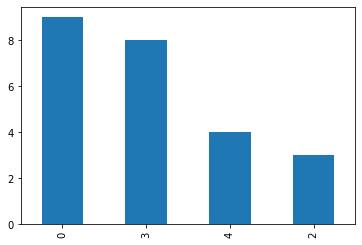

In [114]:
# checkmore relationships with other variables
ax = gradezipcode['view'].value_counts().plot(kind='bar')

In [115]:
gradezipview = df.loc[(df['grade'] >= 12) & (df['zipcode'] == '98006') & (df['view'] >= 1)]
gradezipview

,property_id,new_date,date,bedrooms,bathrooms,floors,waterfront,view,condition,grade,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price,year_date,age_of_house,age_of_renovation
153,7855801670,2015-04,2015-04-01,4,3.25,2.0,0,3,3,12,...,0,98006,47.5620,-122.162,3160,9750,2250000,2015,9,0
2234,4139420370,2014-08,2014-08-11,4,5.00,1.0,0,3,4,12,...,0,98006,47.5524,-122.112,4890,19223,1760000,2014,18,0
5750,4139490190,2014-07,2014-07-11,4,3.50,2.0,0,2,3,12,...,0,98006,47.5518,-122.107,4090,12127,1500000,2014,18,0
6946,4139500080,2014-07,2014-07-18,4,4.25,2.0,0,3,3,12,...,0,98006,47.5513,-122.109,5030,15069,1490000,2014,16,0
7262,4139470010,2014-10,2014-10-06,4,3.25,2.0,0,4,3,12,...,0,98006,47.5507,-122.113,4940,12941,1620000,2014,18,0
7838,4139420590,2014-05,2014-05-20,4,3.50,1.0,0,3,3,12,...,0,98006,47.5521,-122.115,4060,15177,1210000,2014,19,0
7839,4139420590,2014-08,2014-08-27,4,3.50,1.0,0,3,3,12,...,0,98006,47.5521,-122.115,4060,15177,1200000,2014,19,0
8467,4139490210,2014-07,2014-07-30,4,3.50,2.0,0,2,3,12,...,0,98006,47.5519,-122.106,4080,12114,1290000,2014,16,0
9265,4139500410,2015-01,2015-01-26,6,4.75,2.0,0,3,3,12,...,0,98006,47.5512,-122.110,4470,14571,1680000,2015,17,0
10362,3303850390,2014-12,2014-12-12,5,5.50,2.0,0,3,3,13,...,0,98006,47.5431,-122.112,6110,26442,2980000,2014,13,0


In [116]:
# check the view column - find the unique values
df['view'].unique()

array([0, 3, 4, 2, 1], dtype=int64)

In [117]:
# count how houses are per the unique values
df['view'].value_counts()

0    19475
2      961
3      510
1      332
4      319
Name: view, dtype: int64

- Does the zero in view means a 0 puntuation / bad view? 
- or does it mean that the field is empty?
- proportionally there are a lot so it looks like the second option
- should we fill it with the avg? or delete the column?
- if we fill it with the avg, we have not enough data about views to doing it correctly
- so this column is useless because there is not enough data about it --> drop view

In [118]:
# dropping view column
df.drop('view', axis=1, inplace=True)

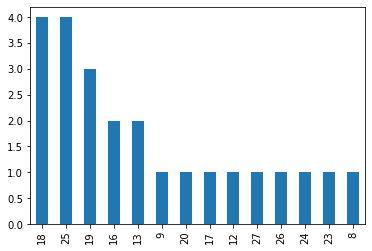

In [119]:
ax = gradezipcode['age_of_house'].value_counts().plot(kind='bar')

In [120]:
grzip = df.loc[(df['grade'] >= 12) & (df['zipcode'])]

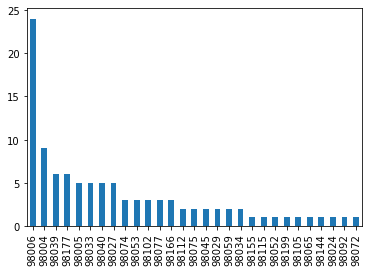

In [121]:
ax = grzip['zipcode'].value_counts().plot(kind='bar')

In [122]:
grade13 = df.loc[(df['grade'] >= 13) & (df['zipcode'])]
grade13

,property_id,new_date,date,bedrooms,bathrooms,floors,waterfront,condition,grade,sqft_above,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price,year_date,age_of_house,age_of_renovation
4407,2470100110,2014-08,2014-08-04,5,5.75,2.0,0,3,13,6200,...,0,98039,47.6289,-122.233,3560,24345,5570000,2014,13,0
4807,9831200500,2015-03,2015-03-04,5,3.75,2.5,0,3,13,6110,...,0,98102,47.6285,-122.322,2660,7500,2480000,2015,93,0
5446,7237501190,2014-10,2014-10-10,4,3.25,2.0,0,3,13,4890,...,0,98059,47.5303,-122.131,5790,13539,1780000,2014,10,0
6035,1725059316,2014-11,2014-11-20,4,4.00,2.0,0,3,13,4900,...,0,98033,47.6488,-122.201,2200,9196,2390000,2014,14,0
7028,853200010,2014-07,2014-07-01,5,5.50,1.0,0,4,13,4320,...,0,98004,47.6229,-122.220,5070,20570,3800000,2014,36,0
7245,6762700020,2014-10,2014-10-13,6,8.00,2.5,0,4,13,8570,...,1987,98102,47.6298,-122.323,3940,8800,7700000,2014,104,27
7900,1068000375,2014-09,2014-09-23,6,5.00,2.5,0,3,13,5240,...,2002,98199,47.6427,-122.408,3130,6477,3200000,2014,81,12
9245,9208900037,2014-09,2014-09-19,6,7.75,2.0,0,3,13,8860,...,0,98039,47.6305,-122.240,4540,42730,6890000,2014,13,0
10362,3303850390,2014-12,2014-12-12,5,5.50,2.0,0,3,13,6290,...,0,98006,47.5431,-122.112,6110,26442,2980000,2014,13,0
13398,2426039123,2015-01,2015-01-30,5,4.75,2.0,0,3,13,7880,...,0,98177,47.7334,-122.362,2740,10761,2420000,2015,19,0


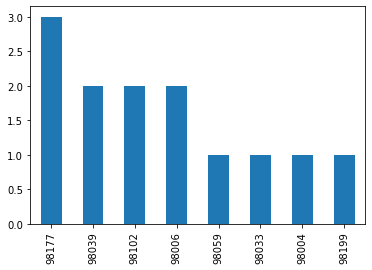

In [123]:
ax = grade13['zipcode'].value_counts().plot(kind='bar')

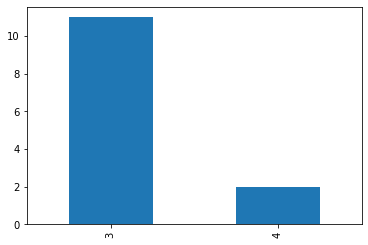

In [124]:
ax = grade13['condition'].value_counts().plot(kind='bar')

In [125]:
# short way - using groupby function with aggregation to get mean, min and max values
grade13byzip = grade13.groupby('zipcode').agg({'bedrooms':['mean', 'min', 'max'],
                                      'bathrooms':['mean', 'min', 'max'],
                                      'floors':['mean', 'min', 'max'],
                                      'sqft_lot15':['mean', 'min', 'max'],
                                      'price':['mean', 'min', 'max']})
round(grade13byzip)

bedrooms         bathrooms           floors           sqft_lot15  \
            mean min max      mean  min  max   mean  min  max       mean   
zipcode                                                                    
98004        5.0   5   5       6.0  6.0  6.0    1.0  1.0  1.0    20570.0   
98006        4.0   4   5       4.0  2.0  6.0    2.0  1.0  2.0    30821.0   
98033        4.0   4   4       4.0  4.0  4.0    2.0  2.0  2.0     9196.0   
98039        6.0   5   6       7.0  6.0  8.0    2.0  2.0  2.0    33538.0   
98059        4.0   4   4       3.0  3.0  3.0    2.0  2.0  2.0    13539.0   
98102        6.0   5   6       6.0  4.0  8.0    2.0  2.0  2.0     8150.0   
98177        4.0   3   5       5.0  4.0  6.0    2.0  2.0  2.0    45695.0   
98199        6.0   6   6       5.0  5.0  5.0    2.0  2.0  2.0     6477.0   

                           price                    
           min    max       mean      min      max  
zipcode                                             
98004    20570  20570  3800000.0  3800000  3800000  
98006    26442  35200  2660000.0  2340000  2980000  
98033     9196   9196  2390000.0  2390000  2390000  
98039    24345  42730  6230000.0  5570000  6890000  
98059    13539  13539  1780000.0  1780000  1780000  
98102     7500   8800  5090000.0  2480000  7700000  
98177    10761  81021  3036667.0  2420000  3800000  
98199     6477   6477  3200000.0  3200000  3200000

## 3.3 higher property value - 650K and above

In [126]:
hpv = df.loc[(df['price'] >= 650000)]

In [127]:
hpv = df.loc[(df['price'] >= 650000)]

In [128]:
hpv.columns

Index(['property_id', 'new_date', 'date', 'bedrooms', 'bathrooms', 'floors',
       'waterfront', 'condition', 'grade', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15',
       'sqft_lot15', 'price', 'year_date', 'age_of_house',
       'age_of_renovation'],
      dtype='object')

In [129]:
hpv_highest_lowest = hpv.agg({'price':['min', 'max'],'bedrooms':['min', 'max'],'bathrooms':['min', 'max'],'floors':['min', 'max'],'condition':['min', 'max'],
                             'sqft_living15':['min', 'max'],'sqft_lot15':['min', 'max'],'sqft_above':['min', 'max'],'sqft_basement':['min', 'max']})
round(hpv_highest_lowest)

,price,bedrooms,bathrooms,floors,condition,sqft_living15,sqft_lot15,sqft_above,sqft_basement
min,650000,1,1.0,1.0,1,860,967,580,0
max,7700000,10,8.0,4.0,5,6210,871200,9410,4820


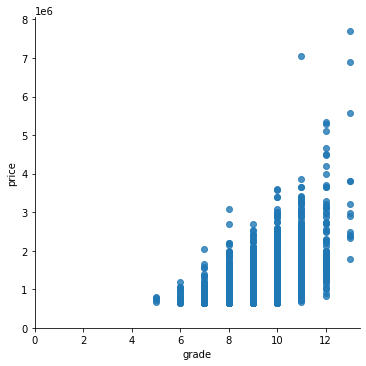

In [130]:
# new scatter plot with sensible axes limits
# Plot using Seaborn
sns.lmplot(x='grade', y='price', data=hpv,
           fit_reg=False)
 
# Tweak using Matplotlib
plt.ylim(0, None)
plt.xlim(0, None)

plt.show()

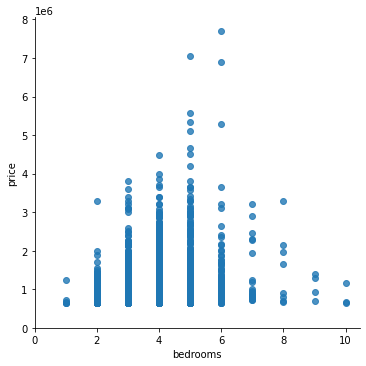

In [131]:
# new scatter plot with sensible axes limits
# Plot using Seaborn
sns.lmplot(x='bedrooms', y='price', data=hpv,
           fit_reg=False)
 
# Tweak using Matplotlib
plt.ylim(0, None)
plt.xlim(0, None)

plt.show()

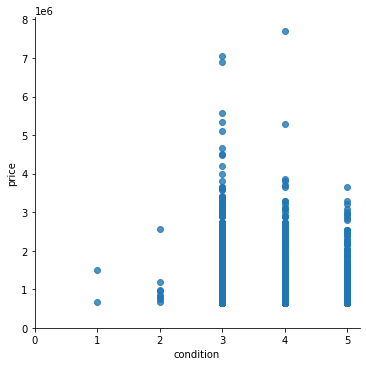

In [132]:
# new scatter plot with sensible axes limits
# Plot using Seaborn
sns.lmplot(x='condition', y='price', data=hpv,
           fit_reg=False)
 
# Tweak using Matplotlib
plt.ylim(0, None)
plt.xlim(0, None)

plt.show()

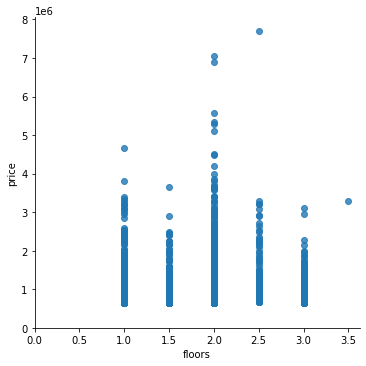

In [133]:
# new scatter plot with sensible axes limits
# Plot using Seaborn
sns.lmplot(x='floors', y='price', data=hpv,
           fit_reg=False)
 
# Tweak using Matplotlib
plt.ylim(0, None)
plt.xlim(0, None)

plt.show()

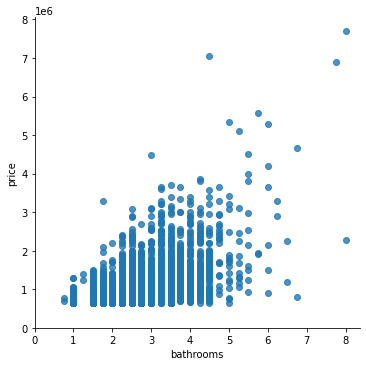

In [134]:
# new scatter plot with sensible axes limits
# Plot using Seaborn
sns.lmplot(x='bathrooms', y='price', data=hpv,
           fit_reg=False)
 
# Tweak using Matplotlib
plt.ylim(0, None)
plt.xlim(0, None)

plt.show()

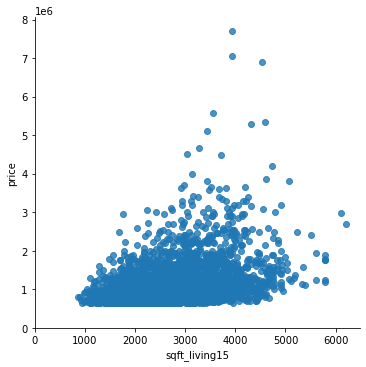

In [135]:
# new scatter plot with sensible axes limits
# Plot using Seaborn
sns.lmplot(x='sqft_living15', y='price', data=hpv,
           fit_reg=False)
 
# Tweak using Matplotlib
plt.ylim(0, None)
plt.xlim(0, None)

plt.show()

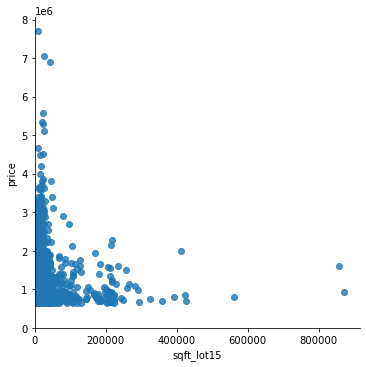

In [136]:
# new scatter plot with sensible axes limits
# Plot using Seaborn
sns.lmplot(x='sqft_lot15', y='price', data=hpv,
           fit_reg=False)
 
# Tweak using Matplotlib
plt.ylim(0, None)
plt.xlim(0, None)

plt.show()

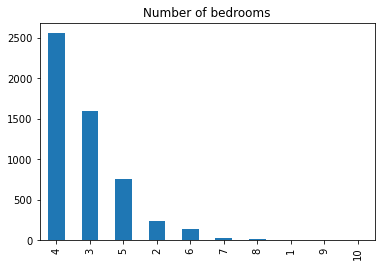

In [137]:
ax = hpv['bedrooms'].value_counts().plot(kind='bar',
                                    title="Number of bedrooms")

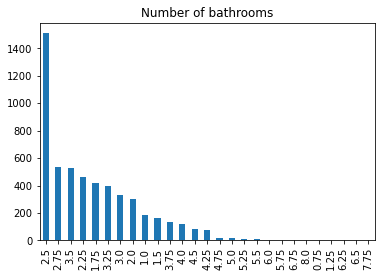

In [138]:
ax = hpv['bathrooms'].value_counts().plot(kind='bar',
                                    title="Number of bathrooms")

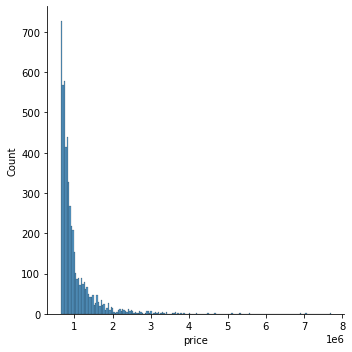

In [139]:
sns.displot(hpv['price'])

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

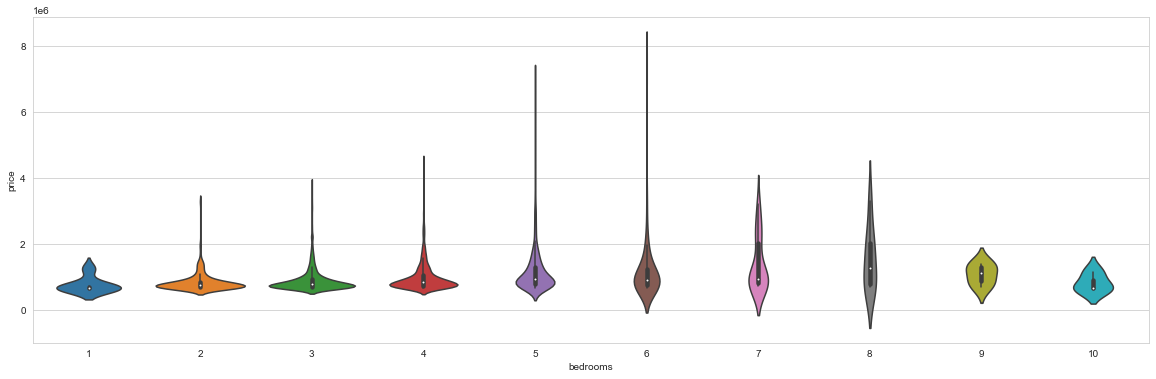

In [140]:
# bathrooms x price violinplot 

# Set figure size with matplotlib
plt.figure(figsize=(20,6))
 
# Set theme
sns.set_style('whitegrid')
 
# Violin plot
sns.violinplot(x='bedrooms', y='price', data=hpv)

## 3.4 EDA visualization plots with matplot and seaborn

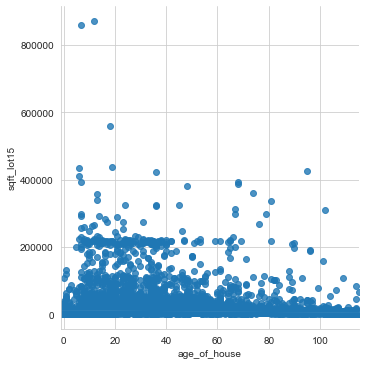

In [141]:
# making a scatter plot using the lmplot() function.
# Recommended way (use data=)
sns.lmplot(x='age_of_house', y='sqft_lot15', data=df)

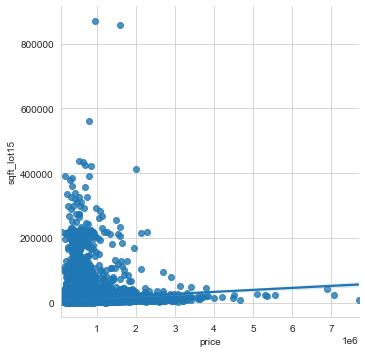

In [142]:
# making a scatter plot using the lmplot() function.
# Recommended way (use data=)
sns.lmplot(x='price', y='sqft_lot15', data=df)
#straightline = regression line

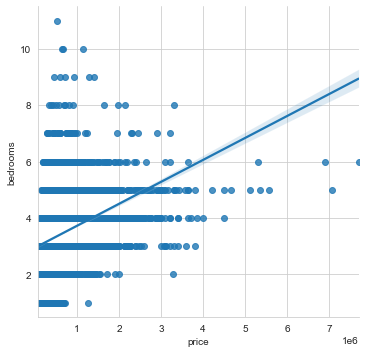

In [143]:
# making a scatter plot using the lmplot() function.
# Recommended way (use data=)
sns.lmplot(x='price', y='bedrooms', data=df)
#straightline = regression line

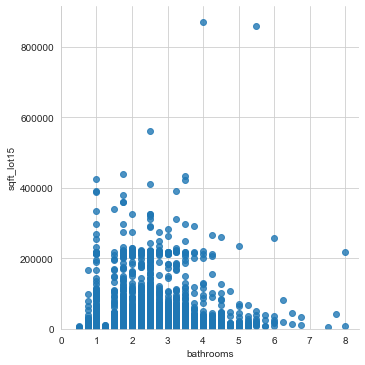

In [144]:
# new scatter plot with sensible axes limits
# Plot using Seaborn
sns.lmplot(x='bathrooms', y='sqft_lot15', data=df,
           fit_reg=False)
 
# Tweak using Matplotlib
plt.ylim(0, None)
plt.xlim(0, None)

plt.savefig('snsscatterplot')

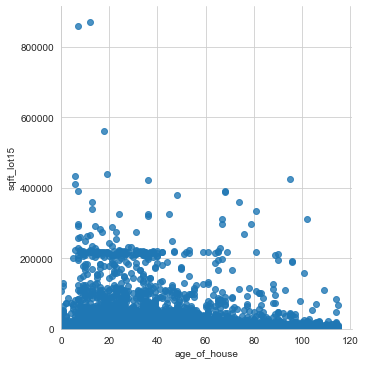

In [145]:
# new scatter plot with sensible axes limits
# Plot using Seaborn
sns.lmplot(x='age_of_house', y='sqft_lot15', data=df,
           fit_reg=False)
 
# Tweak using Matplotlib
plt.ylim(0, None)
plt.xlim(0, None)

plt.savefig('snsscatterplot')

<AxesSubplot:xlabel='bathrooms', ylabel='price'>

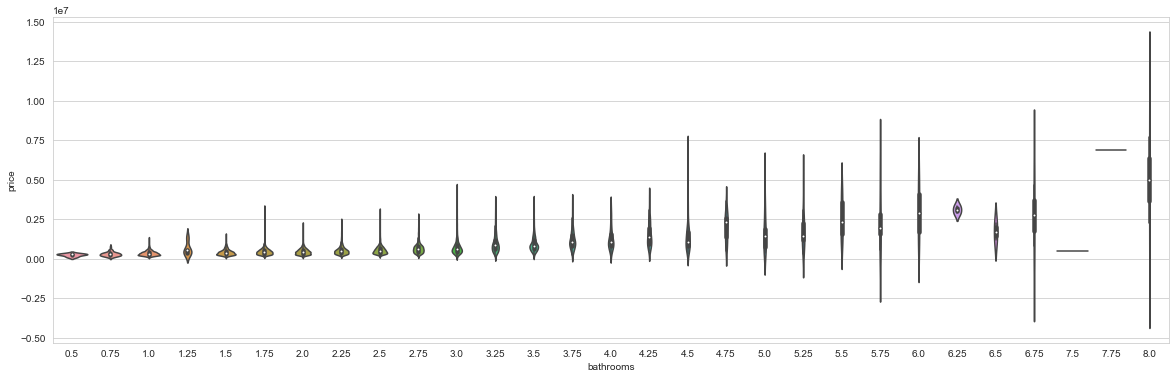

In [146]:
# bathrooms x price violinplot 

# Set figure size with matplotlib
plt.figure(figsize=(20,6))
 
# Set theme
sns.set_style('whitegrid')
 
# Violin plot
sns.violinplot(x='bathrooms', y='price', data=df)

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

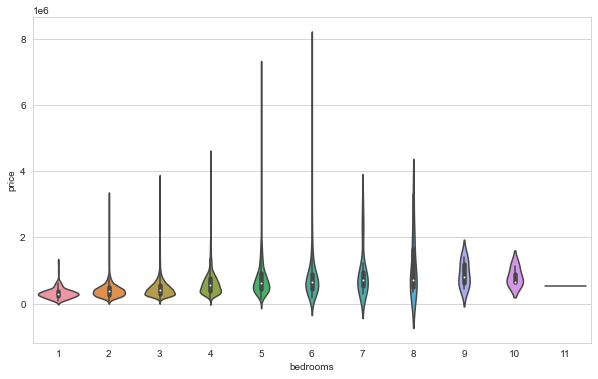

In [147]:
# bedrooms x price violinplot 

# Set figure size with matplotlib
plt.figure(figsize=(10,6))
 
# Set theme
sns.set_style('whitegrid')
 
# Violin plot
sns.violinplot(x='bedrooms', y='price', data=df)


<AxesSubplot:xlabel='floors', ylabel='price'>

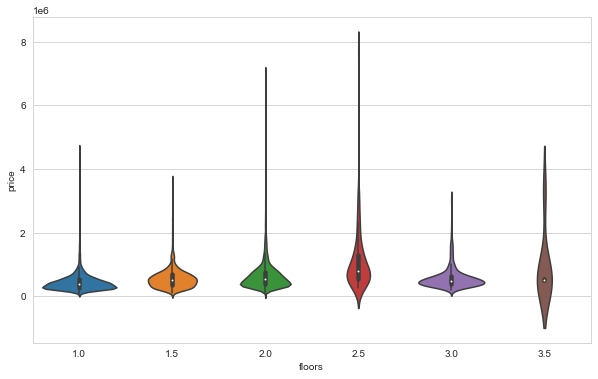

In [148]:
# floors x price violinplot 

# Set figure size with matplotlib
plt.figure(figsize=(10,6))
 
# Set theme
sns.set_style('whitegrid')
 
# Violin plot
sns.violinplot(x='floors', y='price', data=df)


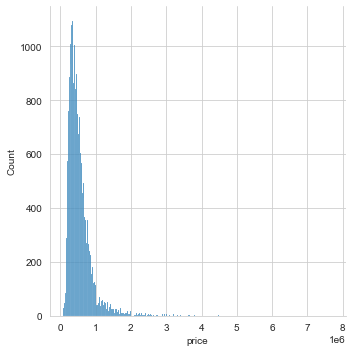

In [149]:
sns.displot(df['price'])

In [150]:
df['price'].describe()

count    2.159700e+04
mean     5.402966e+05
std      3.673681e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

### 3.4.1 boxplots - visualizing outliers

In [151]:
df.columns

Index(['property_id', 'new_date', 'date', 'bedrooms', 'bathrooms', 'floors',
       'waterfront', 'condition', 'grade', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15',
       'sqft_lot15', 'price', 'year_date', 'age_of_house',
       'age_of_renovation'],
      dtype='object')

<AxesSubplot:>

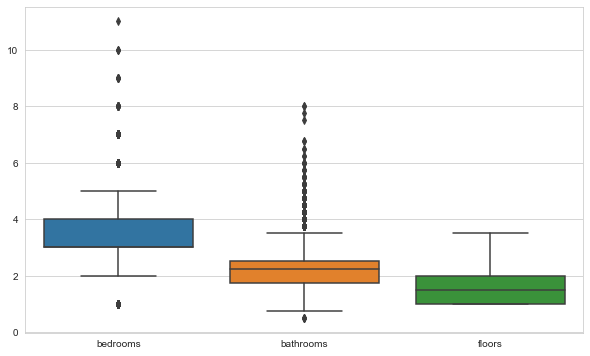

In [152]:
# bedrooms, bathrooms and floors boxplot

# Set figure size with matplotlib
plt.figure(figsize=(10,6))
 
# Pre-format DataFrame
df_bp1 = df.drop(['property_id', 'new_date', 'date', 'waterfront', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'price', 'age_of_house',
       'age_of_renovation', 'year_date'],axis=1)

# New boxplot using stats_df
sns.boxplot(data=df_bp1)

## 3.5 Explore relationships between variables

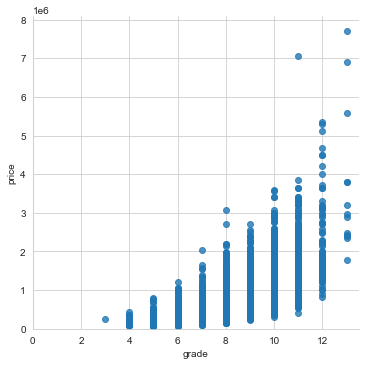

In [153]:
# new scatter plot with sensible axes limits
# Plot using Seaborn
sns.lmplot(x='grade', y='price', data=df,
           fit_reg=False)
 
# Tweak using Matplotlib
plt.ylim(0, None)
plt.xlim(0, None)

plt.show()


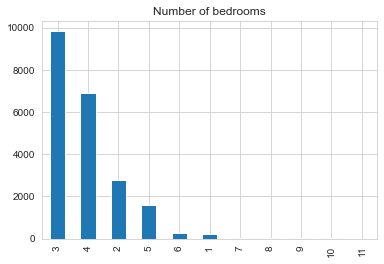

In [154]:
ax = df['bedrooms'].value_counts().plot(kind='bar',
                                    title="Number of bedrooms")

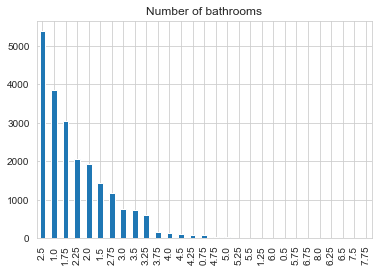

In [155]:
ax = df['bathrooms'].value_counts().plot(kind='bar',
                                    title="Number of bathrooms")

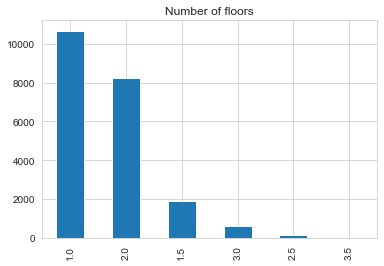

In [156]:
ax = df['floors'].value_counts().plot(kind='bar',
                                    title="Number of floors")

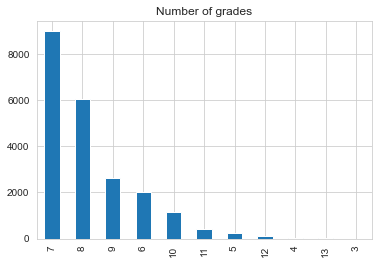

In [157]:
ax = df['grade'].value_counts().plot(kind='bar',
                                    title="Number of grades")

<code style="background:black">SOME SECOND EDA AND CLEANING NOTES</code>
Focused on price variable
- mean, min and max of some var checked (bedrooms, bathrooms, floors, sqft_lot15, price)
- difference between some var checked
- mean price per some vars 
- highest and min price checked
- how to find for a concrete type of house matching some variables
- first price IQR calculation
- first exploring plots with matplot lib and seaborn done
- outliers checked

----

# 4.Correlation and Heatmap

In [158]:
# check dataset correlation
df.corr()

,bedrooms,bathrooms,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,price,year_date,age_of_house,age_of_renovation
bedrooms,1.000000,0.527874,0.183721,-0.006868,0.023390,0.366181,0.492549,0.309244,0.160748,0.019164,-0.011612,0.136574,0.404540,0.031898,0.315954,-0.009132,-0.160882,-0.010057
bathrooms,0.527874,1.000000,0.502582,0.063744,-0.126479,0.665838,0.686668,0.283440,0.507173,0.050544,0.024280,0.224903,0.569884,0.088303,0.525906,-0.026577,-0.507561,-0.001595
floors,0.183721,0.502582,1.000000,0.023755,-0.264075,0.458794,0.523989,-0.245715,0.489193,0.006427,0.049239,0.125943,0.280102,-0.010722,0.256804,-0.022352,-0.489514,-0.001787
waterfront,-0.006868,0.063744,0.023755,1.000000,0.016611,0.082888,0.072109,0.080559,-0.026153,0.092873,-0.014306,-0.041904,0.086507,0.030781,0.266398,-0.004168,0.026085,0.104201
condition,0.023390,-0.126479,-0.264075,0.016611,1.000000,-0.146896,-0.158904,0.173849,-0.361592,-0.060788,-0.015102,-0.105877,-0.093072,-0.003126,0.036056,-0.045898,0.360836,-0.006489
grade,0.366181,0.665838,0.458794,0.082888,-0.146896,1.000000,0.756073,0.168220,0.447865,0.014261,0.113575,0.200341,0.713867,0.120981,0.667951,-0.030635,-0.448322,-0.023071
sqft_above,0.492549,0.686668,0.523989,0.072109,-0.158904,0.756073,1.000000,-0.052156,0.424037,0.023251,-0.001199,0.344842,0.731767,0.195077,0.605368,-0.023782,-0.424386,0.008587
sqft_basement,0.309244,0.283440,-0.245715,0.080559,0.173849,0.168220,-0.052156,1.000000,-0.133064,0.071233,0.110414,-0.144546,0.200443,0.017550,0.323799,-0.015706,0.132805,0.023915
yr_built,0.160748,0.507173,0.489193,-0.026153,-0.361592,0.447865,0.424037,-0.133064,1.000000,-0.224907,-0.148370,0.409993,0.326377,0.070777,0.053953,0.003574,-0.999873,-0.196517
yr_renovated,0.019164,0.050544,0.006427,0.092873,-0.060788,0.014261,0.023251,0.071233,-0.224907,1.000000,0.029350,-0.068321,-0.002695,0.007944,0.126424,-0.023719,0.224514,0.753015


<AxesSubplot:>

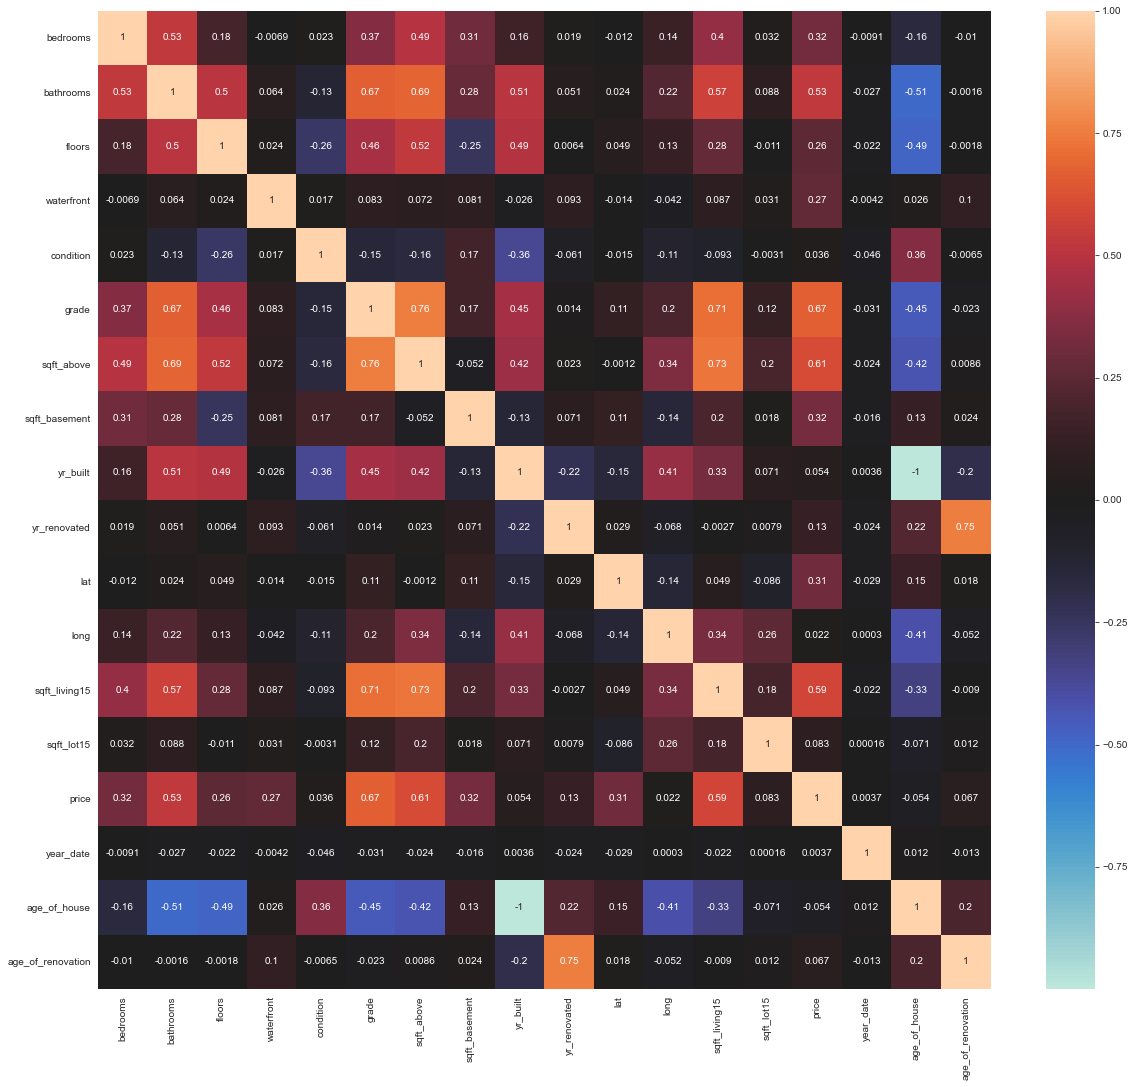

In [159]:
# Calculate correlations
corr = df.corr()
 
# Heatmap
plt.figure(figsize=(20,18))
sns.heatmap(corr,
           center=0,
           annot=True)


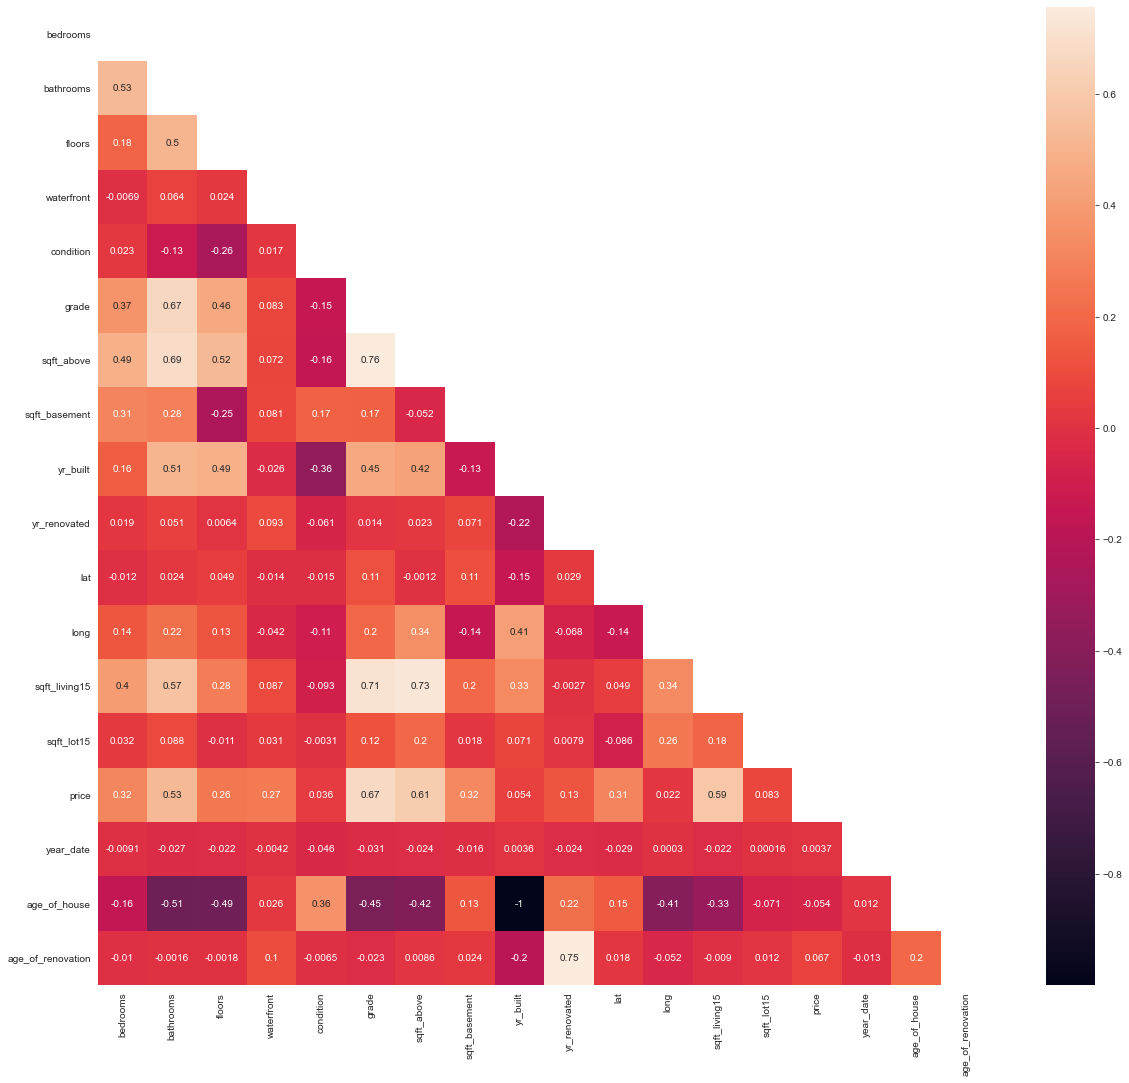

In [160]:
mask=np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)]=True

fig, ax=plt.subplots(figsize=(20, 18))
ax=sns.heatmap(df.corr(), mask=mask, annot=True,)
plt.show()

**Which variables affect more to the price?**
- GRADE(0.7)


followed by 
- SQFT_ABOVE(0.6) 
- SQFT_LIVING15(0.6) 
- BATHROOMS(0.5)

## 4.1 Correlation coefficient

Text(0, 0.5, 'Grade')

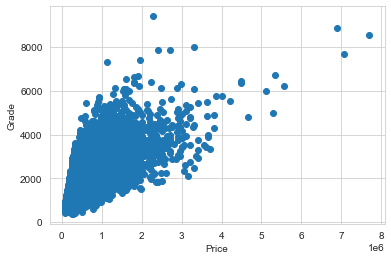

In [161]:
# correlation coefficient price x sqft_above
cap_avg = df.groupby(['property_id']).mean()
plt.scatter(cap_avg['price'],cap_avg['sqft_above'])
plt.xlabel('Price')
plt.ylabel('Grade')

In [162]:
corr=round(st.pearsonr(cap_avg['price'],cap_avg['sqft_above'])[0],2)
print(f"The correlation coefficient between price and sqft_above is {corr}")

The correlation coefficient between price and sqft_above is 0.6


In [163]:
model=st.linregress(cap_avg['price'],cap_avg['sqft_above'])
model

LinregressResult(slope=0.0013636099159039239, intercept=1053.0479227852638, rvalue=0.6049902080630082, pvalue=0.0, stderr=1.2262879828495453e-05, intercept_stderr=8.024242848868779)

In [164]:
slope=0.0013636099159039239
intercept=1053.0479227852638

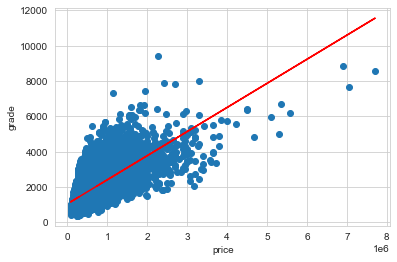

In [165]:
y_values = cap_avg['price']*slope+intercept

plt.scatter(cap_avg['price'],cap_avg['sqft_above'])
plt.plot(cap_avg['price'],y_values,color="red")

plt.xlabel('price')
plt.ylabel('grade')

plt.show()

Text(0, 0.5, 'Grade')

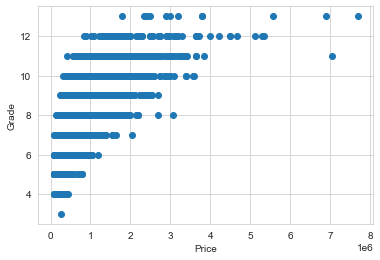

In [166]:
# correlation coefficient price x grade

prigra_avg = df.groupby(['property_id']).mean()
plt.scatter(prigra_avg['price'],prigra_avg['grade'])
plt.xlabel('Price')
plt.ylabel('Grade')

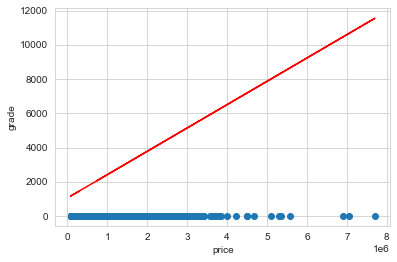

In [167]:
y_values = prigra_avg['price']*slope+intercept

plt.scatter(prigra_avg['price'],prigra_avg['grade'])
plt.plot(prigra_avg['price'],y_values,color="red")

plt.xlabel('price')
plt.ylabel('grade')

plt.show()

In [168]:
corr=round(st.pearsonr(prigra_avg['price'],prigra_avg['grade'])[0],2)
print(f"The correlation coefficient between price and grade is {corr}")

The correlation coefficient between price and grade is 0.67


In [169]:
model=st.linregress(prigra_avg['price'],prigra_avg['grade'])
model

LinregressResult(slope=2.127962733360434e-06, intercept=6.510925174278828, rvalue=0.6675733024406698, pvalue=0.0, stderr=1.6216831907646365e-08, intercept_stderr=0.01061152023718428)

In [170]:
slope=2.127962733360434
intercept=6.510925174278828

<code style="background:black">Some correlation notes</code>

Focused on the variables that affect more the price (source: heatmap and mask)
- The correlation coefficient between price and sqft_above is 0.6
- The linear regression looks better than the next one
- The correlation coefficient between price and grade is 0.67
- But something happens with the linear regression

----

# 5. EDA and Cleaning - round 3

## 5.1 Outliers

### 5.1.1 Outliers in continuous variables

In [171]:
continuous

['sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

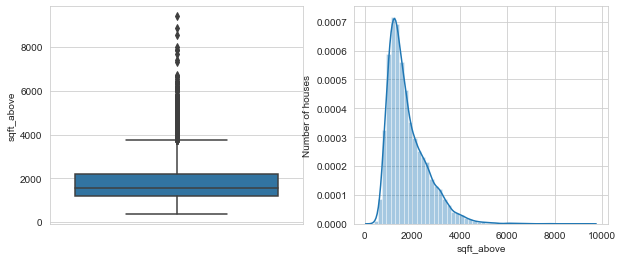

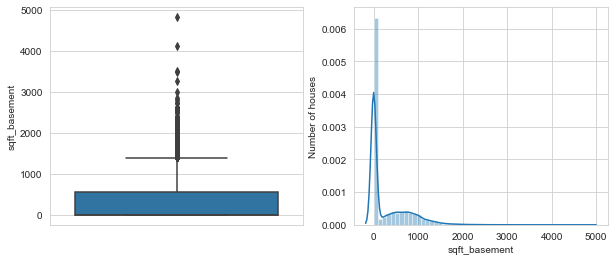

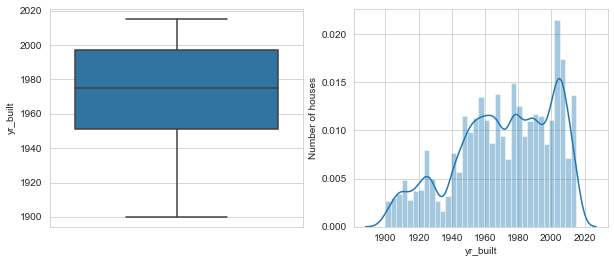

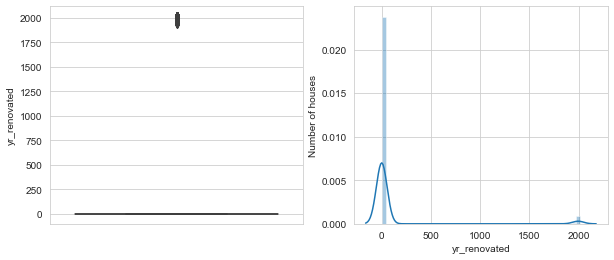

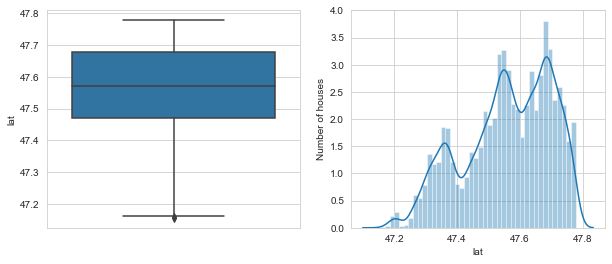

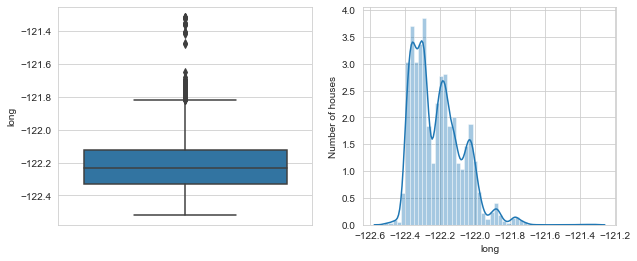

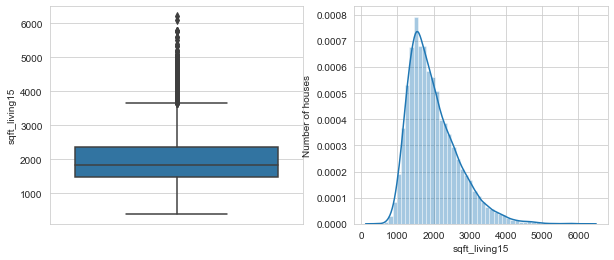

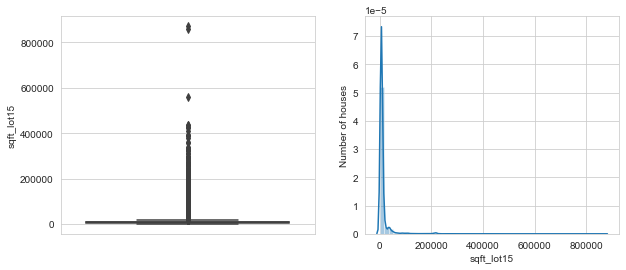

In [172]:
# let's make boxplots to visualise outliers in the continuous variables 
# and histograms to get an idea of the distribution

for var in continuous:
    plt.figure(figsize=(10,4))
    plt.subplot(1, 2, 1)
    fig = sns.boxplot(y=df[var])
    fig.set_title('')
    fig.set_ylabel(var)
    
    plt.subplot(1, 2, 2)
    fig = sns.distplot(df[var].dropna())
    fig.set_ylabel('Number of houses')
    fig.set_xlabel(var)

    plt.show()

- the majority of the continuous var seem to contain outliers (dots outside the whiskers) 
- the majority of the continuous var are not normally distributed
- how to solve this for improving the performance of the algorithm? 
- transforming the variables with a box cox to make them more Gaussian

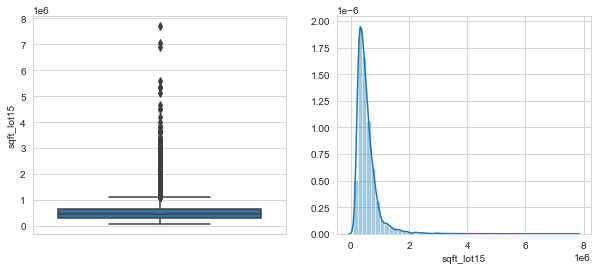

In [173]:
# let's look at the distribution of the target variable

plt.figure(figsize=(10,4))
plt.subplot(1, 2, 1)
fig = sns.boxplot(y=df['price'])
fig.set_title('')
fig.set_ylabel(var)

plt.subplot(1, 2, 2)
fig = sns.distplot(df['price'].dropna())#.hist(bins=20)
fig.set_ylabel('')
fig.set_xlabel(var)

plt.show()

- the target variable (price) is skewed 

### 5.1.2 Outliers in discrete variables 

- Call outliers those values that are present in less than 1% of the houses.

In [174]:
# outlies in discrete variables
# for var in discrete:
    #print(df[var].value_counts() / np.float(len(df)))
    #print()

- Most of the discrete variables show values that are shared by a tiny proportion. 
- For linear regression, this may not be a problem.
- For tree methods it will be a problem.

## 5.2 Number of categorical labels

In [175]:
for var in categorical:
    print(var, ' contains ', len(df[var].unique()), ' labels')

property_id  contains  21420  labels
zipcode  contains  70  labels


- zipcode has a high cardinality: this may affect the performance of some ML models like trees 

----

# 6. Modeling - Round 1

In [176]:
num

,bedrooms,bathrooms,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,price,year_date,age_of_house,age_of_renovation
0,3,1.00,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,221900,2014,59,0
1,3,2.25,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639,538000,2014,63,23
2,2,1.00,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062,180000,2015,82,0
3,4,3.00,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000,604000,2014,49,0
4,3,2.00,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503,510000,2015,28,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,3,2.50,3.0,0,0,3,8,1530,0,2009,0,47.6993,-122.346,1530,1509,360000,2014,5,0
21593,4,2.50,2.0,0,0,3,8,2310,0,2014,0,47.5107,-122.362,1830,7200,400000,2015,1,0
21594,2,0.75,2.0,0,0,3,7,1020,0,2009,0,47.5944,-122.299,1020,2007,402101,2014,5,0
21595,3,2.50,2.0,0,0,3,8,1600,0,2004,0,47.5345,-122.069,1410,1287,400000,2015,11,0


In [177]:
# define the target variable ( y: price) and the features (x)
X=num.drop('price', axis=1)
y=df.price

In [178]:
X.dtypes

bedrooms               int64
bathrooms            float64
floors               float64
waterfront             int64
view                   int64
condition              int64
grade                  int64
sqft_above             int64
sqft_basement          int64
yr_built               int64
yr_renovated           int64
lat                  float64
long                 float64
sqft_living15          int64
sqft_lot15             int64
year_date              int64
age_of_house           int64
age_of_renovation      int64
dtype: object

In [179]:
X.head()

,bedrooms,bathrooms,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year_date,age_of_house,age_of_renovation
0,3,1.00,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,2014,59,0
1,3,2.25,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639,2014,63,23
2,2,1.00,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062,2015,82,0
3,4,3.00,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000,2014,49,0
4,3,2.00,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503,2015,28,0


In [180]:
#check the shapes of both X, Y 
print('X shape:', X.shape)
print('Y shape:', y.shape)

X shape: (21597, 18)
Y shape: (21597,)


In [181]:
y.head()

0    221900
1    538000
2    180000
3    604000
4    510000
Name: price, dtype: int64

## 6.1 Split into train - test

In [182]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=.25, random_state = 40) # (60% train, 40% test)

In [183]:
import warnings
warnings.simplefilter('ignore')

import statsmodels.api as sm
from statsmodels.formula.api import ols #print OLS Regression Results

X_train_ols=sm.add_constant(X_train)
model=sm.OLS(y_train,X_train_ols).fit() 

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.695
Method:                 Least Squares   F-statistic:                     2176.
Date:                Fri, 19 Nov 2021   Prob (F-statistic):               0.00
Time:                        01:49:39   Log-Likelihood:            -2.2101e+05
No. Observations:               16197   AIC:                         4.421e+05
Df Residuals:                   16179   BIC:                         4.422e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -9.594e+07   7.19e+0

[How to read OLS Regression Results](https://www.geeksforgeeks.org/interpreting-the-results-of-linear-regression-using-ols-summary/)

## 6.2 Apply models - Round 1

In [184]:
from sklearn.metrics import accuracy_score

### 6.2.1 Linear Regression

In [185]:
# create a linear regression variable
lm = LinearRegression()

In [186]:
#train the model
lm.fit(X_train,y_train)

LinearRegression()

In [187]:
lm1 = lm.score(X_test,y_test)
lm1

0.7072044004664976

In [188]:
#Fit over our train data and predict against X test features
y_pred= lm.predict(X_test)

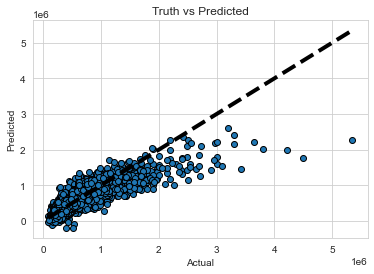

In [189]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "k--", lw=4)
ax.set_xlabel("Actual")
ax.set_ylabel("Predicted")
ax.set_title("Truth vs Predicted")
# this show function will display the plotting
plt.show()

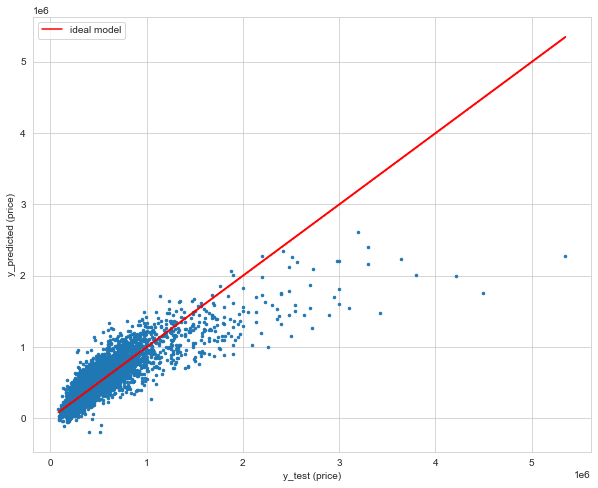

In [190]:
# generate value pairs for an ideal model which predicts the exact same y-value for a given test-y-value
line_x = line_y = np.linspace(min(y_test), max(y_test), num=len(y_test))
fig, ax = plt.subplots(figsize=(10,8))
plt.plot(y_test, y_pred, ms=5, marker=".", ls='')
# plot the ideal model together with our dots
plt.plot(line_x, line_y, ms=0.1, marker=".", ls='-', c='r', label='ideal model')
# show legend
plt.legend();
plt.xlabel('y_test (price)');
plt.ylabel('y_predicted (price)');

### R2

In [191]:
linreg=LinearRegression()    # model
linreg.fit(X_train, y_train)   # model train
y_pred=linreg.predict(X_test)

In [192]:
print ('train R2: {}, test R2: {}'.format(linreg.score(X_train, y_train),
                                            linreg.score(X_test, y_test)))

train R2: 0.6956710995573265, test R2: 0.7072044004664976


In [193]:
print('R2: ', r2_score(y_test, y_pred))

R2:  0.7072044004664976


### MSE mean_squared_error 

In [194]:
train_mse=mean_squared_error(linreg.predict(X_train), y_train)
test_mse=mean_squared_error(linreg.predict(X_test), y_test)

print ('train MSE: {}, test MSE: {}'.format(train_mse, test_mse))

train MSE: 41665692214.656364, test MSE: 37784489741.64282


In [195]:
print('MSE:', mean_squared_error(y_test, y_pred))

MSE: 37784489741.64282


### Root Mean Square Error (RMSE)

In [196]:
print('RMSE: ', math.sqrt(mean_squared_error(y_test, y_pred)))

RMSE:  194382.32877924584


### Mean Absolute Error (MAE)

In [197]:
print('MAE: ', mae(y_test, y_pred))

MAE:  123923.83848743017


### 6.2.2 Linear Models Automation (LinReg, Lasso, Ridge and ElasticNet()

In [198]:
# print in one command Linear Regression, Lasso, Ridge and ElasticNet
def models_automation(models, X_train, y_train):
    for model in models:
        model.fit(X_train, y_train)
        print(f"{model.__class__.__name__}: Train: {round(model.score(X_train, y_train),4)}, Test: {round(model.score(X_test, y_test),4)}")

linear_models = [LinearRegression(), Lasso(), Ridge(), ElasticNet()]
models_automation(linear_models, X_train, y_train)

LinearRegression: Train: 0.6957, Test: 0.7072
Lasso: Train: 0.6957, Test: 0.7072
Ridge: Train: 0.6957, Test: 0.7072
ElasticNet: Train: 0.6201, Test: 0.6279


In [199]:
ridge1 = Ridge()
ridge1.fit(X_train, y_train)
ridge1 = ridge1.score(X_train, y_train)
ridge1

0.695669067841727

In [200]:
elasticnet1 = ElasticNet()
elasticnet1.fit(X_train, y_train)
elasticnet1 = elasticnet1.score(X, y)
elasticnet1

0.6219825153701772

In [201]:
lasso1 = Lasso()
lasso1.fit(X_train, y_train)
lasso1 = lasso1.score(X, y)
lasso1

0.698448813914308

### 6.2.3 Lasso

- a method use to fit a regression model when multicollinearity


In [202]:
from sklearn.linear_model import LassoCV
from sklearn.model_selection import RepeatedKFold

In [203]:
model = Lasso().fit(X, y) 
print(model)
score = model.score(X, y)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test,y_pred)
print("Alpha:{0:.2f}, R2:{1:.2f}, MSE:{2:.2f}, RMSE:{3:.2f}"
    .format(model.alpha, score, mse, np.sqrt(mse)))

Lasso()
Alpha:1.00, R2:0.70, MSE:37636654395.14, RMSE:194001.69


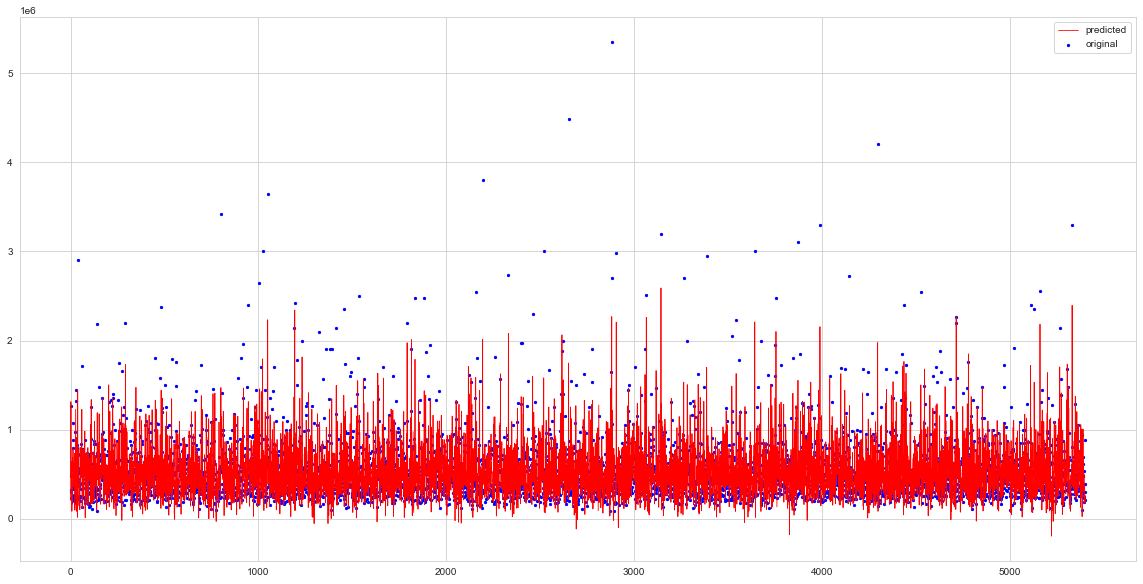

In [204]:
x_ax = range(len(y_pred))
plt.subplots(figsize=(20, 10))
plt.scatter(x_ax, y_test, s=5, color="blue", label="original")
plt.plot(x_ax, y_pred, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()

In [205]:
alphas = [0.1,0.3, 0.5, 0.8, 1]
lassocv = LassoCV(alphas=alphas, cv=5).fit(X,y)
print(lassocv)
score = lassocv.score(X,y)
y_pred = lassocv.predict(X_test)
mse = mean_squared_error(y_test,y_pred)
print("Alpha:{0:.2f}, R2:{1:.3f}, MSE:{2:.2f}, RMSE:{3:.2f}"
    .format(lassocv.alpha_, score, mse, np.sqrt(mse)))

LassoCV(alphas=[0.1, 0.3, 0.5, 0.8, 1], cv=5)
Alpha:0.10, R2:0.699, MSE:37636622624.31, RMSE:194001.60


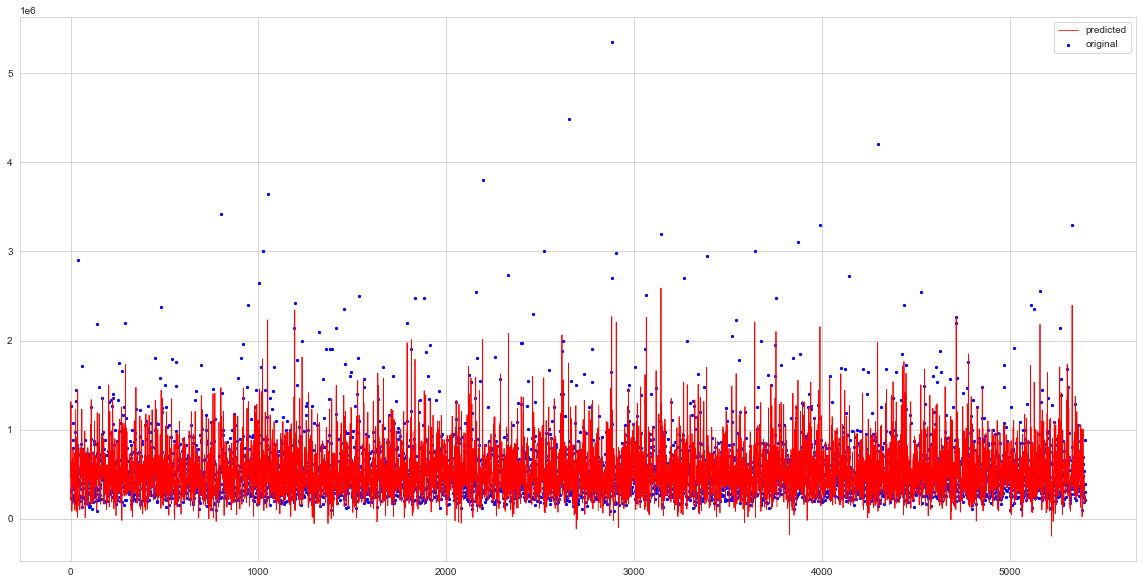

In [206]:
x_ax = range(len(X_test))
plt.subplots(figsize=(20, 10))
plt.scatter(x_ax, y_test, s=5, color="blue", label="original")
plt.plot(x_ax, y_pred, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show() 

### 6.2.4 SVR Support Vector Regression
- supports linear and non-linear regression
- to fit as many instances as possible between the lines while limiting the margin violations
- SVR parameter is Kernel type. It can be #linear,polynomial or gaussian SVR. 

In [207]:
# SVR
svr = [SVR()]
models_automation(svr, X_train, y_train)

SVR: Train: -0.0615, Test: -0.0558


In [208]:
svr1 = SVR()
svr1.fit(X_train, y_train)
svr1 = svr1.score(X, y)
svr1

-0.060075786771432105

### 6.2.5 KNN

- A non-parametric algorithm that can be used for both classification and regression problems.
- The number of neighbors to include in the calculation (i.e. the size of k) is in practice determined by trial, comparing prediction errors for different values of k. (extracted from pdf notes)

In [209]:
# KNN
knn = [KNeighborsRegressor()]
models_automation(knn, X_train, y_train)

KNeighborsRegressor: Train: 0.7082, Test: 0.5531


In [210]:
knn1 = KNeighborsRegressor()
knn1.fit(X_train, y_train)
knn1 = knn1.score(X, y)
knn1

0.6711430380669585

- **Cross validation** was used for finding the optimal hyperparamaters, such as the ’k’ for k-NN.

In [211]:
#define cross-validation method to evaluate model
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

### 6.2.6 Decision trees - Regressor

In [212]:
# Decision tree regressor
dtr = [DecisionTreeRegressor()]
models_automation(dtr, X_train, y_train)

DecisionTreeRegressor: Train: 0.9999, Test: 0.7269


In [213]:
dtr1 = DecisionTreeRegressor()
dtr1.fit(X_train, y_train)
dtr1 = dtr1.score(X, y)
dtr1

0.9327576895799189

### 6.2.7 Decision trees - Random Forest Regressor
- constructed by using a collection of decision trees based on the training data. 
- Instead of taking the target value from a single tree, the Random forest algorithm makes a prediction on the **average prediction of a collection of trees**.
- The decision trees themselves are constructed by **fitting to randomly drawn groups** of rows and columns in the training data (bagging method)
- **'n_estimators'**: hyperparameter of the algorithm - the number of trees in the RF. Depending on the number, the computation time varies
- **'criterion'**: determines what error metric to use dor meaduring the quality of splits in the trees in the Random forest. The value can be either mean squared error or mean absolute error. 
- **'max_features'**: controls the number of features to consider when building the trees.

(extracted from pdf notes)

In [214]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

In [215]:
# RandomForestRegressor
rfr = [RandomForestRegressor()]
models_automation(rfr, X_train, y_train)

RandomForestRegressor: Train: 0.9811, Test: 0.8767


In [216]:
rfr1 = RandomForestRegressor()
rfr1.fit(X_train, y_train)
rfr1 = rfr1.score(X, y)
rfr1

0.9562450490848242

In [217]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
X, y = make_regression(n_features=4, n_informative=2, 
                       random_state=0, shuffle=False)
regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(X, y)
RandomForestRegressor(...)
print(regr.predict([[0, 0, 0, 0]]))

[-8.32987858]


### 6.2.8 Gradient Boosting Regressor

In [218]:
# GradientBoostingRegressor
gbr = [GradientBoostingRegressor()]
models_automation(gbr, X_train, y_train)

GradientBoostingRegressor: Train: 0.8951, Test: 0.8723


In [219]:
from sklearn import ensemble
gbr = ensemble.GradientBoostingRegressor(n_estimators = 400, max_depth = 5, min_samples_split = 2,
          learning_rate = 0.1, loss = 'ls')

In [220]:
gbr.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=5, n_estimators=400)

In [221]:
gbr1 = gbr.score(X_test,y_test)
gbr1

0.9026020754799448

### 6.2.9 Notes

<code style="background:black">SOME ITERATION AND MODELING NOTES - ROUND 1</code>

RESULTS
- LinearRegression: Train: 0.6956286239903502, Test: 0.6772185829069671
- Lasso: Train: 0.6956286220274035, Test: 0.6772182020214442
- Ridge: Train: 0.6956259406554346, Test: 0.677209087692469
- ElasticNet: Train: 0.6110489327962925, Test: 0.5955733671627599
- R2: train R2: 0.6956286239903502, test R2: 0.6772185829069671
- MSE: train MSE: 40846696434.20707, test MSE: 44285516979.783585
- SVR: Train: -0.06175541196400691, Test: -0.05524644408996071
- KNeighborsRegressor: Train: 0.7055906751211558, Test: 0.5530954303494211
- DecisionTreeRegressor: Train: 0.9999020548641058, Test: 0.7450179476083412
- RandomForestRegressor: Train: 0.9812881469173241, Test: 0.8640082229831408
- GradientBoostingRegressor: Train: 0.8920110045343642, Test: 0.8579192416875356


NOTES:
- Linear Regression is just under 70%. That's not bad. 
- Random Forest Regressor and Decision Tree Regressor, followed by Gradient Boosing Regressor have the highest score, but maybe is too much high and in consequence is not really usefull (it's overfitted)


----

# 7. EDA and Cleaning - round 4

## 7.1 Droping columns with low correlation

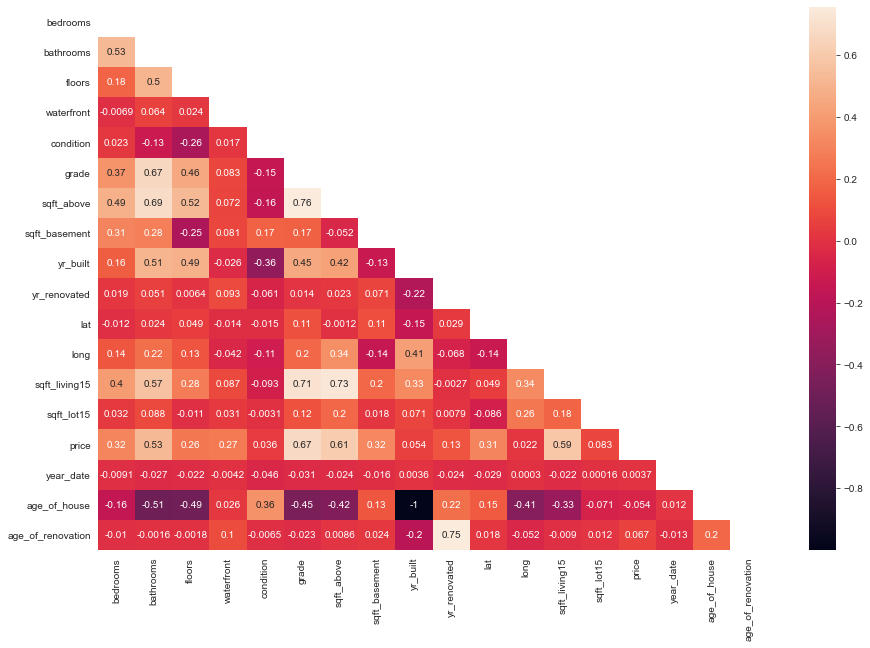

In [222]:
mask=np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)]=True
fig, ax=plt.subplots(figsize=(15, 10))
ax=sns.heatmap(df.corr(), mask=mask, annot=True, fmt='.2g')
plt.show()

In [223]:
df['waterfront'].value_counts()

0    21434
1      163
Name: waterfront, dtype: int64

In [224]:
df.columns

Index(['property_id', 'new_date', 'date', 'bedrooms', 'bathrooms', 'floors',
       'waterfront', 'condition', 'grade', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15',
       'sqft_lot15', 'price', 'year_date', 'age_of_house',
       'age_of_renovation'],
      dtype='object')

In [225]:
# drop columns with a correlation under 0.20
dfm2 = df.drop(['property_id','new_date','date','condition','yr_built', 'long', 'lat', 'sqft_lot15', 'yr_renovated', 'year_date', 'age_of_house', 'age_of_renovation', 'waterfront','zipcode'], axis=1, inplace=False)

In [226]:
dfm2

,bedrooms,bathrooms,floors,grade,sqft_above,sqft_basement,sqft_living15,price
0,3,1.00,1.0,7,1180,0,1340,221900
1,3,2.25,2.0,7,2170,400,1690,538000
2,2,1.00,1.0,6,770,0,2720,180000
3,4,3.00,1.0,7,1050,910,1360,604000
4,3,2.00,1.0,8,1680,0,1800,510000
...,...,...,...,...,...,...,...,...
21592,3,2.50,3.0,8,1530,0,1530,360000
21593,4,2.50,2.0,8,2310,0,1830,400000
21594,2,0.75,2.0,7,1020,0,1020,402101
21595,3,2.50,2.0,8,1600,0,1410,400000


In [227]:
# drop columns with a correlation under 0.50
dfm2_2 = dfm2.drop(['bedrooms','floors', 'sqft_basement'], axis=1, inplace=False)

We decided not to drot this 3 columns 'bedrooms','floors', 'sqft_basement' because we think they can be important values, so we are gonna check and manage the outliers below to see if we can mantain it.

<AxesSubplot:>

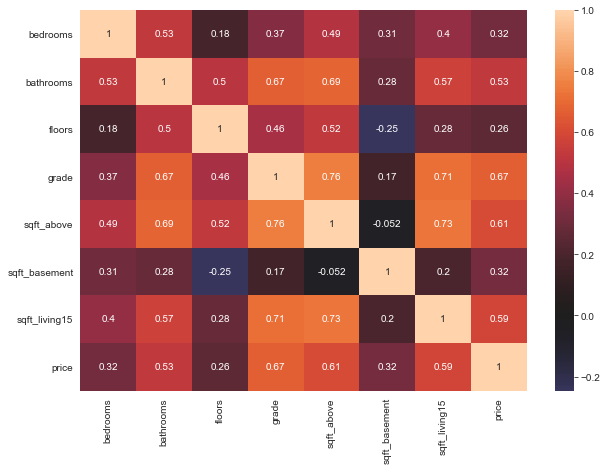

In [228]:
# Calculate correlations
corr = dfm2.corr()
 
# Heatmap
plt.figure(figsize=(10,7))
sns.heatmap(corr,
           center=0,
           annot=True)

## 7.2 Removing outliers
Using the IQR

### 7.2.1 bedrooms

<AxesSubplot:xlabel='bedrooms'>

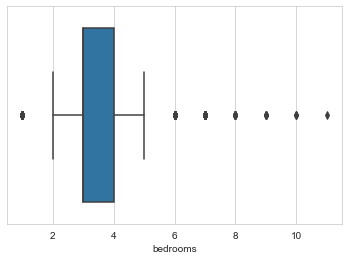

In [229]:
sns.boxplot(x=df['bedrooms'])

In [230]:
# defining the q3 and q1
q3 = dfm2['bedrooms'].quantile(.75)
q1 = dfm2['bedrooms'].quantile(.25)

# calculating the interquartile range
iqr = q3 - q1

# calculating the median
median = dfm2['bedrooms'].median()

# defining the upper and lower limit of the data (1.5*IQR)
outlier_limit_upper = median + 1.5*iqr
outlier_limit_lower = median - 1.5*iqr

# return only those rows between upper and lower outliers
dfm2out = dfm2[(dfm2['bedrooms'] > outlier_limit_lower) & (dfm2['bedrooms'] < outlier_limit_upper)] 

dfm2out

,bedrooms,bathrooms,floors,grade,sqft_above,sqft_basement,sqft_living15,price
0,3,1.00,1.0,7,1180,0,1340,221900
1,3,2.25,2.0,7,2170,400,1690,538000
2,2,1.00,1.0,6,770,0,2720,180000
3,4,3.00,1.0,7,1050,910,1360,604000
4,3,2.00,1.0,8,1680,0,1800,510000
...,...,...,...,...,...,...,...,...
21592,3,2.50,3.0,8,1530,0,1530,360000
21593,4,2.50,2.0,8,2310,0,1830,400000
21594,2,0.75,2.0,7,1020,0,1020,402101
21595,3,2.50,2.0,8,1600,0,1410,400000


<AxesSubplot:xlabel='bedrooms'>

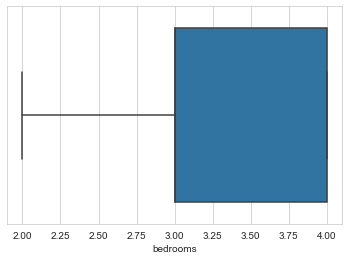

In [231]:
sns.boxplot(x=dfm2out['bedrooms'])

### 7.2.2 bathrooms

<AxesSubplot:xlabel='bathrooms'>

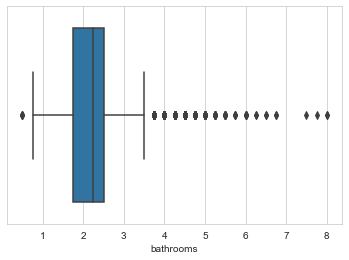

In [232]:
sns.boxplot(x=df['bathrooms'])

In [233]:
# defining the q3 and q1
q3 = dfm2['bathrooms'].quantile(.75)
q1 = dfm2['bathrooms'].quantile(.25)

# calculating the interquartile range
iqr = q3 - q1

# calculating the median
median = dfm2['bathrooms'].median()

# defining the upper and lower limit of the data (1.5*IQR)
outlier_limit_upper = median + 1.5*iqr
outlier_limit_lower = median - 1.5*iqr

# return only those rows between upper and lower outliers
dfm2out = dfm2[(dfm2['bathrooms'] > outlier_limit_lower) & (dfm2['bathrooms'] < outlier_limit_upper)] 

dfm2out

,bedrooms,bathrooms,floors,grade,sqft_above,sqft_basement,sqft_living15,price
1,3,2.25,2.0,7,2170,400,1690,538000
3,4,3.00,1.0,7,1050,910,1360,604000
4,3,2.00,1.0,8,1680,0,1800,510000
6,3,2.25,2.0,7,1715,0,2238,257500
7,3,1.50,1.0,7,1060,0,1650,291850
...,...,...,...,...,...,...,...,...
21589,4,2.50,2.0,9,2520,0,2520,610685
21591,3,2.50,2.0,8,1180,130,1330,475000
21592,3,2.50,3.0,8,1530,0,1530,360000
21593,4,2.50,2.0,8,2310,0,1830,400000


<AxesSubplot:xlabel='bathrooms'>

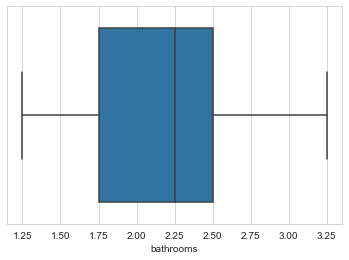

In [234]:
sns.boxplot(x=dfm2out['bathrooms'])

### 7.2.3 floors

<AxesSubplot:xlabel='floors'>

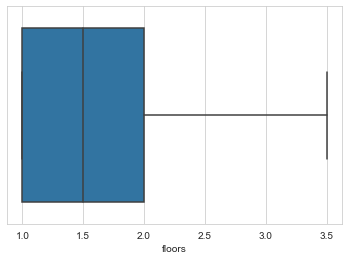

In [235]:
sns.boxplot(x=df['floors'])

In [236]:
# defining the q3 and q1
q3 = dfm2['floors'].quantile(.75)
q1 = dfm2['floors'].quantile(.25)

# calculating the interquartile range
iqr = q3 - q1

# calculating the median
median = dfm2['floors'].median()

# defining the upper and lower limit of the data (1.5*IQR)
outlier_limit_upper = median + 1.5*iqr
outlier_limit_lower = median - 1.5*iqr

# return only those rows between upper and lower outliers
dfm2out = dfm2[(dfm2['floors'] > outlier_limit_lower) & (dfm2['floors'] < outlier_limit_upper)] 

dfm2out

,bedrooms,bathrooms,floors,grade,sqft_above,sqft_basement,sqft_living15,price
0,3,1.00,1.0,7,1180,0,1340,221900
1,3,2.25,2.0,7,2170,400,1690,538000
2,2,1.00,1.0,6,770,0,2720,180000
3,4,3.00,1.0,7,1050,910,1360,604000
4,3,2.00,1.0,8,1680,0,1800,510000
...,...,...,...,...,...,...,...,...
21591,3,2.50,2.0,8,1180,130,1330,475000
21593,4,2.50,2.0,8,2310,0,1830,400000
21594,2,0.75,2.0,7,1020,0,1020,402101
21595,3,2.50,2.0,8,1600,0,1410,400000


<AxesSubplot:xlabel='floors'>

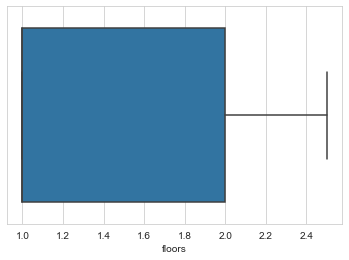

In [237]:
sns.boxplot(x=dfm2out['floors'])

### 7.2.4 sqft_basement

<AxesSubplot:xlabel='sqft_basement'>

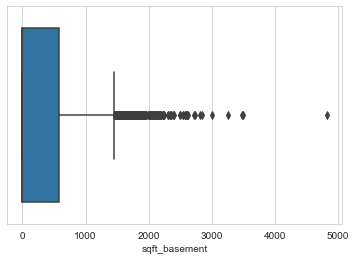

In [238]:
sns.boxplot(x=dfm2out['sqft_basement'])

In [239]:
# defining the q3 and q1
q3 = dfm2['sqft_basement'].quantile(.75)
q1 = dfm2['sqft_basement'].quantile(.25)

# calculating the interquartile range
iqr = q3 - q1

# calculating the median
median = dfm2['sqft_basement'].median()

# defining the upper and lower limit of the data (1.5*IQR)
outlier_limit_upper = median + 1.5*iqr
outlier_limit_lower = median - 1.5*iqr

# return only those rows between upper and lower outliers
dfm2out = dfm2[(dfm2['sqft_basement'] > outlier_limit_lower) & (dfm2['sqft_basement'] < outlier_limit_upper)] 

dfm2out

,bedrooms,bathrooms,floors,grade,sqft_above,sqft_basement,sqft_living15,price
0,3,1.00,1.0,7,1180,0,1340,221900
1,3,2.25,2.0,7,2170,400,1690,538000
2,2,1.00,1.0,6,770,0,2720,180000
4,3,2.00,1.0,8,1680,0,1800,510000
6,3,2.25,2.0,7,1715,0,2238,257500
...,...,...,...,...,...,...,...,...
21592,3,2.50,3.0,8,1530,0,1530,360000
21593,4,2.50,2.0,8,2310,0,1830,400000
21594,2,0.75,2.0,7,1020,0,1020,402101
21595,3,2.50,2.0,8,1600,0,1410,400000


<AxesSubplot:xlabel='sqft_basement'>

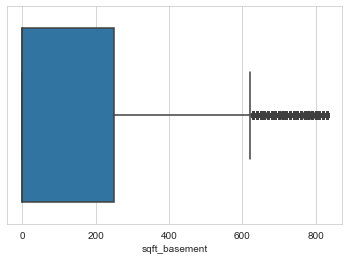

In [240]:
sns.boxplot(x=dfm2out['sqft_basement'])

In [241]:
df

,property_id,new_date,date,bedrooms,bathrooms,floors,waterfront,condition,grade,sqft_above,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price,year_date,age_of_house,age_of_renovation
0,7129300520,2014-10,2014-10-13,3,1.00,1.0,0,3,7,1180,...,0,98178,47.5112,-122.257,1340,5650,221900,2014,59,0
1,6414100192,2014-12,2014-12-09,3,2.25,2.0,0,3,7,2170,...,1991,98125,47.7210,-122.319,1690,7639,538000,2014,63,23
2,5631500400,2015-02,2015-02-25,2,1.00,1.0,0,3,6,770,...,0,98028,47.7379,-122.233,2720,8062,180000,2015,82,0
3,2487200875,2014-12,2014-12-09,4,3.00,1.0,0,5,7,1050,...,0,98136,47.5208,-122.393,1360,5000,604000,2014,49,0
4,1954400510,2015-02,2015-02-18,3,2.00,1.0,0,3,8,1680,...,0,98074,47.6168,-122.045,1800,7503,510000,2015,28,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,2014-05,2014-05-21,3,2.50,3.0,0,3,8,1530,...,0,98103,47.6993,-122.346,1530,1509,360000,2014,5,0
21593,6600060120,2015-02,2015-02-23,4,2.50,2.0,0,3,8,2310,...,0,98146,47.5107,-122.362,1830,7200,400000,2015,1,0
21594,1523300141,2014-06,2014-06-23,2,0.75,2.0,0,3,7,1020,...,0,98144,47.5944,-122.299,1020,2007,402101,2014,5,0
21595,291310100,2015-01,2015-01-16,3,2.50,2.0,0,3,8,1600,...,0,98027,47.5345,-122.069,1410,1287,400000,2015,11,0


In [242]:
# show new df data without outliers
dfm2out

,bedrooms,bathrooms,floors,grade,sqft_above,sqft_basement,sqft_living15,price
0,3,1.00,1.0,7,1180,0,1340,221900
1,3,2.25,2.0,7,2170,400,1690,538000
2,2,1.00,1.0,6,770,0,2720,180000
4,3,2.00,1.0,8,1680,0,1800,510000
6,3,2.25,2.0,7,1715,0,2238,257500
...,...,...,...,...,...,...,...,...
21592,3,2.50,3.0,8,1530,0,1530,360000
21593,4,2.50,2.0,8,2310,0,1830,400000
21594,2,0.75,2.0,7,1020,0,1020,402101
21595,3,2.50,2.0,8,1600,0,1410,400000


In [243]:
# calculate the percentage of data dropped / conserved
def percentage(part, whole):
  return 100 * float(part)/float(whole)

print(round(percentage(18479, 21597),4))

85.5628


<code style="background:black">SOME EDA AND CLEANING NOTES - ROUND 4</code>

- After cleaning outliers we have now 18479 rows out of 21597 original rows (we conserve the 85.5628% of rows)
- 3118 rows have been droped (14.4372%)
- We have 12 columns out of 22 original columns. 

# 8. Modeling Round 2

Removing some of the columns led to lower accuracy by about 0.15 in linear regression and more in other models. Further nuancing could be done here to find the exact ones, but time is an issue. The GradientBoostingRegressor and RandomForestRegressor were the only ones above 0.5

In [244]:
dfm2out

,bedrooms,bathrooms,floors,grade,sqft_above,sqft_basement,sqft_living15,price
0,3,1.00,1.0,7,1180,0,1340,221900
1,3,2.25,2.0,7,2170,400,1690,538000
2,2,1.00,1.0,6,770,0,2720,180000
4,3,2.00,1.0,8,1680,0,1800,510000
6,3,2.25,2.0,7,1715,0,2238,257500
...,...,...,...,...,...,...,...,...
21592,3,2.50,3.0,8,1530,0,1530,360000
21593,4,2.50,2.0,8,2310,0,1830,400000
21594,2,0.75,2.0,7,1020,0,1020,402101
21595,3,2.50,2.0,8,1600,0,1410,400000


In [245]:
X=dfm2out.drop('price', axis=1)
y=dfm2out.price

In [246]:
X.head()

,bedrooms,bathrooms,floors,grade,sqft_above,sqft_basement,sqft_living15
0,3,1.00,1.0,7,1180,0,1340
1,3,2.25,2.0,7,2170,400,1690
2,2,1.00,1.0,6,770,0,2720
4,3,2.00,1.0,8,1680,0,1800
6,3,2.25,2.0,7,1715,0,2238


In [247]:
y.head()

0    221900
1    538000
2    180000
4    510000
6    257500
Name: price, dtype: int64

In [248]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=.25, random_state = 42)

In [249]:
import warnings
warnings.simplefilter('ignore')

import statsmodels.api as sm
from statsmodels.formula.api import ols #print OLS Regression Results

X_train_ols=sm.add_constant(X_train)
model=sm.OLS(y_train,X_train_ols).fit() 

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.519
Model:                            OLS   Adj. R-squared:                  0.519
Method:                 Least Squares   F-statistic:                     2135.
Date:                Fri, 19 Nov 2021   Prob (F-statistic):               0.00
Time:                        01:56:00   Log-Likelihood:            -1.8943e+05
No. Observations:               13859   AIC:                         3.789e+05
Df Residuals:                   13851   BIC:                         3.789e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -4.384e+05   1.64e+04    -26.738

In [250]:
dfm2out.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 18479 entries, 0 to 21596
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       18479 non-null  int64  
 1   bathrooms      18479 non-null  float64
 2   floors         18479 non-null  float64
 3   grade          18479 non-null  int64  
 4   sqft_above     18479 non-null  int64  
 5   sqft_basement  18479 non-null  int64  
 6   sqft_living15  18479 non-null  int64  
 7   price          18479 non-null  int64  
dtypes: float64(2), int64(6)
memory usage: 1.3 MB


In [251]:
linreg=LinearRegression()    # model
linreg.fit(X_train, y_train)   # model train
y_pred_linreg=linreg.predict(X_test)

## 8.1 Models - round 2

build the same models as before

### 8.1.1 Linear Regression

In [252]:
# create a linear regression variable
lm = LinearRegression()

In [253]:
#train the model
model = lm.fit(X_train,y_train)

In [254]:
lm2 = lm.score(X_test,y_test)
lm2

0.5108913073698416

In [255]:
#Fit over our train data and predict against X test features
y_pred= lm.predict(X_test)

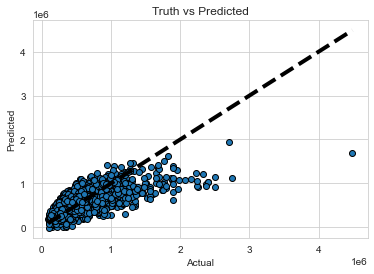

In [256]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "k--", lw=4)
ax.set_xlabel("Actual")
ax.set_ylabel("Predicted")
ax.set_title("Truth vs Predicted")
# this show function will display the plotting
plt.show()

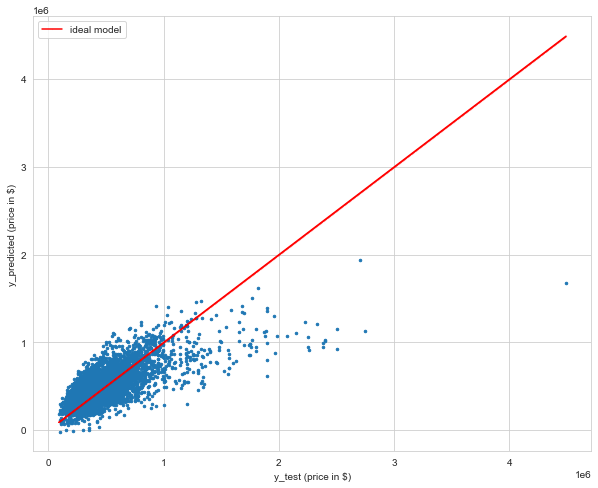

In [257]:
# generating value pairs for an ideal model which predicts the exact same y-value for a given test-y-value
line_x = line_y = np.linspace(min(y_test), max(y_test), num=len(y_test))
fig, ax = plt.subplots(figsize=(10,8))
plt.plot(y_test, y_pred, ms=5, marker=".", ls='')
# plot the ideal model together with our dots
plt.plot(line_x, line_y, ms=0.1, marker=".", ls='-', c='r', label='ideal model')
# show legend
plt.legend();
plt.xlabel('y_test (price in $)');
plt.ylabel('y_predicted (price in $)');

### R2

In [258]:
linreg=LinearRegression()    # model
linreg.fit(X_train, y_train)   # model train
y_pred_linreg=linreg.predict(X_test)

In [259]:
print ('train R2: {}, test R2: {}'.format(linreg.score(X_train, y_train),
                                            linreg.score(X_test, y_test)))

train R2: 0.5190193362602253, test R2: 0.5108913073698416


In [260]:
print('R2: ', r2_score(y_test, y_pred))

R2:  0.5108913073698416


### MSE mean_squared_error 


In [261]:
train_mse=mean_squared_error(linreg.predict(X_train), y_train)
test_mse=mean_squared_error(linreg.predict(X_test), y_test)

print ('train MSE: {}, test MSE: {}'.format(train_mse, test_mse))

train MSE: 43621672093.233154, test MSE: 40207406867.24812


In [262]:
print('MSE:', mean_squared_error(y_test, y_pred))

MSE: 40207406867.24812


### Root Mean Square Error (RMSE)

In [263]:
print('RMSE: ', math.sqrt(mean_squared_error(y_test, y_pred)))

RMSE:  200517.84675496625


### Mean Absolute Error (MAE)

In [264]:
print('MAE: ', mae(y_test, y_pred))

MAE:  138385.71274901653


### 8.1.2 Linear Models Automation (LinReg, Lasso, Ridge and ElasticNet()

In [265]:
# print in one command Linear Regression, Lasso, Ridge and ElasticNet
def models_automation(models, X_train, y_train):
    for model in models:
        model.fit(X_train, y_train)
        print(f"{model.__class__.__name__}: Train: {round(model.score(X_train, y_train),4)}, Test: {round(model.score(X_test, y_test),4)}")

linear_models = [LinearRegression(), Lasso(), Ridge(), ElasticNet()]
models_automation(linear_models, X_train, y_train)

LinearRegression: Train: 0.519, Test: 0.5109
Lasso: Train: 0.519, Test: 0.5109
Ridge: Train: 0.519, Test: 0.5109
ElasticNet: Train: 0.5041, Test: 0.4928


In [266]:
ridge2 = Ridge()
ridge2.fit(X_train, y_train)
ridge2 = ridge2.score(X_train, y_train)
ridge2

0.5190193346304635

In [267]:
elasticnet2 = ElasticNet()
elasticnet2.fit(X_train, y_train)
elasticnet2 = elasticnet2.score(X_train, y_train)
elasticnet2

0.5040705281232895

In [268]:
lasso2 = Lasso()
lasso2.fit(X_train, y_train)
lasso2 = lasso2.score(X_train, y_train)
lasso2

0.5190193361265578

### 8.1.3 Lasso

- a method use to fit a regression model when multicollinearity


In [269]:
model = Lasso().fit(X, y) 
print(model)
score = model.score(X, y)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test,y_pred)
print("Alpha:{0:.2f}, R2:{1:.2f}, MSE:{2:.2f}, RMSE:{3:.2f}"
    .format(model.alpha, score, mse, np.sqrt(mse)))

Lasso()
Alpha:1.00, R2:0.52, MSE:40027964896.52, RMSE:200069.90


In [270]:
alphas = [0.1,0.3, 0.5, 0.8, 1]
lassocv = LassoCV(alphas=alphas, cv=5).fit(X,y)
print(lassocv)
score = lassocv.score(X,y)
y_pred = lassocv.predict(X_test)
mse = mean_squared_error(y_test,y_pred)
print("Alpha:{0:.2f}, R2:{1:.3f}, MSE:{2:.2f}, RMSE:{3:.2f}"
    .format(lassocv.alpha_, score, mse, np.sqrt(mse)))

LassoCV(alphas=[0.1, 0.3, 0.5, 0.8, 1], cv=5)
Alpha:0.10, R2:0.517, MSE:40027970212.70, RMSE:200069.91


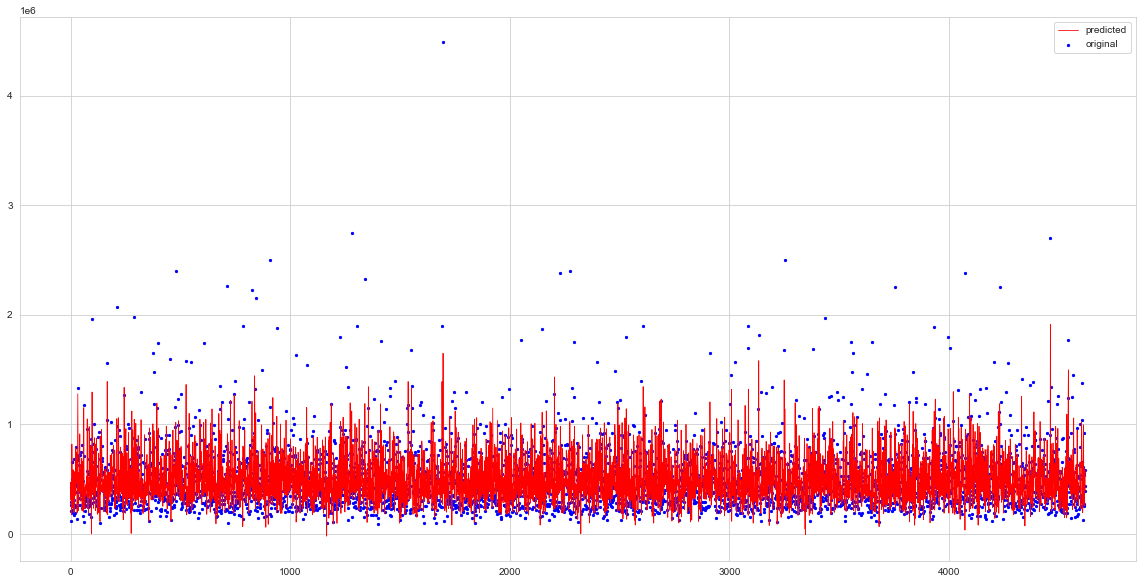

In [271]:
x_ax = range(len(X_test))
plt.subplots(figsize=(20, 10))
plt.scatter(x_ax, y_test, s=5, color="blue", label="original")
plt.plot(x_ax, y_pred, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show() 

### 8.1.4 SVR Support Vector Regression
- supports linear and non-linear regression
- to fit as many instances as possible between the lines while limiting the margin violations
- SVR parameter is Kernel type. It can be #linear,polynomial or gaussian SVR. 

In [272]:
# SVR
svr = [SVR()]
models_automation(svr, X_train, y_train)

SVR: Train: -0.0491, Test: -0.043


In [273]:
svr2 = SVR()
svr2.fit(X_train, y_train)
svr2 = svr2.score(X_train, y_train)
svr2

-0.049059582985751415

### 8.1.5 KNN

- A non-parametric algorithm that can be used for both classification and regression problems.
- The number of neighbors to include in the calculation (i.e. the size of k) is in practice determined by trial, comparing prediction errors for different values of k. (extracted from pdf notes)

In [274]:
# KNN
knn = [KNeighborsRegressor()]
models_automation(knn, X_train, y_train)

KNeighborsRegressor: Train: 0.6297, Test: 0.4115


In [275]:
knn2 = KNeighborsRegressor()
knn2.fit(X_train, y_train)
knn2 = knn2.score(X_train, y_train)
knn2

0.6296846361622602

- **Cross validation** was used for finding the optimal hyperparamaters, such as the ’k’ for k-NN.

In [276]:
#define cross-validation method to evaluate model
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

### 8.1.6 Decision trees - Regressor

In [277]:
# Decision tree regressor
dtr = [DecisionTreeRegressor()]
models_automation(dtr, X_train, y_train)

DecisionTreeRegressor: Train: 0.9965, Test: 0.1841


In [278]:
dtr2 = DecisionTreeRegressor()
dtr2.fit(X_train, y_train)
dtr2 = dtr2.score(X_train, y_train)
dtr2

0.9964567043894382

### 8.1.7 Decision trees - Random Forest
- constructed by using a collection of decision trees based on the training data. 
- Instead of taking the target value from a single tree, the Random forest algorithm makes a prediction on the **average prediction of a collection of trees**.
- The decision trees themselves are constructed by **fitting to randomly drawn groups** of rows and columns in the training data (bagging method)
- **'n_estimators'**: hyperparameter of the algorithm - the number of trees in the RF. Depending on the number, the computation time varies
- **'criterion'**: determines what error metric to use dor meaduring the quality of splits in the trees in the Random forest. The value can be either mean squared error or mean absolute error. 
- **'max_features'**: controls the number of features to consider when building the trees.

(extracted from pdf notes)

In [279]:
# RandomForestRegressor
rfr = [RandomForestRegressor()]
models_automation(rfr, X_train, y_train)

RandomForestRegressor: Train: 0.9398, Test: 0.5419


In [280]:
rfr2 = RandomForestRegressor()
rfr2.fit(X_train, y_train)
rfr2 = rfr2.score(X_train, y_train)
rfr2

0.9394119691421332

### 8.1.8 Gradient Boosting Regressor

In [281]:
# GradientBoostingRegressor
gbr = [GradientBoostingRegressor()]
models_automation(gbr, X_train, y_train)

GradientBoostingRegressor: Train: 0.6566, Test: 0.5774


In [282]:
gbr = ensemble.GradientBoostingRegressor(n_estimators = 400, max_depth = 5, min_samples_split = 2,
          learning_rate = 0.1, loss = 'ls')

In [283]:
gbr.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=5, n_estimators=400)

In [284]:
gbr2 = gbr.score(X_test,y_test)
gbr2

0.5592154958835815

----

# 9. Round 3

- Normalization: values are rescaled so that they end up ranging between 0 and 1.
- Standardization: values are centered around the mean with a unit standard deviation.

## 9.1 Normalizing and Scaling data

In [285]:
# import numpy as np
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler

Standardise all numeric features

In [286]:
num = dfm2out._get_numeric_data()
X_num = num.drop(columns=['price'])

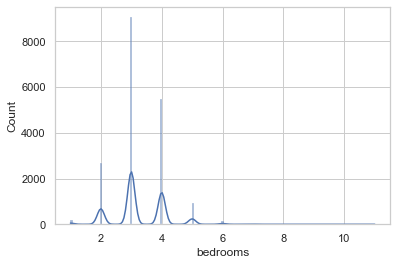

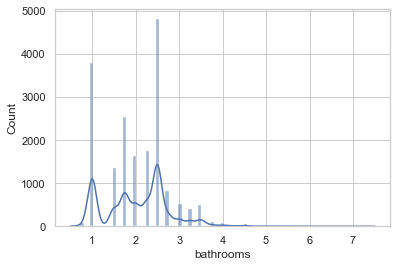

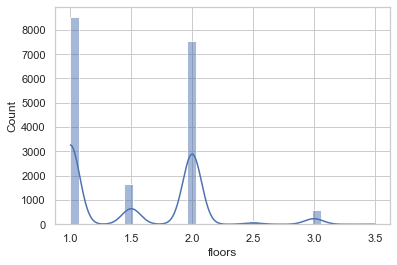

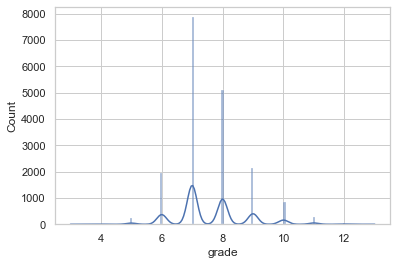

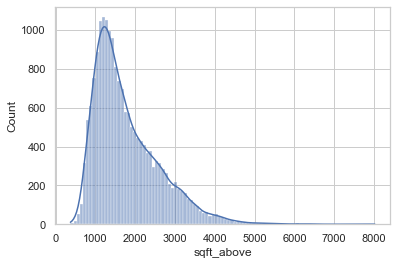

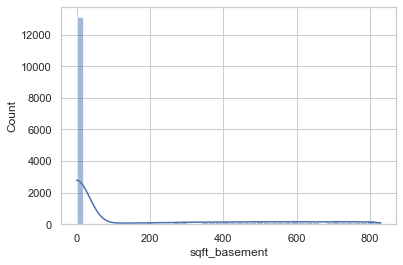

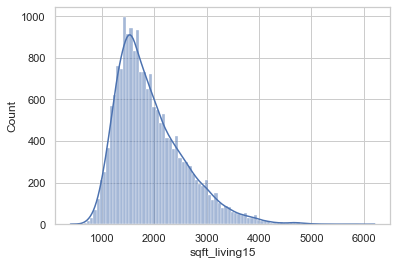

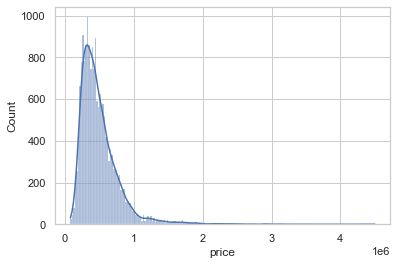

In [287]:
#histogram for every numerical column
for i, col in enumerate(num.columns):
    plt.figure(i)
    sns.set_theme(style="whitegrid")
    sns.histplot(data=num, x=col, kde=True)

In [288]:
# rescaling using Standard Scaler
from sklearn.preprocessing import StandardScaler
transformer = StandardScaler().fit(X_num)
X_stan = transformer.transform(X_num)
print(X_stan.shape)

(18479, 7)


In [289]:
X_stan

array([[-0.30741528, -1.41201116, -0.97117853, ..., -0.73162156,
        -0.57564869, -0.90021189],
       [-0.30741528,  0.28975855,  0.86064837, ...,  0.47068295,
         1.00669793, -0.36597169],
       [-1.49386621, -1.41201116, -0.97117853, ..., -1.22954565,
        -0.57564869,  1.20622088],
       ...,
       [-1.49386621, -1.75236511,  0.86064837, ..., -0.9259334 ,
        -0.57564869, -1.38866006],
       [-0.30741528,  0.63011249,  0.86064837, ..., -0.22155298,
        -0.57564869, -0.79336385],
       [-1.49386621, -1.75236511,  0.86064837, ..., -0.9259334 ,
        -0.57564869, -1.38866006]])

Normalize all categorical features

In [290]:
#store categorical features in a new X_cat
X_cat = dfm2out.select_dtypes(include = np.object)

In [291]:
from sklearn.preprocessing import OneHotEncoder
X_enc = OneHotEncoder(handle_unknown='error', drop='first').fit(X_cat)
X_enc = X_enc.transform(X_cat).toarray()
X_enc

array([], shape=(18479, 0), dtype=float64)

In [292]:
X_enc.shape

(18479, 0)

In [293]:
X_num.shape

(18479, 7)

In [294]:
y=dfm2out.price

In [295]:
y.shape

(18479,)

## 9.2 Train

In [296]:
# Concatenate both standardized and encoded data
X = np.concatenate((X_stan, X_enc), axis= 1)

In [297]:
# train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)

In [298]:
import warnings
warnings.simplefilter('ignore')

import statsmodels.api as sm
from statsmodels.formula.api import ols

X_train_wi=sm.add_constant(X_train)
model=sm.OLS(y_train,X_train_wi).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.515
Model:                            OLS   Adj. R-squared:                  0.515
Method:                 Least Squares   F-statistic:                     1963.
Date:                Fri, 19 Nov 2021   Prob (F-statistic):               0.00
Time:                        01:59:13   Log-Likelihood:            -1.7687e+05
No. Observations:               12935   AIC:                         3.538e+05
Df Residuals:                   12927   BIC:                         3.538e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.996e+05   1846.955    270.488      0.0

## 9.3 Models - round 3

### 9.3.1 LinearRegression

In [299]:
lm = LinearRegression()
model = lm.fit(X_train,y_train)
Y_pred  = lm.predict(X_test)

build the same models as before

In [300]:
# create a linear regression variable
lm = LinearRegression()

In [301]:
#train the model
model = lm.fit(X_train,y_train)

In [302]:
lm3 = lm.score(X_test,y_test)
lm3

0.5227383507028822

In [303]:
#Fit over our train data and predict against X test features
y_pred= lm.predict(X_test)

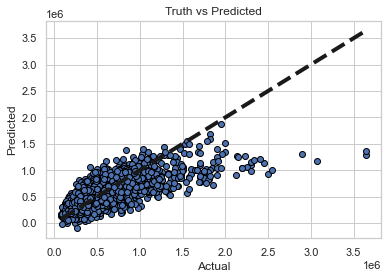

In [304]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "k--", lw=4)
ax.set_xlabel("Actual")
ax.set_ylabel("Predicted")
ax.set_title("Truth vs Predicted")
# this show function will display the plotting
plt.show()

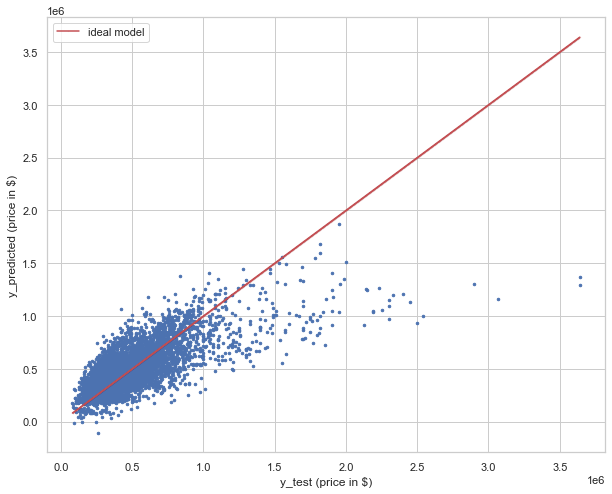

In [305]:
# generating value pairs for an ideal model which predicts the exact same y-value for a given test-y-value
line_x = line_y = np.linspace(min(y_test), max(y_test), num=len(y_test))
fig, ax = plt.subplots(figsize=(10,8))
plt.plot(y_test, y_pred, ms=5, marker=".", ls='')
# plot the ideal model together with our dots
plt.plot(line_x, line_y, ms=0.1, marker=".", ls='-', c='r', label='ideal model')
# show legend
plt.legend();
plt.xlabel('y_test (price in $)');
plt.ylabel('y_predicted (price in $)');

### R2

In [306]:
print ('train R2: {}, test R2: {}'.format(linreg.score(X_train, y_train),
                                            linreg.score(X_test, y_test)))

train R2: -9.484831723864602, test R2: -10.320291301949448


In [307]:
print('R2: ', r2_score(y_test, y_pred))

R2:  0.5227383507028822


### MSE mean_squared_error 

In [308]:
train_mse=mean_squared_error(linreg.predict(X_train), y_train)
test_mse=mean_squared_error(linreg.predict(X_test), y_test)

print ('train MSE: {}, test MSE: {}'.format(train_mse, test_mse))

train MSE: 953646741387.0741, test MSE: 940027195560.6987


In [309]:
print('MSE:', mean_squared_error(y_test, y_pred))

MSE: 39631394437.71947


### Root Mean Square Error (RMSE)

In [310]:
print('RMSE: ', math.sqrt(mean_squared_error(y_test, y_pred)))

RMSE:  199076.35328616874


### Mean Absolute Error (MAE)

In [311]:
print('MAE: ', mae(y_test, y_pred))

MAE:  137635.54535875667


### 9.3.2 Linear Models Automation (LinReg, Lasso, Ridge and ElasticNet()

In [312]:
linreg=LinearRegression()    # model
linreg.fit(X_train, y_train)   # model train
y_pred_linreg=linreg.predict(X_test)

In [313]:
# print in one command Linear Regression, Lasso, Ridge and ElasticNet
def models_automation(models, X_train, y_train):
    for model in models:
        model.fit(X_train, y_train)
        print(f"{model.__class__.__name__}: Train: {round(model.score(X_train, y_train),4)}, Test: {round(model.score(X_test, y_test),4)}")

linear_models = [LinearRegression(), Lasso(), Ridge(), ElasticNet()]
models_automation(linear_models, X_train, y_train)

LinearRegression: Train: 0.5153, Test: 0.5227
Lasso: Train: 0.5153, Test: 0.5227
Ridge: Train: 0.5153, Test: 0.5227
ElasticNet: Train: 0.4788, Test: 0.4936


In [314]:
lasso3 = Lasso()
lasso3.fit(X_train, y_train)
lasso3 = lasso3.score(X_train, y_train)
lasso3

0.5152644273479059

In [315]:
ridge3 = Ridge()
ridge3.fit(X_train, y_train)
ridge3 = ridge3.score(X_train, y_train)
ridge3

0.5152644192640078

In [316]:
elasticnet3 = ElasticNet()
elasticnet3.fit(X_train, y_train)
elasticnet3 = elasticnet3.score(X_train, y_train)
elasticnet3

0.4788457896601569

### 9.3.3 Lasso

- a method use to fit a regression model when multicollinearity


In [317]:
model = Lasso().fit(X, y) 
print(model)
score = model.score(X, y)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test,y_pred)
print("Alpha:{0:.2f}, R2:{1:.2f}, MSE:{2:.2f}, RMSE:{3:.2f}"
    .format(model.alpha, score, mse, np.sqrt(mse)))

Lasso()
Alpha:1.00, R2:0.52, MSE:39578634905.69, RMSE:198943.80


In [318]:
alphas = [0.1,0.3, 0.5, 0.8, 1]
lassocv = LassoCV(alphas=alphas, cv=5).fit(X,y)
print(lassocv)
score = lassocv.score(X,y)
y_pred = lassocv.predict(X_test)
mse = mean_squared_error(y_test,y_pred)
print("Alpha:{0:.2f}, R2:{1:.3f}, MSE:{2:.2f}, RMSE:{3:.2f}"
    .format(lassocv.alpha_, score, mse, np.sqrt(mse)))

LassoCV(alphas=[0.1, 0.3, 0.5, 0.8, 1], cv=5)
Alpha:0.10, R2:0.517, MSE:39578665124.04, RMSE:198943.87


### 9.3.4 SVR Support Vector Regression
- supports linear and non-linear regression
- to fit as many instances as possible between the lines while limiting the margin violations
- SVR parameter is Kernel type. It can be #linear,polynomial or gaussian SVR.

In [319]:
# SVR
svr = [SVR()]
models_automation(svr, X_train, y_train)

SVR: Train: -0.0498, Test: -0.0522


In [320]:
svr3 = SVR()
svr3.fit(X_train, y_train)
svr3 = svr3.score(X_train, y_train)
svr3

-0.04982570588047852

### 9.3.5 KNN

- A non-parametric algorithm that can be used for both classification and regression problems.
- The number of neighbors to include in the calculation (i.e. the size of k) is in practice determined by trial, comparing prediction errors for different values of k. (extracted from pdf notes)

In [321]:
# KNN
knn = [KNeighborsRegressor()]
models_automation(knn, X_train, y_train)

KNeighborsRegressor: Train: 0.7017, Test: 0.5481


In [322]:
knn3 = KNeighborsRegressor()
knn3.fit(X_train, y_train)
knn3 = knn3.score(X_train, y_train)
knn3

0.701737110069764

### 9.3.6 Decision trees - Regressor

In [323]:
# Decision tree regressor
dtr = [DecisionTreeRegressor()]
models_automation(dtr, X_train, y_train)

DecisionTreeRegressor: Train: 0.9967, Test: 0.1814


In [324]:
dtr3 = DecisionTreeRegressor()
dtr3.fit(X_train, y_train)
dtr3 = dtr3.score(X_train, y_train)
dtr3

0.9967363490562288

### 9.3.7 Decision trees - Random Forest
- constructed by using a collection of decision trees based on the training data. 
- Instead of taking the target value from a single tree, the Random forest algorithm makes a prediction on the **average prediction of a collection of trees**.
- The decision trees themselves are constructed by **fitting to randomly drawn groups** of rows and columns in the training data (bagging method)
- **'n_estimators'**: hyperparameter of the algorithm - the number of trees in the RF. Depending on the number, the computation time varies
- **'criterion'**: determines what error metric to use dor meaduring the quality of splits in the trees in the Random forest. The value can be either mean squared error or mean absolute error. 
- **'max_features'**: controls the number of features to consider when building the trees.

(extracted from pdf notes)

In [325]:
# RandomForestRegressor
rfr = [RandomForestRegressor()]
models_automation(rfr, X_train, y_train)

RandomForestRegressor: Train: 0.9396, Test: 0.5447


In [326]:
rfr3 = RandomForestRegressor()
rfr3.fit(X_train, y_train)
rfr3 = rfr3.score(X_train, y_train)
rfr3

0.9386018217014043

In [327]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
X, y = make_regression(n_features=4, n_informative=2, 
                       random_state=0, shuffle=False)
regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(X, y)
RandomForestRegressor(...)
print(regr.predict([[0, 0, 0, 0]]))

[-8.32987858]


### 9.3.8 Gradient Boosting Regressor

In [328]:
# GradientBoostingRegressor
gbr = [GradientBoostingRegressor()]
models_automation(gbr, X_train, y_train)

GradientBoostingRegressor: Train: 0.6606, Test: 0.5854


In [329]:
gbr = ensemble.GradientBoostingRegressor(n_estimators = 400, max_depth = 5, min_samples_split = 2,
          learning_rate = 0.1, loss = 'ls')


In [330]:
gbr.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=5, n_estimators=400)

In [331]:
gbr3 = gbr.score(X_test,y_test)
gbr3

0.541304194238446

# 10. Final Round

## 10.1 different way of dealing with outliers - logarithm transformation

In [332]:
#create a new df3 to apply in this part 
dfm2out2 = dfm2
num = dfm2out2._get_numeric_data()
X_num = num.drop(columns=['price'])

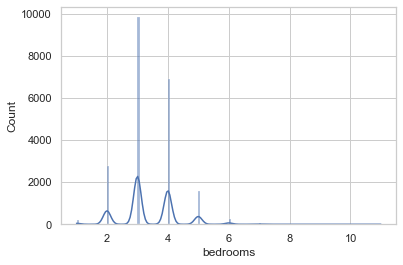

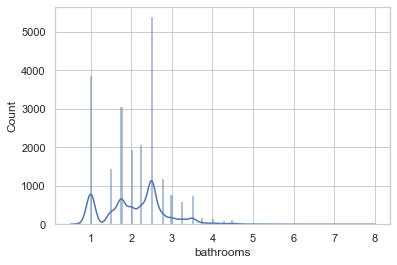

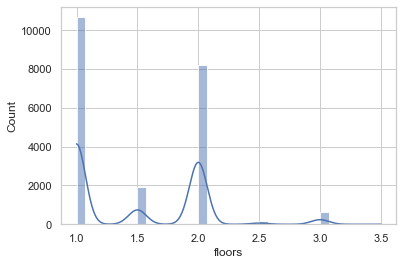

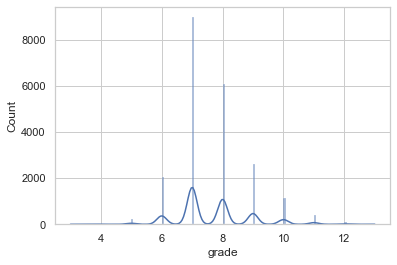

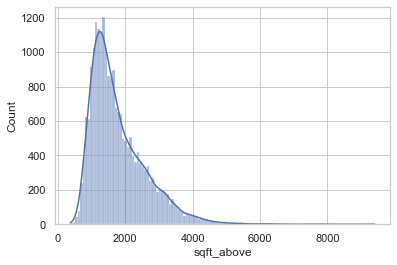

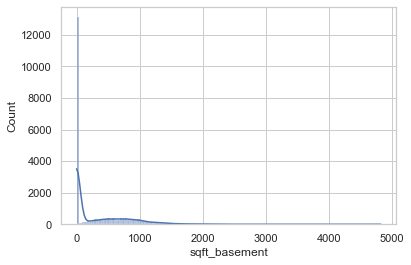

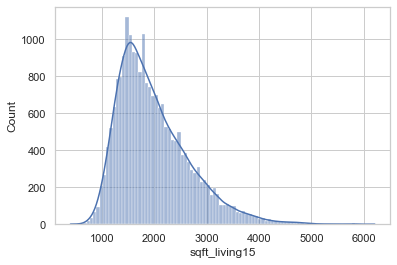

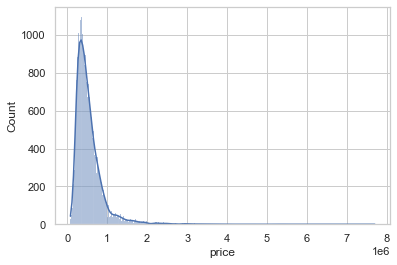

In [333]:
#histogram for every numerical column
for i, col in enumerate(num.columns):
    plt.figure(i)
    sns.set_theme(style="whitegrid")
    sns.histplot(data=num, x=col, kde=True)

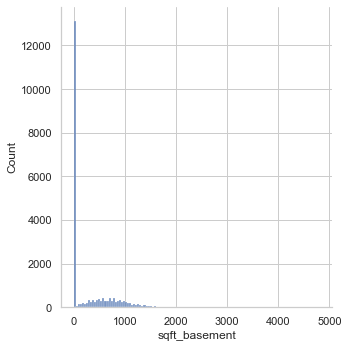

In [334]:
sns.displot(dfm2out2['sqft_basement'])

In [335]:
def log_transfom_clean_(x):
    x = np.log(x)
    if np.isfinite(x):
        return x
    else:
        return np.NAN   

In [336]:
#replace the NaN with the mean
dfm2out2['sqft_above_log'] = list(map(log_transfom_clean_, dfm2out2['sqft_above']))
dfm2out2['sqft_above_log'] = dfm2out2['sqft_above_log'].fillna(np.mean(dfm2out2['sqft_above_log']))

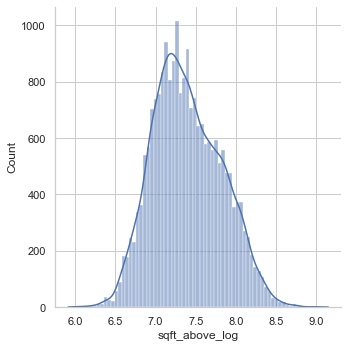

In [337]:
sns.displot(dfm2out2['sqft_above_log'], kde=True);
# after replace the NaNs

In [338]:
dfm2out2['bedrooms_log'] = list(map(log_transfom_clean_, dfm2out2['bedrooms']))
dfm2out2['bedrooms_log'] = dfm2out2['bedrooms_log'].fillna(np.mean(dfm2out2['bedrooms_log']))

In [339]:
dfm2out2['bathrooms_log'] = list(map(log_transfom_clean_, dfm2out2['bathrooms']))
dfm2out2['bathrooms_log'] = dfm2out2['bathrooms_log'].fillna(np.mean(dfm2out2['bathrooms_log']))

In [340]:
dfm2out2['floors_log'] = list(map(log_transfom_clean_, dfm2out2['floors']))
dfm2out2['floors_log'] = dfm2out2['floors_log'].fillna(np.mean(dfm2out2['floors_log']))

In [341]:
dfm2out2['sqft_living15_log'] = list(map(log_transfom_clean_, dfm2out2['sqft_living15']))
dfm2out2['sqft_living15_log'] = dfm2out2['sqft_living15_log'].fillna(np.mean(dfm2out2['sqft_living15_log']))

In [342]:
dfm2out2

,bedrooms,bathrooms,floors,grade,sqft_above,sqft_basement,sqft_living15,price,sqft_above_log,bedrooms_log,bathrooms_log,floors_log,sqft_living15_log
0,3,1.00,1.0,7,1180,0,1340,221900,7.073270,1.098612,0.000000,0.000000,7.200425
1,3,2.25,2.0,7,2170,400,1690,538000,7.682482,1.098612,0.810930,0.693147,7.432484
2,2,1.00,1.0,6,770,0,2720,180000,6.646391,0.693147,0.000000,0.000000,7.908387
3,4,3.00,1.0,7,1050,910,1360,604000,6.956545,1.386294,1.098612,0.000000,7.215240
4,3,2.00,1.0,8,1680,0,1800,510000,7.426549,1.098612,0.693147,0.000000,7.495542
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,3,2.50,3.0,8,1530,0,1530,360000,7.333023,1.098612,0.916291,1.098612,7.333023
21593,4,2.50,2.0,8,2310,0,1830,400000,7.745003,1.386294,0.916291,0.693147,7.512071
21594,2,0.75,2.0,7,1020,0,1020,402101,6.927558,0.693147,-0.287682,0.693147,6.927558
21595,3,2.50,2.0,8,1600,0,1410,400000,7.377759,1.098612,0.916291,0.693147,7.251345


In [343]:
# drop old columns
dfm2out2 = dfm2out2.drop(['bedrooms'], axis=1)
dfm2out2 = dfm2out2.drop(['bathrooms'], axis =1)
dfm2out2 = dfm2out2.drop(['floors'], axis=1)
dfm2out2 = dfm2out2.drop(['sqft_above'], axis=1)
dfm2out2 = dfm2out2.drop(['sqft_basement'], axis =1)
dfm2out2 = dfm2out2.drop(['sqft_living15'], axis=1)

## 10.2 Train Test final round

In [344]:
num

,bedrooms,bathrooms,floors,grade,sqft_above,sqft_basement,sqft_living15,price
0,3,1.00,1.0,7,1180,0,1340,221900
1,3,2.25,2.0,7,2170,400,1690,538000
2,2,1.00,1.0,6,770,0,2720,180000
3,4,3.00,1.0,7,1050,910,1360,604000
4,3,2.00,1.0,8,1680,0,1800,510000
...,...,...,...,...,...,...,...,...
21592,3,2.50,3.0,8,1530,0,1530,360000
21593,4,2.50,2.0,8,2310,0,1830,400000
21594,2,0.75,2.0,7,1020,0,1020,402101
21595,3,2.50,2.0,8,1600,0,1410,400000


In [345]:
# define the target variable ( y: price) and the features (x)
X=num.drop('price', axis=1)
y=df.price

In [346]:
#check the shapes of both X, Y 
print('X shape:', X.shape)
print('Y shape:', y.shape)

X shape: (21597, 7)
Y shape: (21597,)


In [347]:
y.head()

0    221900
1    538000
2    180000
3    604000
4    510000
Name: price, dtype: int64

In [348]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=.25, random_state = 40) # (60% train, 40% test)

In [349]:
import warnings
warnings.simplefilter('ignore')

import statsmodels.api as sm
from statsmodels.formula.api import ols #print OLS Regression Results

X_train_ols=sm.add_constant(X_train)
model=sm.OLS(y_train,X_train_ols).fit() 

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.549
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     2812.
Date:                Fri, 19 Nov 2021   Prob (F-statistic):               0.00
Time:                        02:02:15   Log-Likelihood:            -2.2421e+05
No. Observations:               16197   AIC:                         4.484e+05
Df Residuals:                   16189   BIC:                         4.485e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -5.114e+05   1.79e+04    -28.631

## 10.3 Model Final Round 

### 10.3.1 Linear Regression

In [350]:
# create a linear regression variable
lm = LinearRegression()

In [351]:
#train the model
model = lm.fit(X_train,y_train)

In [352]:
lm4 = lm.score(X_test,y_test)
lm4

0.561445195888486

In [353]:
#Fit over our train data and predict against X test features
y_pred= lm.predict(X_test)

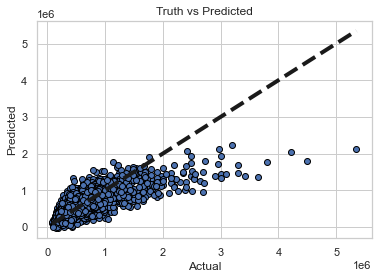

In [354]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "k--", lw=4)
ax.set_xlabel("Actual")
ax.set_ylabel("Predicted")
ax.set_title("Truth vs Predicted")
# this show function will display the plotting
plt.show()

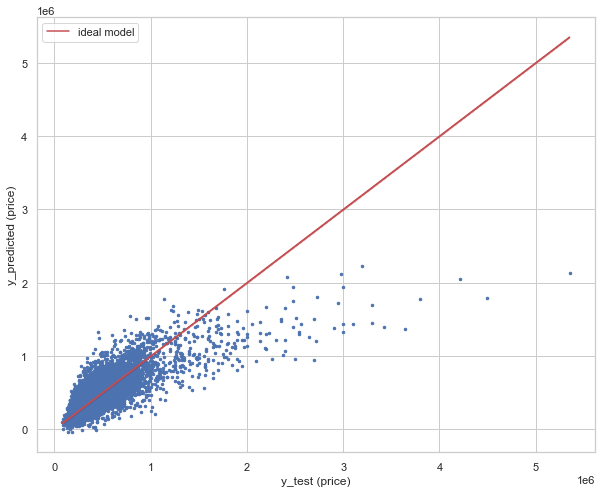

In [355]:
# generate value pairs for an ideal model which predicts the exact same y-value for a given test-y-value
line_x = line_y = np.linspace(min(y_test), max(y_test), num=len(y_test))
fig, ax = plt.subplots(figsize=(10,8))
plt.plot(y_test, y_pred, ms=5, marker=".", ls='')
# plot the ideal model together with our dots
plt.plot(line_x, line_y, ms=0.1, marker=".", ls='-', c='r', label='ideal model')
# show legend
plt.legend();
plt.xlabel('y_test (price)');
plt.ylabel('y_predicted (price)');

In [356]:
#linear regression

lm = LinearRegression()
model = lm.fit(X_train,y_train)
y_pred  = lm.predict(X_test)

In [357]:
print('R2: ', r2_score(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE: ', math.sqrt(mean_squared_error(y_test, y_pred)))
print('MAE: ', mae(y_test, y_pred))

R2:  0.561445195888486
MSE: 56594325609.74548
RMSE:  237895.61914786385
MAE:  159013.90206786155


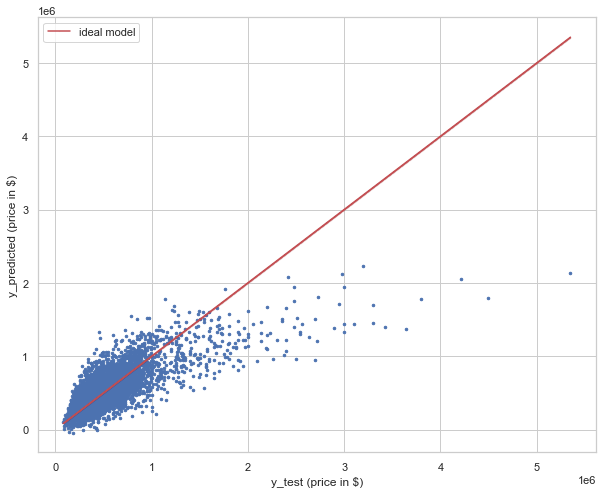

In [358]:
# plot the linear regression model 
# generating value pairs for an ideal model which predicts the exact same y-value for a given test-y-value
line_x = line_y = np.linspace(min(y_test), max(y_test), num=len(y_test))
fig, ax = plt.subplots(figsize=(10,8))
plt.plot(y_test, y_pred, ms=5, marker=".", ls='')
# plot the ideal model together with our dots
plt.plot(line_x, line_y, ms=0.1, marker=".", ls='-', c='r', label='ideal model')
# show legend
plt.legend();
plt.xlabel('y_test (price in $)');
plt.ylabel('y_predicted (price in $)');

### R2

In [359]:
linreg=LinearRegression()    # model
linreg.fit(X_train, y_train)   # model train
y_pred_linreg=linreg.predict(X_test)

In [360]:
print ('train R2: {}, test R2: {}'.format(linreg.score(X_train, y_train),
                                            linreg.score(X_test, y_test)))

train R2: 0.5486983470902702, test R2: 0.561445195888486


In [361]:
print('R2: ', r2_score(y_test, y_pred))

R2:  0.561445195888486


### MSE mean_squared_error

In [362]:
train_mse=mean_squared_error(linreg.predict(X_train), y_train)
test_mse=mean_squared_error(linreg.predict(X_test), y_test)

print ('train MSE: {}, test MSE: {}'.format(train_mse, test_mse))

train MSE: 61787742599.37419, test MSE: 56594325609.74548


In [363]:
print('MSE:', mean_squared_error(y_test, y_pred))

MSE: 56594325609.74548


### Root Mean Square Error (RMSE)

In [364]:
print('RMSE: ', math.sqrt(mean_squared_error(y_test, y_pred)))

RMSE:  237895.61914786385


### Mean Absolute Error (MAE)

In [365]:
print('MAE: ', mae(y_test, y_pred))

MAE:  159013.90206786155


### 10.3.2 Linear Models Automation (LinReg, Lasso, Ridge and ElasticNet()

In [366]:
# print in one command Linear Regression, Lasso, Ridge and ElasticNet
def models_automation(models, X_train, y_train):
    for model in models:
        model.fit(X_train, y_train)
        print(f"{model.__class__.__name__}: Train: {round(model.score(X_train, y_train),4)}, Test: {round(model.score(X_test, y_test),4)}")

linear_models = [LinearRegression(), Lasso(), Ridge(), ElasticNet()]
models_automation(linear_models, X_train, y_train)

LinearRegression: Train: 0.5487, Test: 0.5614
Lasso: Train: 0.5487, Test: 0.5614
Ridge: Train: 0.5487, Test: 0.5614
ElasticNet: Train: 0.5366, Test: 0.5499


In [367]:
lasso4 = Lasso()
lasso4.fit(X_train, y_train)
lasso4 = lasso4.score(X_train, y_train)
lasso4

0.5486983470004989

In [368]:
ridge4 = Ridge()
ridge4.fit(X_train, y_train)
ridge4 = ridge4.score(X_train, y_train)
ridge4

0.5486983462487804

In [369]:
elasticnet4 = ElasticNet()
elasticnet4.fit(X_train, y_train)
elasticnet4 = elasticnet4.score(X_train, y_train)
elasticnet4

0.5366451429032073

### 10.3.3 Lasso

- a method use to fit a regression model when multicollinearity

In [370]:
model = Lasso().fit(X, y) 
print(model)
score = model.score(X, y)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test,y_pred)
print("Alpha:{0:.2f}, R2:{1:.2f}, MSE:{2:.2f}, RMSE:{3:.2f}"
    .format(model.alpha, score, mse, np.sqrt(mse)))

Lasso()
Alpha:1.00, R2:0.55, MSE:56512284121.93, RMSE:237723.12


In [371]:
alphas = [0.1,0.3, 0.5, 0.8, 1]
lassocv = LassoCV(alphas=alphas, cv=5).fit(X,y)
print(lassocv)
score = lassocv.score(X,y)
y_pred = lassocv.predict(X_test)
mse = mean_squared_error(y_test,y_pred)
print("Alpha:{0:.2f}, R2:{1:.3f}, MSE:{2:.2f}, RMSE:{3:.2f}"
    .format(lassocv.alpha_, score, mse, np.sqrt(mse)))

LassoCV(alphas=[0.1, 0.3, 0.5, 0.8, 1], cv=5)
Alpha:0.10, R2:0.552, MSE:56512287888.08, RMSE:237723.13


### 10.3.4 SVR Support Vector Regression
- supports linear and non-linear regression
- to fit as many instances as possible between the lines while limiting the margin violations
- SVR parameter is Kernel type. It can be #linear,polynomial or gaussian SVR. 

In [372]:
# SVR
svr = [SVR()]
models_automation(svr, X_train, y_train)

SVR: Train: -0.0569, Test: -0.051


In [373]:
svr4 = SVR()
svr4.fit(X_train, y_train)
svr4 = svr4.score(X_train, y_train)
svr4

-0.05686771492635545

### 10.3.5 KNN

- A non-parametric algorithm that can be used for both classification and regression problems.
- The number of neighbors to include in the calculation (i.e. the size of k) is in practice determined by trial, comparing prediction errors for different values of k. (extracted from pdf notes)

In [374]:
# KNN
knn = [KNeighborsRegressor()]
models_automation(knn, X_train, y_train)

KNeighborsRegressor: Train: 0.661, Test: 0.5031


In [375]:
knn4 = KNeighborsRegressor()
knn4.fit(X_train, y_train)
knn4 = knn4.score(X_train, y_train)
knn4

0.6610147924538555

### 10.3.6 Decision trees - Regressor

In [376]:
# Decision tree regressor
dtr = [DecisionTreeRegressor()]
models_automation(dtr, X_train, y_train)

DecisionTreeRegressor: Train: 0.9978, Test: 0.2865


In [377]:
dtr4 = DecisionTreeRegressor()
dtr4.fit(X_train, y_train)
dtr4 = dtr4.score(X_train, y_train)
dtr4

0.997843309901727

### 10.3.7 Decision trees - Random Forest
- constructed by using a collection of decision trees based on the training data. 
- Instead of taking the target value from a single tree, the Random forest algorithm makes a prediction on the **average prediction of a collection of trees**.
- The decision trees themselves are constructed by **fitting to randomly drawn groups** of rows and columns in the training data (bagging method)
- **'n_estimators'**: hyperparameter of the algorithm - the number of trees in the RF. Depending on the number, the computation time varies
- **'criterion'**: determines what error metric to use dor meaduring the quality of splits in the trees in the Random forest. The value can be either mean squared error or mean absolute error. 
- **'max_features'**: controls the number of features to consider when building the trees.

(extracted from pdf notes)

In [378]:
# RandomForestRegressor
rfr = [RandomForestRegressor()]
models_automation(rfr, X_train, y_train)

RandomForestRegressor: Train: 0.943, Test: 0.617


In [379]:
rfr4 = RandomForestRegressor()
rfr4.fit(X_train, y_train)
rfr4 = rfr4.score(X_train, y_train)
rfr4

0.9433523497236903

### 10.3.8 Gradient Boosting Regressor

< "Boosting" in machine learning is a way of combining multiple simple models into a single composite model. This is also why boosting is known as an additive model, since simple models (also known as weak learners) are added one at a time, while keeping existing trees in the model unchanged. As we combine more and more simple models, the complete final model becomes a stronger predictor. The term "gradient" in "gradient boosting" comes from the fact that the algorithm uses gradient descent to minimize the loss.

When gradient boost is used to predict a continuous value – like age, weight, or cost – we're using gradient boost for regression. >

[definition extracted from PaperspaceBlog](https://blog.paperspace.com/implementing-gradient-boosting-regression-python/)



In [380]:
# GradientBoostingRegressor
gbr = [GradientBoostingRegressor()]
models_automation(gbr, X_train, y_train)

GradientBoostingRegressor: Train: 0.699, Test: 0.6408


In [381]:
gbr = ensemble.GradientBoostingRegressor(n_estimators = 400, max_depth = 5, min_samples_split = 2,
          learning_rate = 0.1, loss = 'ls')

In [382]:
gbr.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=5, n_estimators=400)

In [383]:
gbr4 = gbr.score(X_test,y_test)
gbr4

0.6101270614975742

### 10.3.9 GBR - LONG WAY 

Number of Estimators: It is denoted as n_estimators.
The default value of this parameter is 100.
Number of estimators is basically the number of boosting stages to be performed by the model. In other words number of estimators denotes the number of trees in the forest. More number of trees helps in learning the data better. On the other hand, more number of trees can result in higher training time. Hence we need to find the right and balanced value of n_estimators for optimal performance.

Maximum Depth: It is denoted as max_depth.
The default value of max_depth is 3 and it is an optional parameter.
The maximum depth is the depth of the decision tree estimator in the gradient boosting regressor. We need to find the optimum value of this hyperparameter for best performance. As an example the best value of this parameter may depend on the input variables.

Learning Rate: It is denoted as learning_rate.
The default value of learning_rate is 0.1 and it is an optional parameter.
The learning rate is a hyper-parameter in gradient boosting regressor algorithm that determines the step size at each iteration while moving toward a minimum of a loss function.

Criterion: It is denoted as criterion.
The default value of criterion is friedman_mse and it is an optional parameter.
criterion is used to measure the quality of a split for decision tree.
mse stands for mean squared error.

Loss: It is denoted as loss.
The default value of loss is ls and it is an optional parameter.
This  parameter indicates loss function to be optimized. There are various loss functions like ls which stands for least squares regression. Least absolute deviation abbreviated as lad is another loss function. Huber a third loss function is a combination of least squares regression and least absolute deviation.

[extracted from PaperspaceBlog](https://blog.paperspace.com/implementing-gradient-boosting-regression-python/)


In [384]:
X=dfm2out2.drop('price', axis=1)
y=dfm2out2.price

In [385]:
# split the data with 75% train and 25% test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.25)

In [386]:
# Implementing Gradient Boosting Regression in Python
model = GradientBoostingRegressor(n_estimators=100)

In [387]:
# training the model
model.fit(X_train, y_train)

GradientBoostingRegressor()

In [388]:
# to see how good the model fit the data
training_score = model.score(X_train, y_train).round(3)
test_score = model.score(X_test, y_test).round(3)
print("Training score of GradientBoosting is :", training_score)
print("The test score of GradientBoosting is :", test_score)

Training score of GradientBoosting is : 0.673
The test score of GradientBoosting is : 0.595


In [389]:
# Let us evaluation the model by finding the errors
y_pred = model.predict(X_test)

In [390]:
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print("Test Variance score: %.2f" % r2_score(y_test, y_pred))

Mean squared error: 48217092593.41
Test Variance score: 0.59


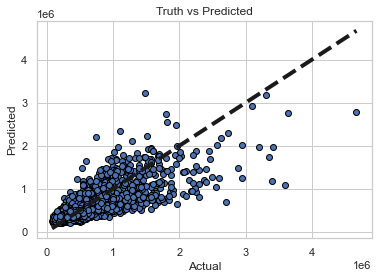

In [391]:
# So let's run the model against the test data
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "k--", lw=4)
ax.set_xlabel("Actual")
ax.set_ylabel("Predicted")
ax.set_title("Truth vs Predicted")
# this show function will display the plotting
plt.show()

----

# 11. Compare results

In [392]:
labels = ['LinearRegression','Lasso','Ridge','ElasticNet','SVR','KNN','Decision Tree Regr.','Random Forest Regr.','Gradient Boosting Regr.']
round1 = [lm1,lasso1,ridge1,elasticnet1,svr1,knn1,dtr1,rfr1,gbr1]
round2 = [lm2,lasso2,ridge2,elasticnet2,svr2,knn2,dtr2,rfr2,gbr2]
round3 = [lm3,lasso3,ridge3,elasticnet3,svr3,knn3,dtr3,rfr3,gbr3]
round4 = [lm4,lasso4,ridge4,elasticnet4,svr4,knn1,dtr4,rfr4,gbr4]

In [395]:
# Creating a DataFrame from a dictionary
results = pd.DataFrame({'Models': models, 'Round1': round1, 
                      'Round2': round2, 'Round3': round3,'Round4': round4})
print('type: '+str(type(results)), 'size: '+str(np.shape(results)), results, sep='\n')

type: <class 'pandas.core.frame.DataFrame'>
size: (9, 5)
                    Models    Round1    Round2    Round3    Round4
0         LinearRegression  0.707204  0.510891  0.522738  0.561445
1                    Lasso  0.698449  0.519019  0.515264  0.548698
2                    Ridge  0.695669  0.519019  0.515264  0.548698
3               ElasticNet  0.621983  0.504071  0.478846  0.536645
4                      SVR -0.060076 -0.049060 -0.049826 -0.056868
5                      KNN  0.671143  0.629685  0.701737  0.671143
6      Decision Tree Regr.  0.932758  0.996457  0.996736  0.997843
7      Random Forest Regr.  0.956245  0.939412  0.938602  0.943352
8  Gradient Boosting Regr.  0.902602  0.559215  0.541304  0.610127


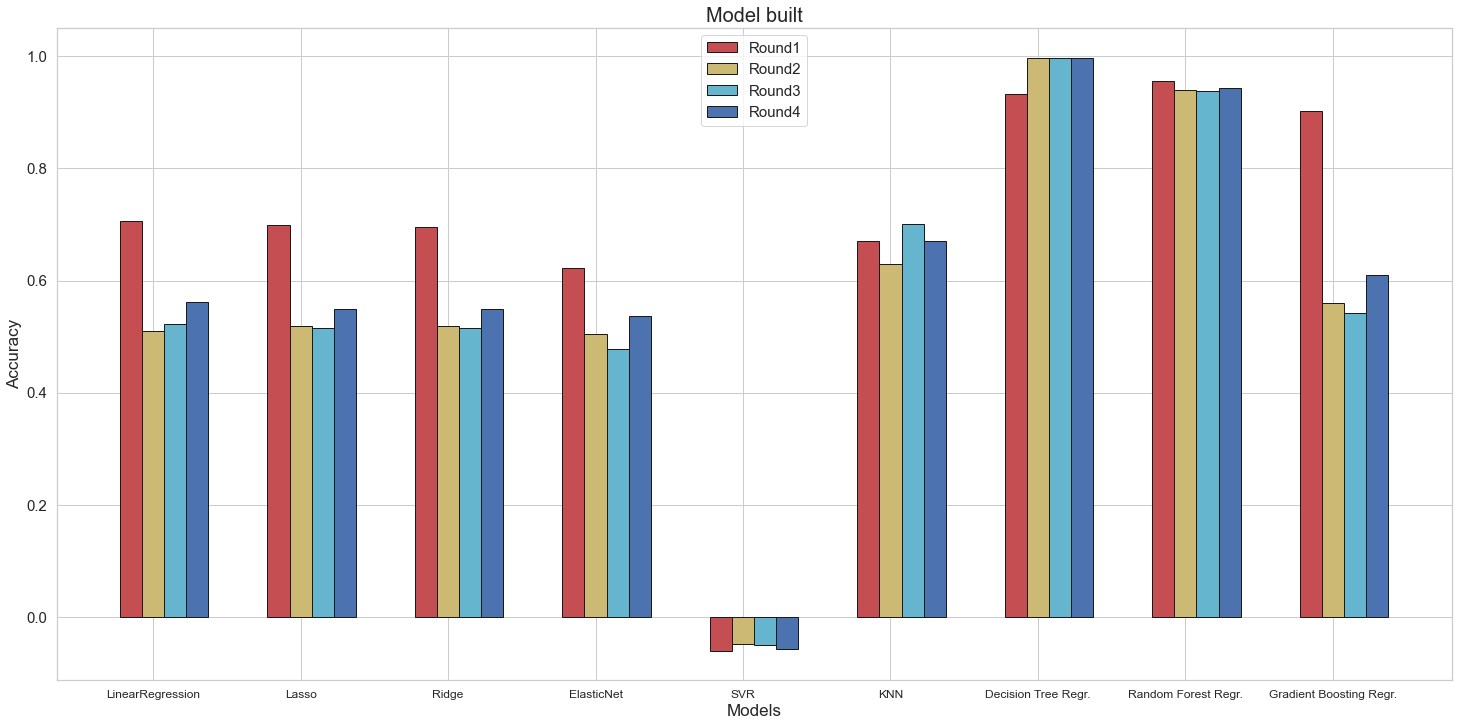

In [398]:
# Importing the required libraries
from matplotlib import pyplot as plt
import numpy as np

# Visualizing the data with multiple bar chart
plt.figure(figsize=[25, 12])

# Set the width of the bars
wd = 0.3
x_pos = np.arange(1, 2*len(labels), 2)

# Plotting the multiple bar graphs on the same figure
plt.bar(x_pos, results.Round1, color='r', width=wd, edgecolor='k',
        label='Round1')
plt.bar(x_pos+wd, results.Round2, color='y', width=wd, edgecolor='k', 
        label='Round2')
plt.bar(x_pos+(wd*2), results.Round3, color='c', width=wd, 
        edgecolor='k', label='Round3')
plt.bar(x_pos+(wd*3), results.Round4, color='b', width=wd, 
        edgecolor='k', label='Round4')

# Add xticks
plt.xticks(x_pos+wd, results.Models.values, fontsize=12)
plt.yticks(fontsize=15)
plt.title('Model built', fontsize=20)
plt.xlabel('Models', fontsize=17)
plt.ylabel('Accuracy', fontsize=17)

plt.legend(loc='upper center', fontsize=15)
plt.show()

In [399]:
results

,Models,Round1,Round2,Round3,Round4
0,LinearRegression,0.707204,0.510891,0.522738,0.561445
1,Lasso,0.698449,0.519019,0.515264,0.548698
2,Ridge,0.695669,0.519019,0.515264,0.548698
3,ElasticNet,0.621983,0.504071,0.478846,0.536645
4,SVR,-0.060076,-0.049060,-0.049826,-0.056868
5,KNN,0.671143,0.629685,0.701737,0.671143
6,Decision Tree Regr.,0.932758,0.996457,0.996736,0.997843
7,Random Forest Regr.,0.956245,0.939412,0.938602,0.943352
8,Gradient Boosting Regr.,0.902602,0.559215,0.541304,0.610127


In [400]:
hlr = results.agg({'Round1':['min', 'max'],'Round2':['min', 'max'],'Round3':['min', 'max'],'Round4':['min', 'max']})
hlr

,Round1,Round2,Round3,Round4
min,-0.060076,-0.049060,-0.049826,-0.056868
max,0.956245,0.996457,0.996736,0.997843


**SUMMARY - Results**
- Random Forest Regr and Decision Tree Regr have the highest scores in all the rounds. But this can be caused by an overfitted treatment of data. 
- After reading some resources about which models are the most used in predicting house prices, we arrived to the conclusion that Gradient Boosting Regr is one of the most accurate and used in this field. 


- **Random Forest Regressor:**
- Combines predictions from multiple ML learning algorithm 
- Trees run in parallel with no interaction among them: overfitting may easily occur.


- **Gradient Boosting Regr**
- Each case are set based on the gradient of the error with respect to the prediction
- Each new model takes a step in the direction that minimizes prediction esnor in the space of possible predictions for each training case.
- Itrelies on the intuition that the best possible next model, when combined with previus models, minimizes the overall prediction error.
- The less clean the data the better it works. 
- In comparation to SVR, SVR didn't work well with more than 10000 rows of data (that's why is not useful at all here), but with GBR the mores data and less processed the best. 
- We can see this in the fact that the more we process data the less it works.


- **Linear Regr:**
- Also we have a high score with LR first round (but not as accurate as GBR). 


- **KNN** 
- The highest scores that we achieve with KNN were with the most processed data (contrary than with Linear Regr) 


